# Lead Scoring Assignment
___
X Education is an online education company that sells courses to industry professionals. They generate many leads through their website and marketing efforts, but only about 30% of those leads convert into paying customers. To improve this process, they want to identify the "hot" or most promising leads, so that the sales team can focus on communicating with them effectively. This would increase the lead conversion rate. X Education has asked for help in building a model that assigns a score to each lead, based on its likelihood of converting into a paying customer. The target lead conversion rate is around 80%.


## Load Libraries

In [354]:
import pandas as pd                                                             # Import the popular pandas library for data manipulation
import numpy as np                                                              # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt                                                 # Import the Matplotlib library for plotting
import seaborn as sns                                                           # Import the Seaborn library for data visualization

from matplotlib.ticker import FuncFormatter                                     # Function to format numeric tick labels

# Preprocessing modules from Scikit-learn
from sklearn.preprocessing import StandardScaler                                # For scaling features
from sklearn.model_selection import train_test_split                            # For splitting data into training and testing sets
from imblearn.over_sampling import SMOTE                                        # For oversampling minority class in imbalanced datasets

# Machine learning modules from Scikit-learn
from sklearn.linear_model import LogisticRegression                             # For logistic regression modeling
from sklearn.model_selection import GridSearchCV                                # For hyperparameter tuning using grid search
from sklearn.metrics import precision_recall_curve                              # For precision-recall curve calculation

# For various evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc

## Load Data

In [355]:
leads = pd.read_csv('leads.csv')

### Dictionary

| Variables                                        | Description                                                                                                                                                                       |
| ------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Prospect ID                                      | A unique ID with which the customer is identified.                                                                                                                                |
| Lead Number                                      | A lead number assigned to each lead procured.                                                                                                                                     |
| Lead Origin                                      | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.                                                            |
| Lead Source                                      | The source of the lead. Includes Google, Organic Search, Olark Chat, etc.                                                                                                         |
| Do Not Email                                     | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.                                                |
| Do Not Call                                      | An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.                                                 |
| Converted                                        | The target variable. Indicates whether a lead has been successfully converted or not.                                                                                             |
| TotalVisits                                      | The total number of visits made by the customer on the website.                                                                                                                   |
| Total Time Spent on Website                      | The total time spent by the customer on the website.                                                                                                                              |
| Page Views Per Visit                             | Average number of pages on the website viewed during the visits.                                                                                                                  |
| Last Activity                                    | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.                                                                                     |
| Country                                          | The country of the customer.                                                                                                                                                      |
| Specialization                                   | The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. |
| How did you hear about X Education               | The source from which the customer heard about X Education.                                                                                                                       |
| What is your current occupation                  | Indicates whether the customer is a student, umemployed or employed.                                                                                                              |
| What matters most to you in choosing this course | An option selected by the customer indicating what is their main motto behind doing this course.                                                                                  |
| Search                                           | Indicating whether the customer had seen the ad in any of the listed items.                                                                                                       |
| Magazine                                         |
| Newspaper Article                                |
| X Education Forums                               |
| Newspaper                                        |
| Digital Advertisement                            |
| Through Recommendations                          | Indicates whether the customer came in through recommendations.                                                                                                                   |
| Receive More Updates About Our Courses           | Indicates whether the customer chose to receive more updates about the courses.                                                                                                   |
| Tags                                             | Tags assigned to customers indicating the current status of the lead.                                                                                                             |
| Lead Quality                                     | Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.                                                                 |
| Update me on Supply Chain Content                | Indicates whether the customer wants updates on the Supply Chain Content.                                                                                                         |
| Get updates on DM Content                        | Indicates whether the customer wants updates on the DM Content.                                                                                                                   |
| Lead Profile                                     | A lead level assigned to each customer based on their profile.                                                                                                                    |
| City                                             | The city of the customer.                                                                                                                                                         |
| Asymmetrique Activity Index                      | An index and score assigned to each customer based on their activity and their profile                                                                                            |
| Asymmetrique Profile Index                       |
| Asymmetrique Activity Score                      |
| Asymmetrique Profile Score                       |
| I agree to pay the amount through cheque         | Indicates whether the customer has agreed to pay the amount through cheque or not.                                                                                                |
| a free copy of Mastering The Interview           | Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.                                                                                             |
| Last Notable Activity                            | The last notable acitivity performed by the student.                                                                                                                              |


In [356]:
# Display top 5 rows of dataset
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [357]:
# Creating a copy over which we will perform the further analysis
data = leads.copy()

In [358]:
# Get Shape of data
data.shape

(9240, 37)

## Functions

### Format Numbers as per Indian numbering system

In [359]:
# Function to format number according to Indian numbering system
def indian_number_format(x, pos):
    """
    Converts a numerical value to a string representation using the Indian numbering system.
    
    Parameters:
    x (float or int): The number to be formatted.
    pos (int): The position of the tick label on the axis (not used).
    
    Returns:
    str: The formatted string with the appropriate suffix (Cr, L, K) or the original number.
    """

    if x >= 1e7:
        return '{:.1f}Cr'.format(x*1e-7) if x*1e-7 % 1 else '{:.0f}Cr'.format(x*1e-7)
    elif x >= 1e5:
        return '{:.1f}L'.format(x*1e-5) if x*1e-5 % 1 else '{:.0f}L'.format(x*1e-5)
    elif x >= 1e3:
        return '{:.1f}K'.format(x*1e-3) if x*1e-3 % 1 else '{:.0f}K'.format(x*1e-3)
    else:
        return int(x)

### Create Count Plot

In [360]:
def count_plot(df, col, rotate_label=False, rotate_plot=False):
    """
    Create a count plot for a given column in the DataFrame.
    :param df: The input DataFrame.
    :param col: The name of the column to be plotted.
    :param rotate_label: Whether to rotate the x-axis labels. Default is False
    :param rotate_plot: Whether to rotate the plot itself. Default is False.
    :return: Count plot for a given column in the DataFrame.
    """
    
    
    if rotate_plot:
        # Create a figure with a larger height for a vertical plot
        plt.figure(figsize=(20, 20)) # Increase the height for a vertical plot
        ax = sns.countplot(data=df, y=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().xaxis.set_major_formatter(formatter)
        
    else:
        # Create a figure with a smaller height for a horizontal plot
        plt.figure(figsize=(20, 7))
        ax = sns.countplot(data=df, x=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().yaxis.set_major_formatter(formatter)

    # Show the X-axis title and hide the Y-axis title
    plt.xlabel(f'\n{col}', fontsize=14, fontweight='bold')
    plt.ylabel('')

    # Increase the size of the ticks
    plt.tick_params(labelsize=14)

    # Rotate only the x ticks
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90 if rotate_label else 0)

    # Get the total count of the column
    total = df[col].count()

    # Annotate the bars with fmt from matplotlib v3.7.0
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%', label_type='edge', fontsize=14, color='black')

    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)
    
    # Provide a Title
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=15)

    return plt.show()

### Convert Binary to Numerical columns

In [361]:
def convert_to_numeric(col, binary=True):
    """
    Convert a binary column to numeric values (0/1) or numerical values if 'binary' is False.
    :param col : The name of the column to be converted
    :param binary: Whether to convert to binary (default: True)
    :return: None
    """
    
    if binary:
        # Convert binary values ('Yes'/'No') to numeric values (0/1)
        data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)
        
    else:
        # Split numerical strings and convert to integers
        data[col] = data[col].apply(lambda x: int(str(x).split('.')[0]))

    # Convert the column to numeric values (pandas integer type)
    data[col] = pd.to_numeric(data[col])

### Plot Box-Plot

In [362]:
def box_plot(df, col):
    """
    Create a box plot for a given column in the DataFrame. This function creates a box plot for a given column in the input DataFrame. It customizes the plot by adding space at the end of the bars, showing the X-axis title, hiding the Y-axis title, increasing the size of the tick labels, and providing a title
    :param df: The input DataFrame.
    :param col: The name of the column to be plotted.
    :return: Display the plot
    """

    # Create a figure with a specified size
    plt.figure(figsize=(20, 5))

    # Create a box plot for the given column
    ax = sns.boxplot(data=df, x=col)
    
    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)
    
    # Show the X-axis title and hide the Y-axis title
    plt.xlabel(f'\n{col}', fontsize=14, fontweight='bold')                                  # Set the X-axis label
    plt.ylabel('')                                                                          # Hide the Y-axis label
    
    # Increase the size of the ticks
    plt.tick_params(labelsize=14)                                                           # Set the tick label size
    
    # Provide a Title
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', pad=15)             # Set the plot title

    # Display the plot
    return plt.show()

### Plot Confusion Matrix

In [363]:
def plot_confusion_matrix(model, x, y):
    """
    Plot a confusion matrix for a given model and input data. This function takes a trained model, input data features, and actual output labels as inputs. It calculates the confusion matrix using the predicted outputs from the model and then plots it with customized labels, gridlines, and tick sizes.
    :param model: The trained machine learning model.
    :param x: The input data features.
    :param y: The actual output labels.
    :return: Display the confusion matrix
    """

    # Calculate the confusion matrix using the predicted outputs from the model
    cm = confusion_matrix(y, model.predict(x))

    # Create a figure with a specified size
    fig, ax = plt.subplots(figsize=(8, 8))                                                  # (width, height)

    # Display the confusion matrix as an image
    ax.imshow(cm)                                                                           # The data to be displayed

    # Remove gridlines for a cleaner plot
    ax.grid(False)                                                                          # Remove gridlines

    # Customize the x-axis and y-axis labels
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))                 # Set x-axis labels
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))                       # Set y-axis labels

    # Increase the size of the tick labels and set them to bold
    plt.yticks(fontsize=20, fontweight='bold')                                              # Set y-axis tick labels
    plt.xticks(fontsize=20, fontweight='bold')                                              # Set x-axis tick labels

    # Adjust the plot limits for better visibility
    ax.set_ylim(1.5, -0.5)

    # Annotate each cell in the confusion matrix with its value
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='brown', 
                    fontsize=20, fontweight='bold')                                         # Annotate each cell

    # Display the plot
    return plt.show()

### Plot Precision-Recall curve

In [364]:
def plot_precision_recall_curve(model, x, y):
    """
    Plot a precision-recall curve for a given model and input data.
    :param model: The trained machine learning model.
    :param x: The input data features.
    :param y: The actual output labels.
    :return: Display precision-recall curve
    """

    # Calculate the predicted probabilities for the positive class
    y_scores = model.predict_proba(x)[:, 1]

    # Calculate the precision, recall, and thresholds using the predicted probabilities
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

    # Create a figure with a specified size
    plt.figure(figsize=(20, 8))                                                                     # (width, height)

    # Plot the precision-recall curve
    plt.plot(thresholds, precisions[:-1], label='Precision')                                        # Precision values
    plt.plot(thresholds, recalls[:-1], label='Recall')                                              # Recall values

    # Customize the plot labels and legend
    plt.xlabel('Threshold', fontsize=14, fontweight='bold')                                         # Set x-axis label
    plt.legend()                                                                                    # Add a legend to distinguish between precision and recall curves

    # Provide a title for the plot
    plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold', pad=15)

    # Display the plot
    return plt.show()

### Get Important features

In [365]:
def get_important_features(model, x):
    """
    Function to get the important features as per the model sorted by priority. This function assumes that you have already performed GridSearchCV to find the best model, and it uses the coefficients of the best model to determine the importance of each feature. The coef_ attribute returns the coefficients for each class in the model, so we take the first element ([0]) since we're assuming binary classification.
    
    The function then creates a pandas DataFrame with the feature names and their corresponding importance values (based on the absolute value of the coefficients). Finally, it sorts the importance values in descending order using the sort_values method, and returns the sorted DataFrame.
    :param model: The trained machine learning model.
    :param x: The input data features (should be a pandas DataFrame).
    :return: A pandas DataFrame containing the feature names and their corresponding importance values in descending order of importance.
    """
    
    # Assuming you have already performed GridSearchCV and have the best model
    best_model = model.best_estimator_                                                          # Get the best model
    
    # Get the feature names
    feature_names = x.columns                                                                   # Get the column names (feature names)
    
    # Get the coefficients and their corresponding feature names
    coefficients = best_model.coef_[0]                                                          # Get the coefficients for the first class (assuming binary classification)
    importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})   # Create a DataFrame with feature names and importance values
    importance = importance.sort_values(by='Importance', ascending=False)                       # Sort the importance values in descending order

    # Return the sorted importance features
    return importance

### Plot ROC Curve

In [366]:
def plot_roc_curve(model, x, y):
    """
    Function to plot the Receiver Operating Characteristic (ROC) curve.
    :param model: The trained machine learning model.
    :param x: The input data features.
    :param y: The target variable.
    :return: None (displays the ROC curve).
    """
    
    # Assuming you have already performed GridSearchCV and have the best model
    best_model = model.best_estimator_                                                          # Get the best model
    
    # Predict probabilities on the test data
    y_proba = best_model.predict_proba(x)[:, 1]                                                 # Get the positive class probabilities (assuming binary classification)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)                                                # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    roc_auc = auc(fpr, tpr)                                                                     # Calculate the Area Under the Curve (AUC)

    # Plot the ROC curve
    plt.figure(figsize=(20, 8))                                                                 # Create a new figure with specified size
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {round(roc_auc, 2)})')     # Plot the ROC curve with the calculated AUC value
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')                                # Plot the diagonal line for reference
    plt.xlim([0.0, 1.0])                                                                        # Set the x-axis limits
    plt.ylim([0.0, 1.05])                                                                       # Set the y-axis limits
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')                           # Set the x-axis label
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')                            # Set the y-axis label
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, 
              fontweight='bold', pad=15)                                                        # Set the title of the plot
    plt.legend(loc="lower right")                                                               # Add a legend to the plot
    return plt.show()                                                                           # Display the plot

### Get Model Report

In [367]:
def get_model_report(model, x, y):
    """
    Function to generate a report on the performance of a machine learning model. This function takes in a trained machine learning model, input data features, and target variable. It then predicts class labels for the test data using the predict method and calculates various performance metrics:
    - Accuracy: The proportion of correctly classified instances.
    - Precision: The proportion of true positives among all predicted positive instances.
    - Recall: The proportion of true positives among all actual positive instances.
    - F1-score: The harmonic mean of precision and recall.
    - AUC-ROC: The area under the ROC curve, which measures the model's ability to distinguish between classes.
    The function returns a pandas DataFrame containing these performance metrics.
    
    :param model: The trained machine learning model.
    :param x: The input data features.
    :param y: The target variable.
    :return: A pandas DataFrame containing the accuracy, precision, recall, F1-score, and AUC-ROC of the model.
    """

    # Predict class labels for the test data
    y_pred = model.predict(x)

    # Predict probabilities for the positive class (assuming binary classification)
    y_proba = model.predict_proba(x)[:, 1]

    # Calculate various performance metrics:
    # - Accuracy: Number of correctly classified instances / Total number of instances.
    accuracy = accuracy_score(y, y_pred)

    # - Precision: TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.
    precision = precision_score(y, y_pred)

    # - Recall: TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.
    recall = recall_score(y, y_pred)

    # - F1-score: The harmonic mean of precision and recall.
    f1 = f1_score(y, y_pred)

    # - AUC-ROC: The area under the ROC curve, which measures the model's ability to distinguish between classes.
    auc = roc_auc_score(y, y_proba)

    # Create a pandas DataFrame to store the performance metrics
    model_performance = pd.DataFrame(data={
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    }, index=[0])
    
    return model_performance

## Exploratory Data Analysis

### Dataset Information 

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Dataset Description

In [369]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Dropping columns

**Note:** Dropping Prospect ID as it's not required.

In [370]:
# Prospect ID
data.drop(columns=['Prospect ID'], inplace=True)

In [371]:
# Lead Number to be used as Index column
data.set_index('Lead Number', inplace=True)

### Analysing the Target Variable

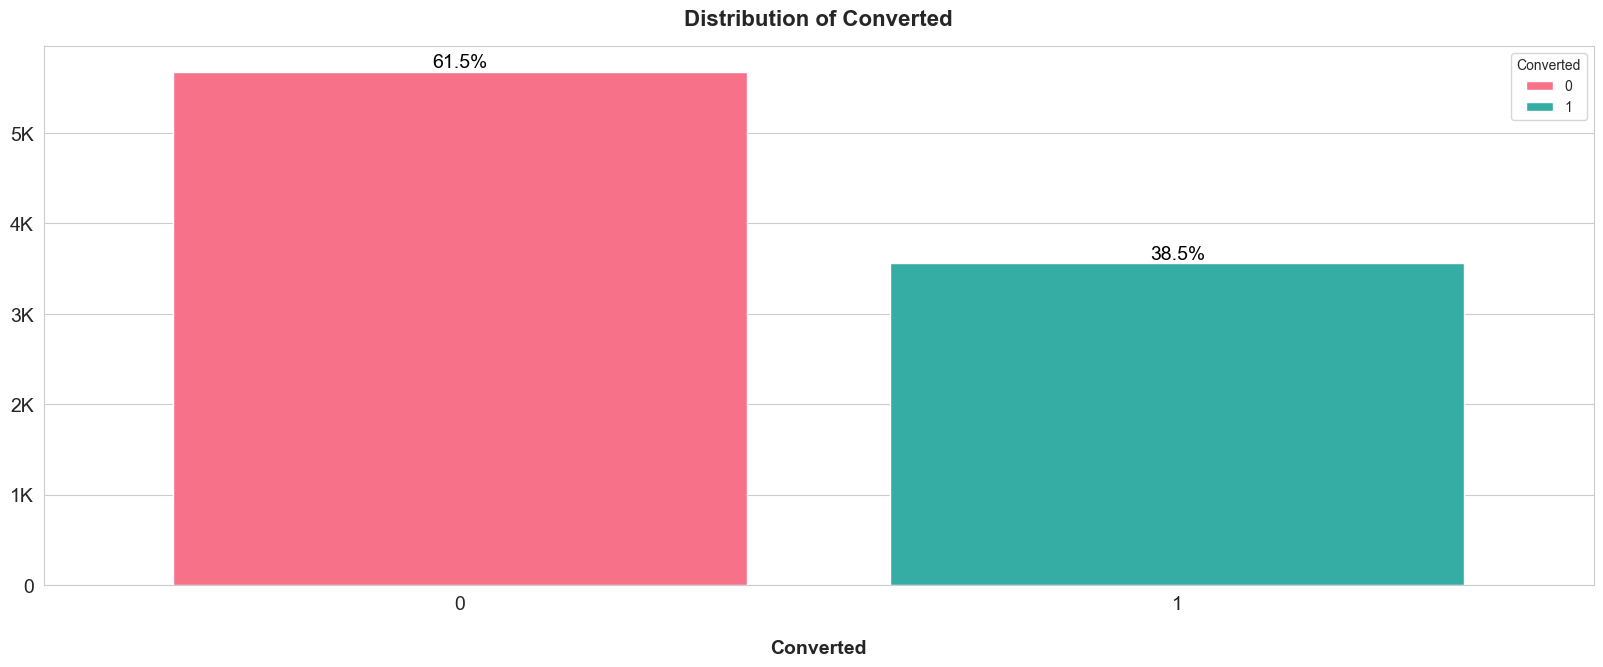

In [372]:
count_plot(data, 'Converted')

**Note:**
The target variable is slightly imbalanced.

### Check data distribution for categorical columns

In [373]:
# Identify categorical columns (non-numerical types)
categorical_columns = data.columns[data.dtypes == 'object']
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

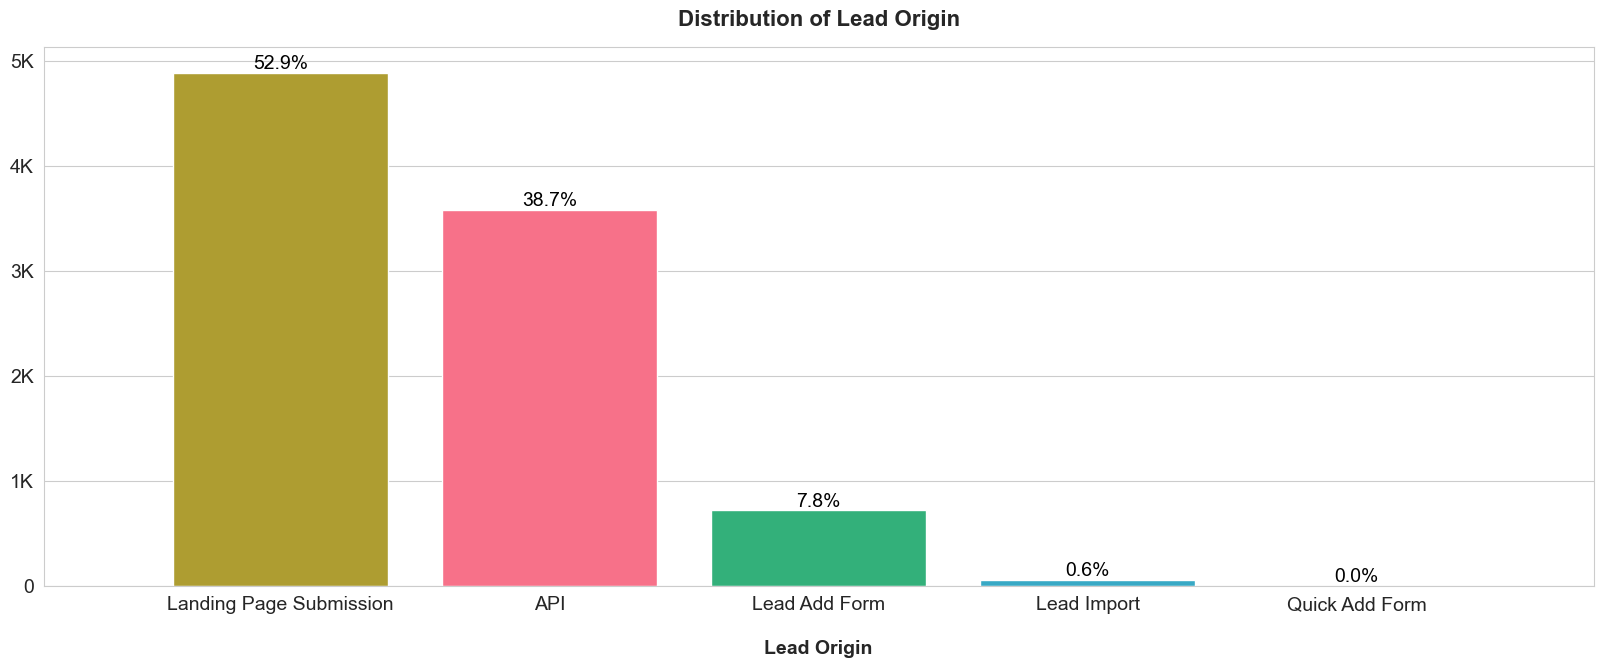

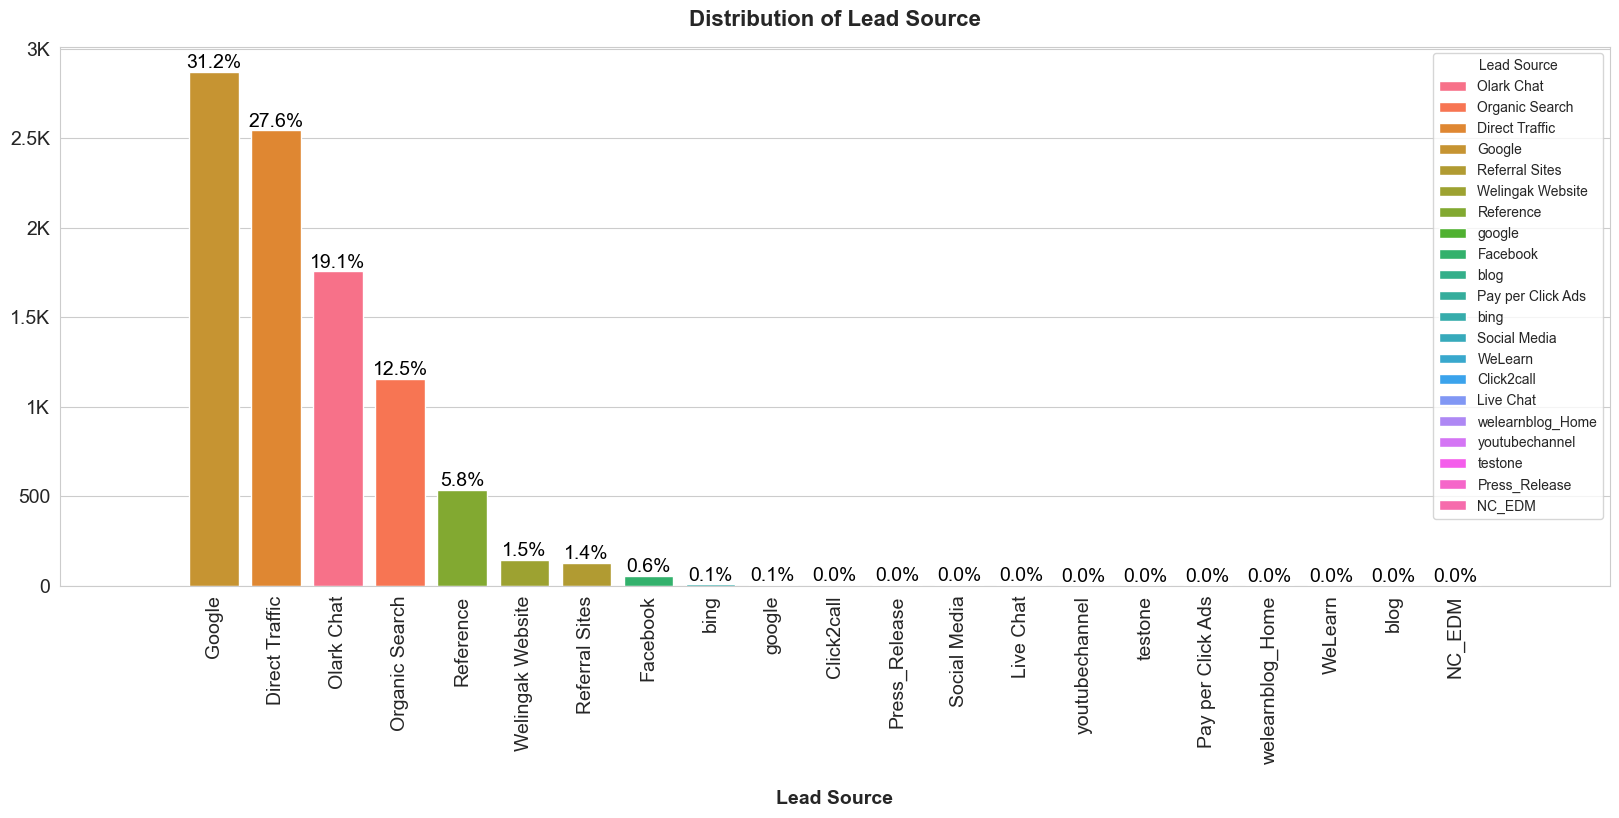

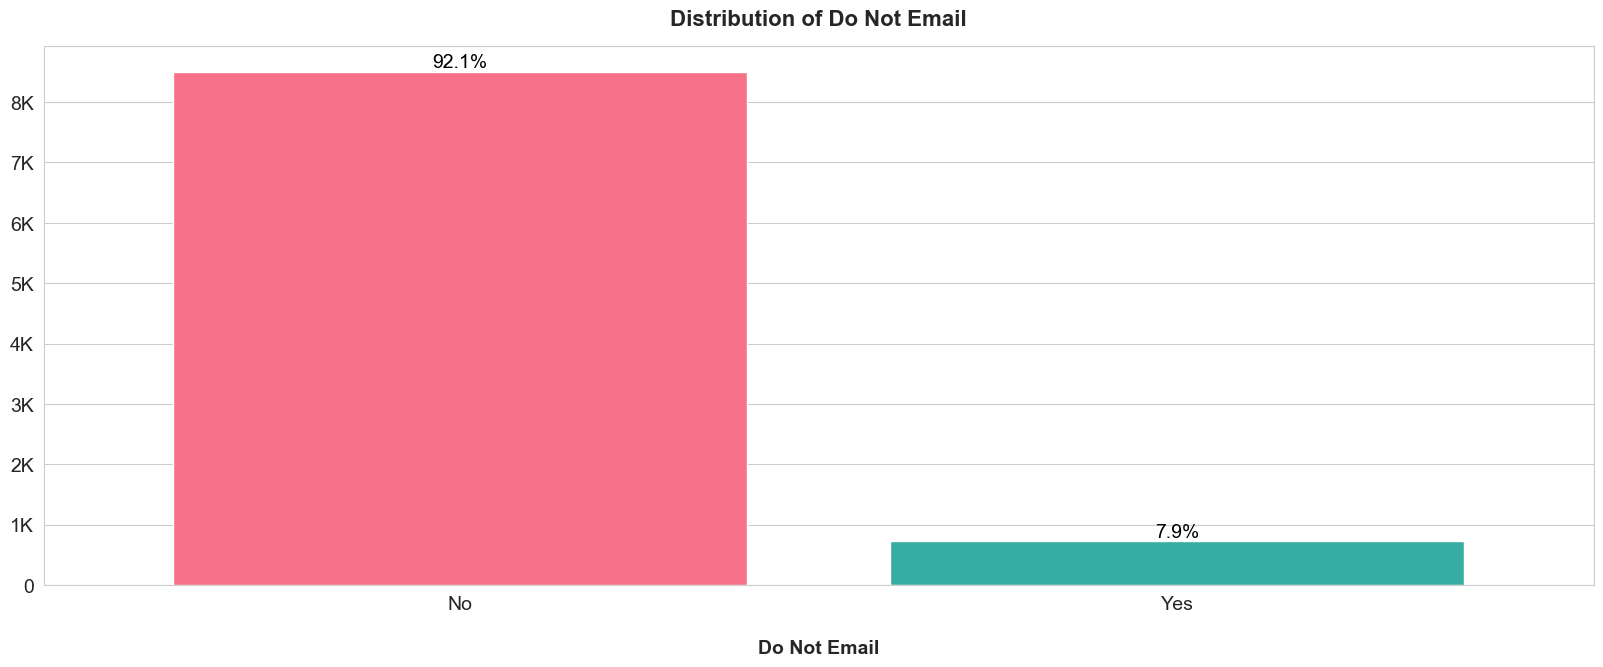

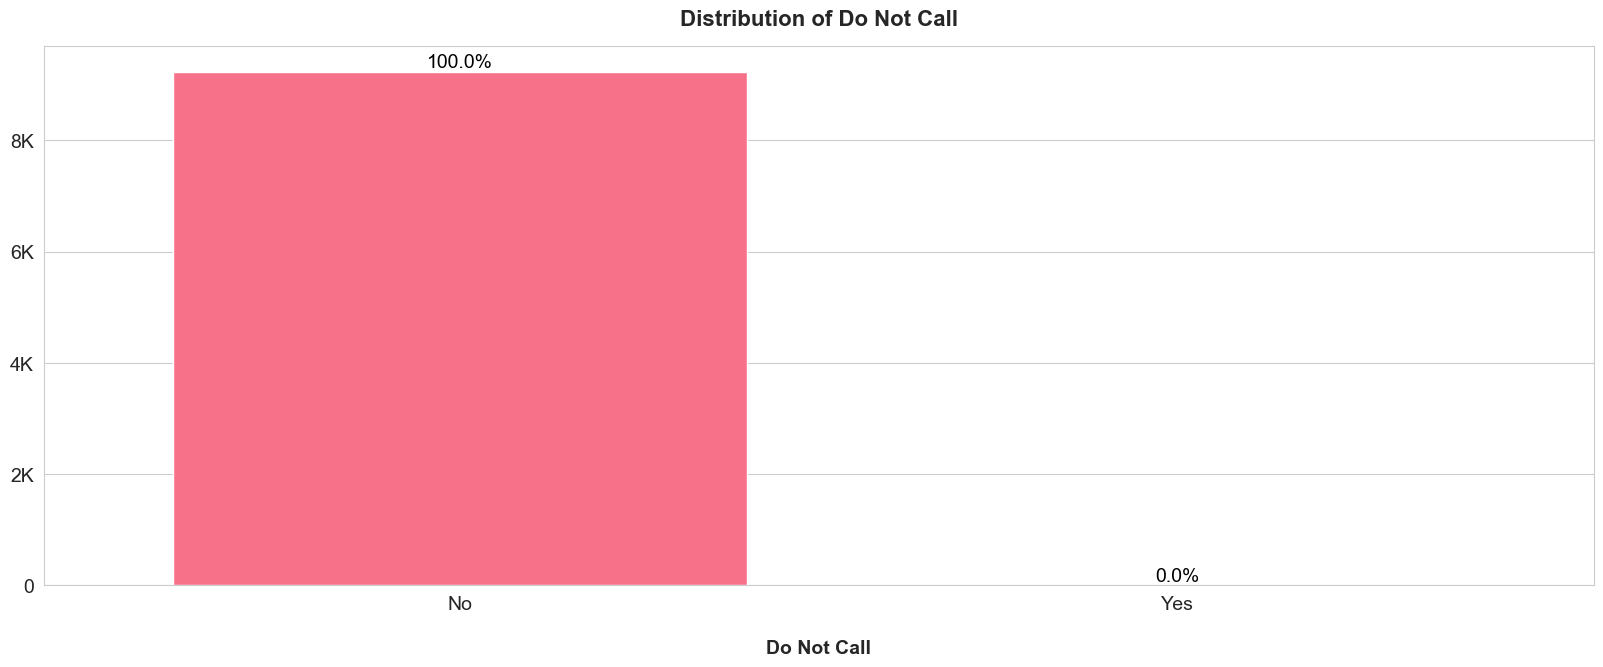

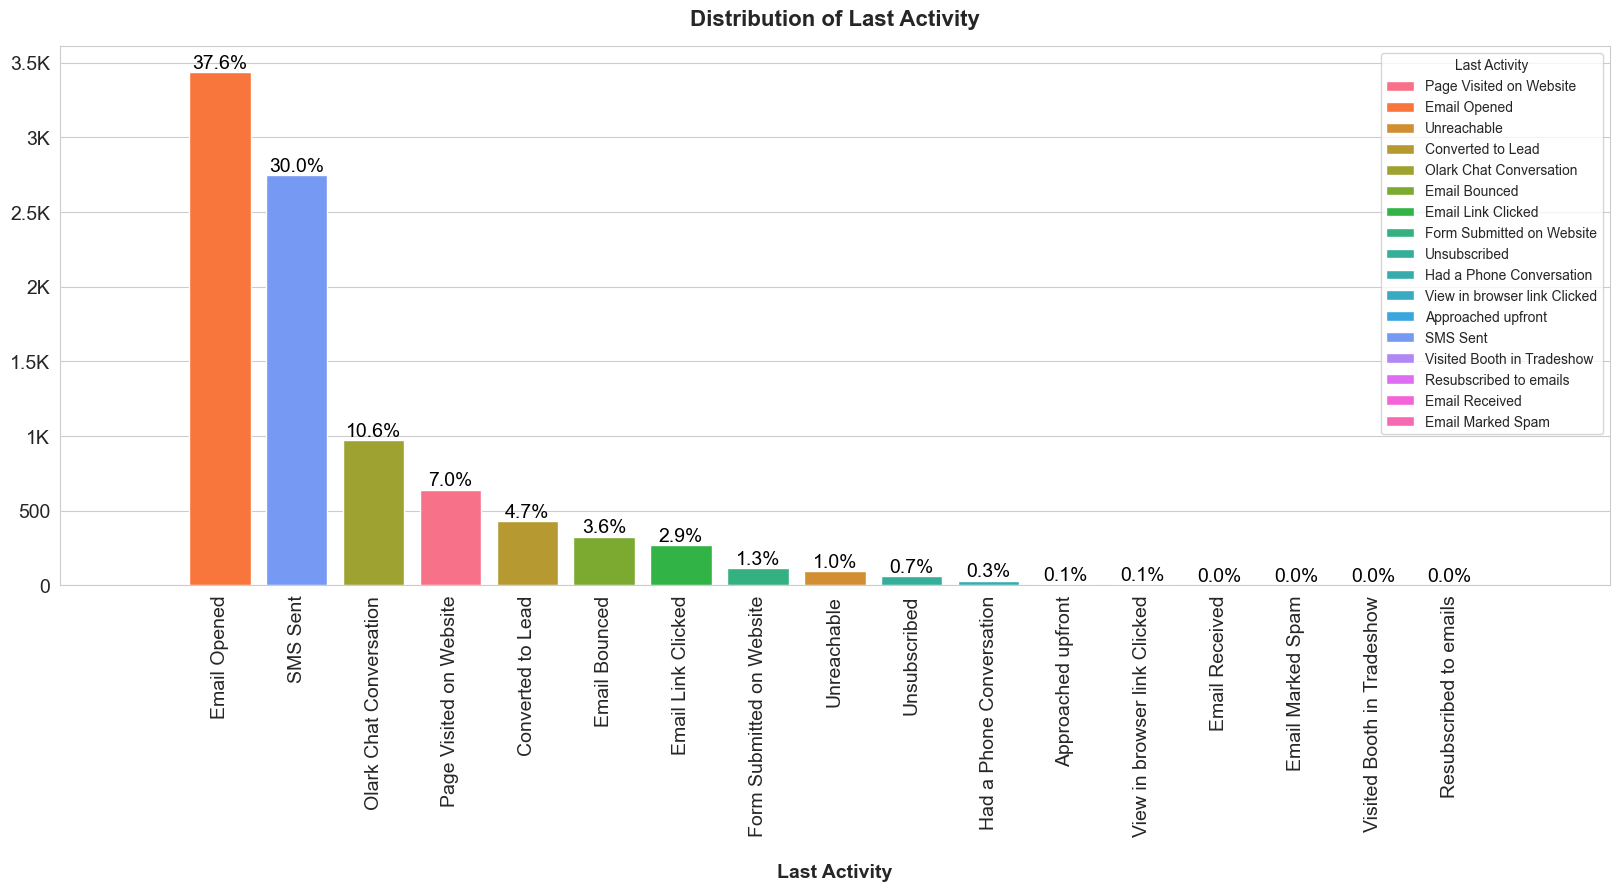

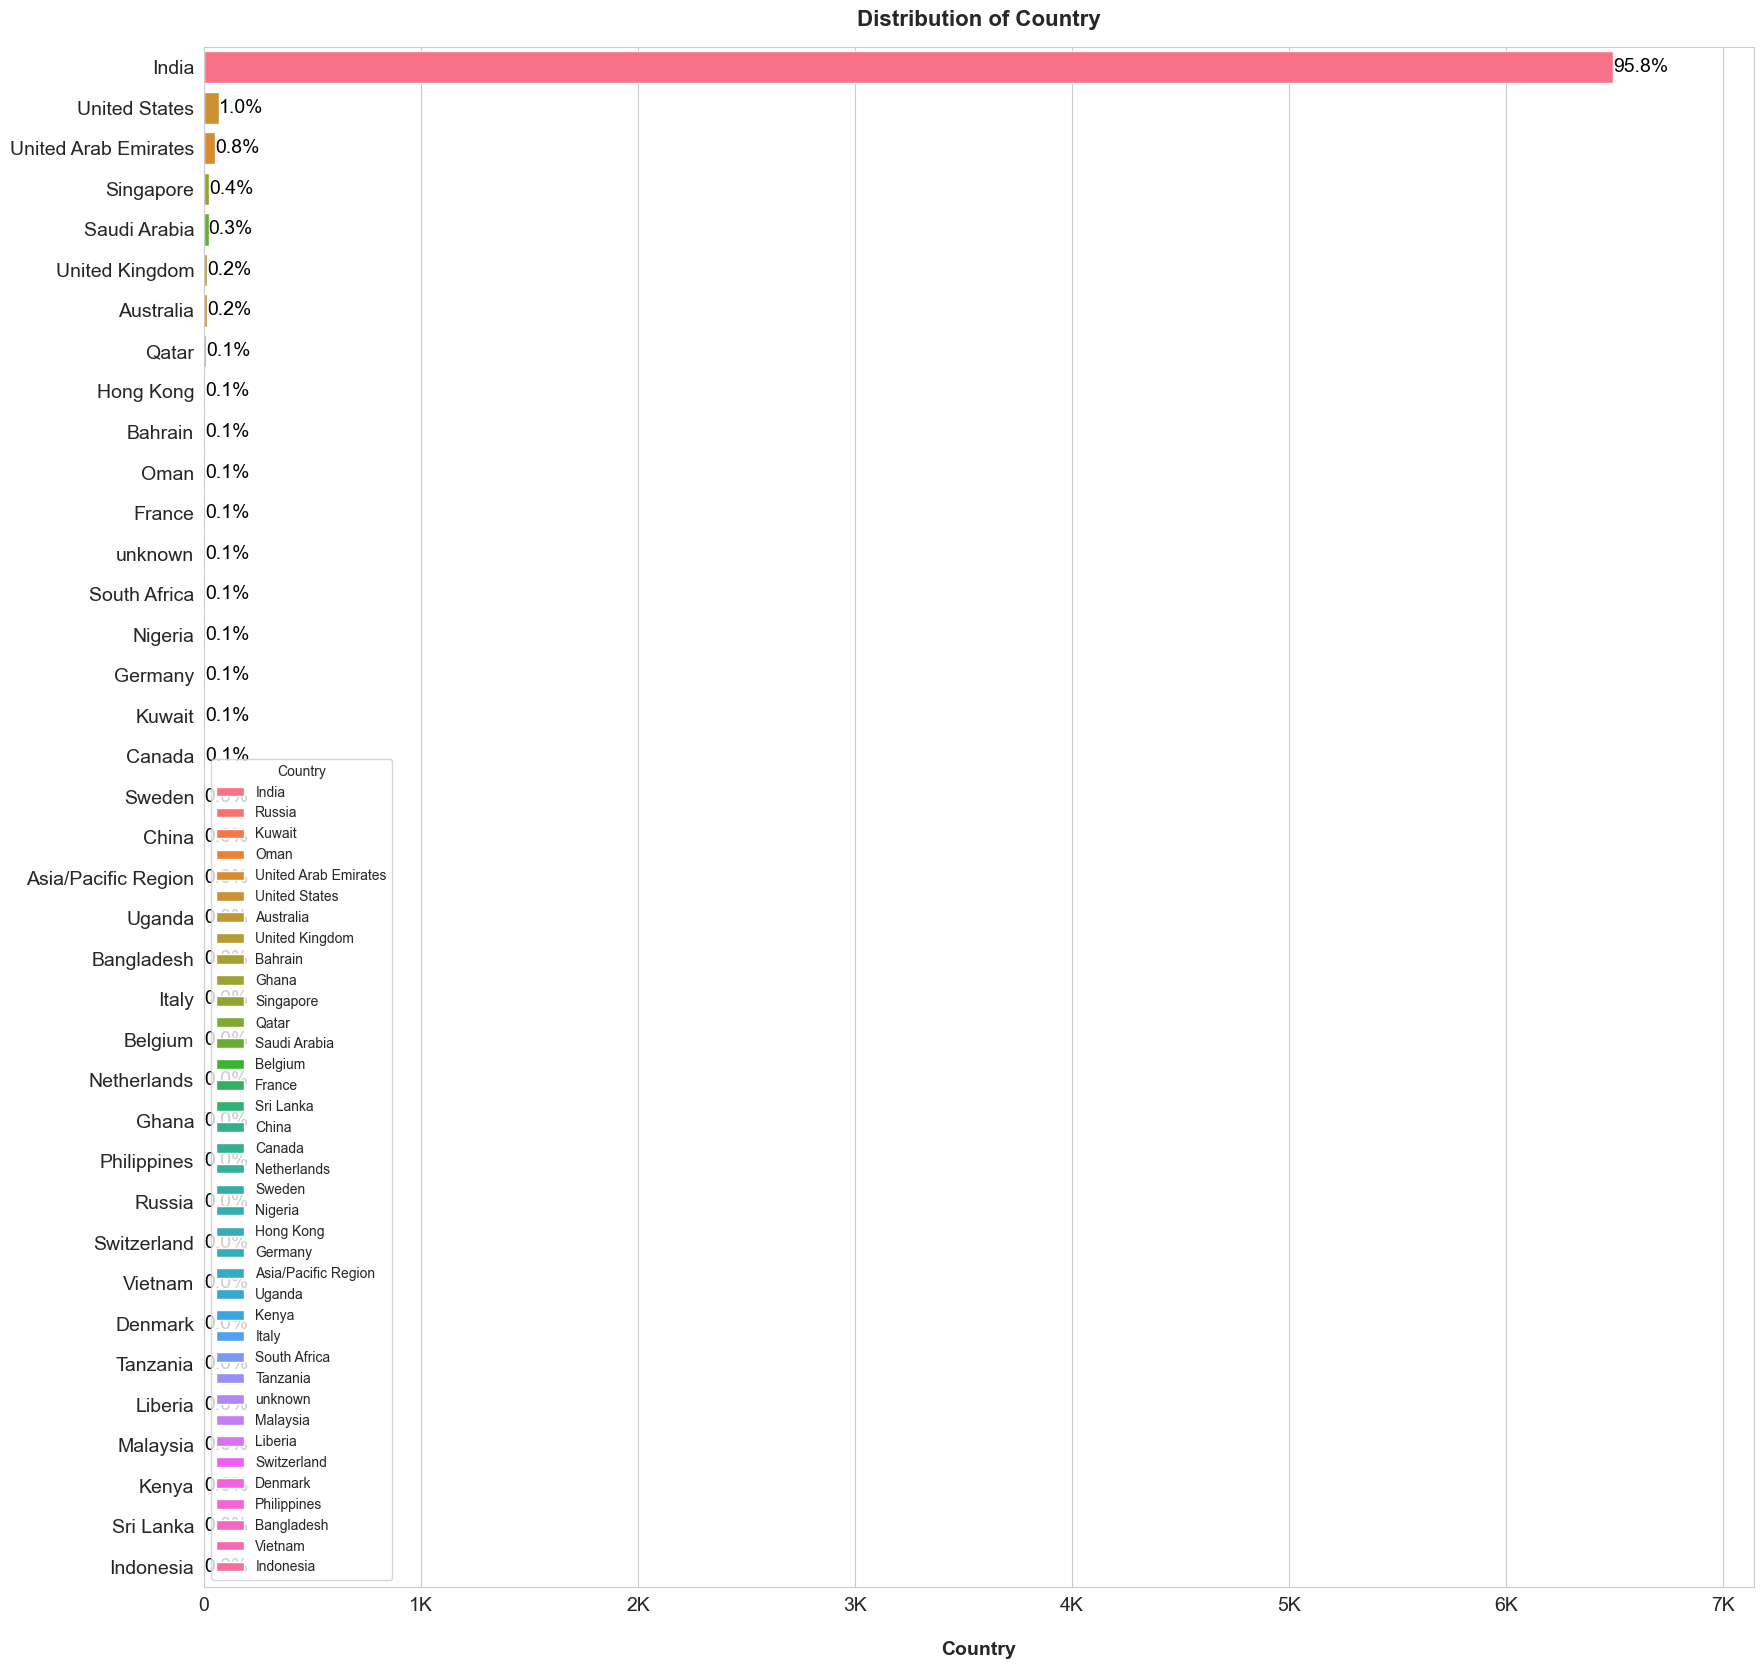

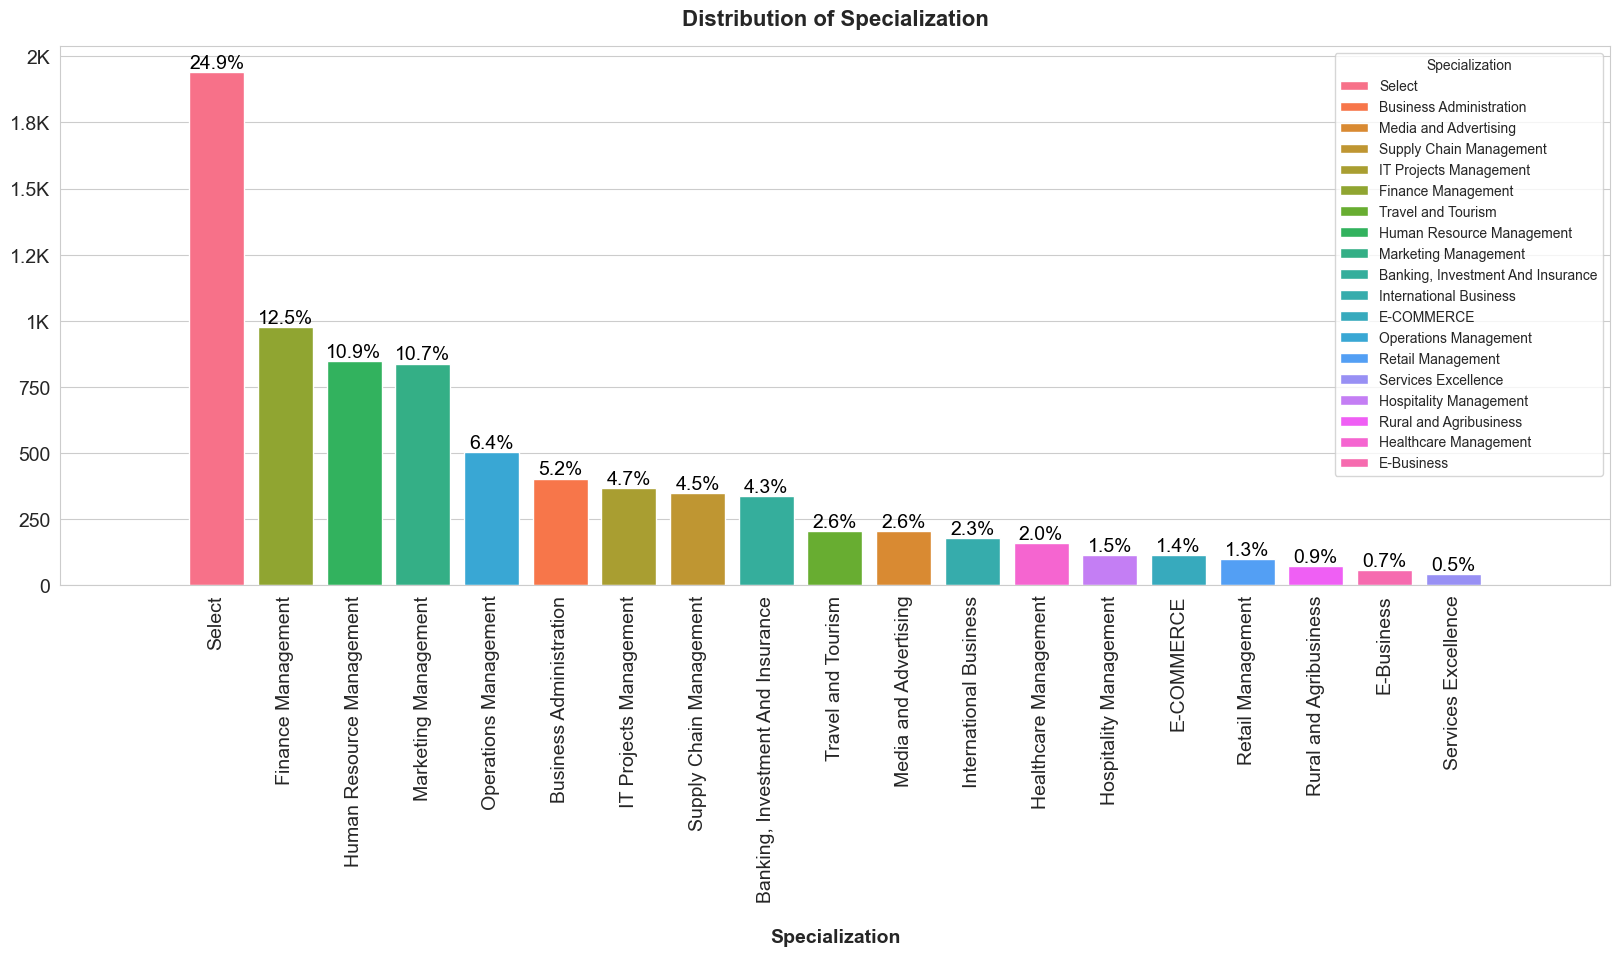

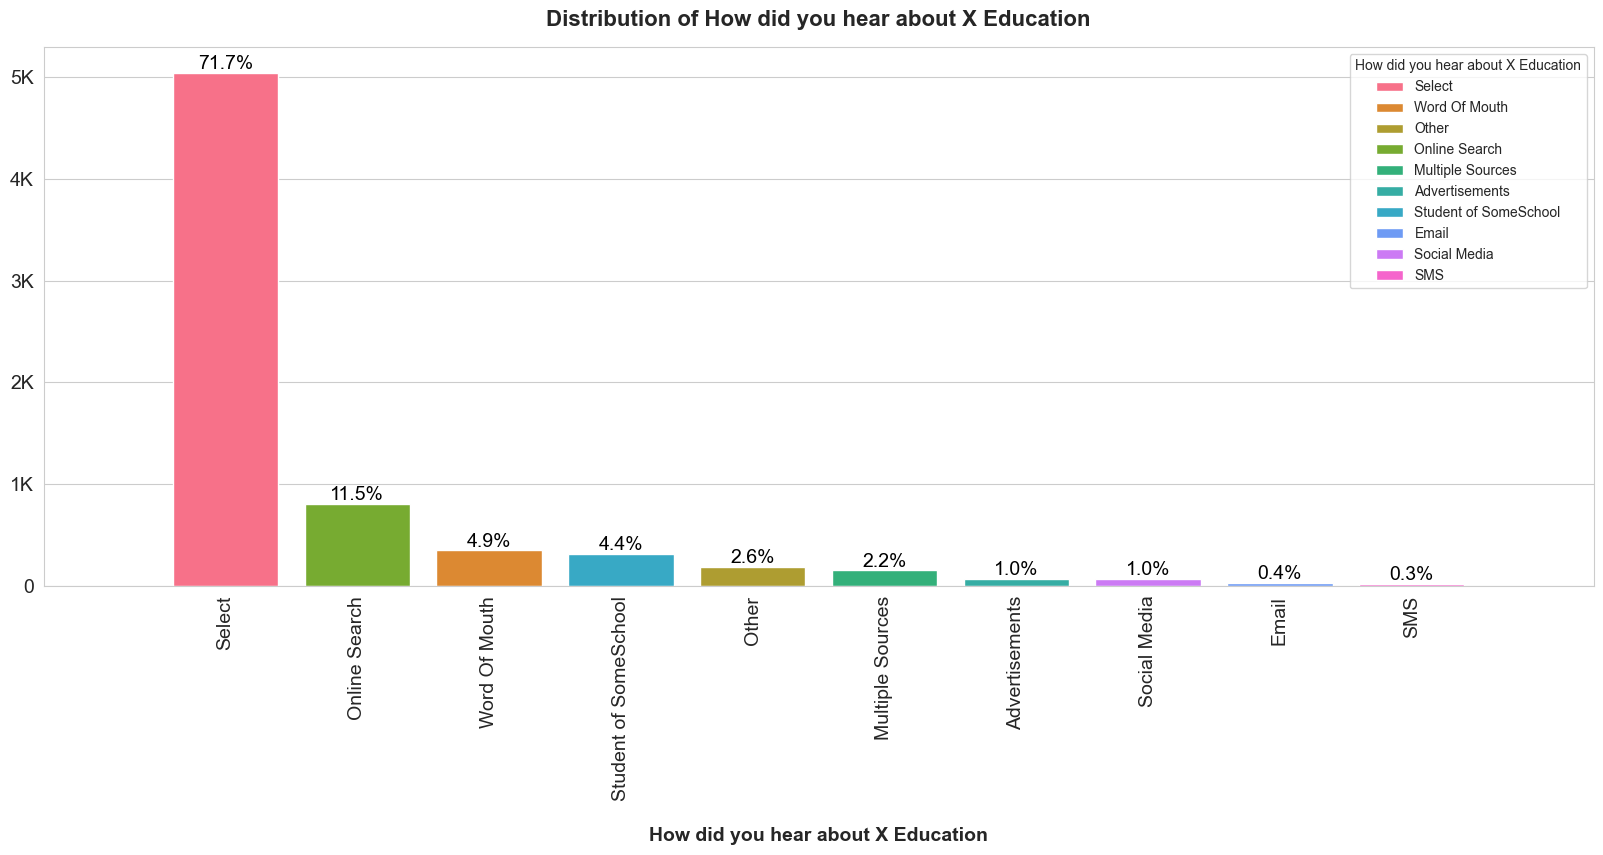

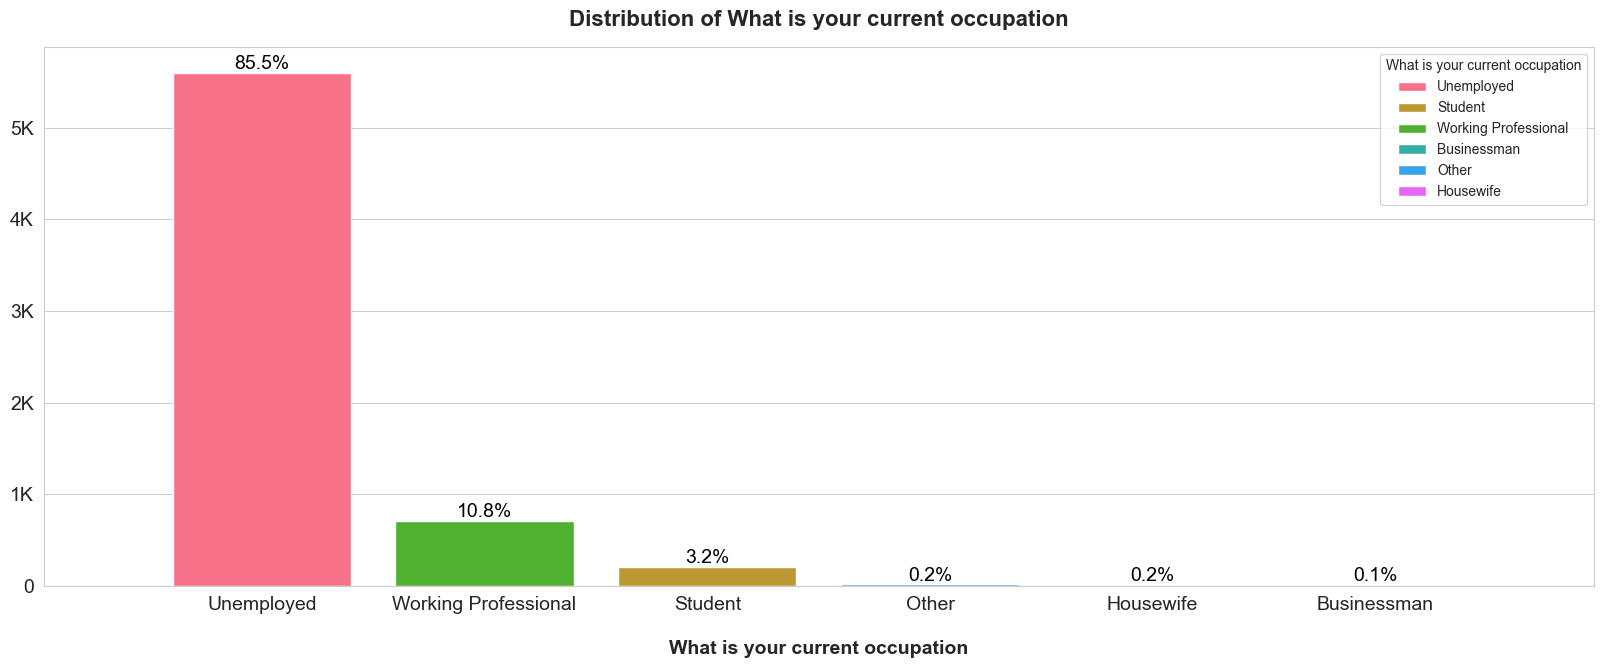

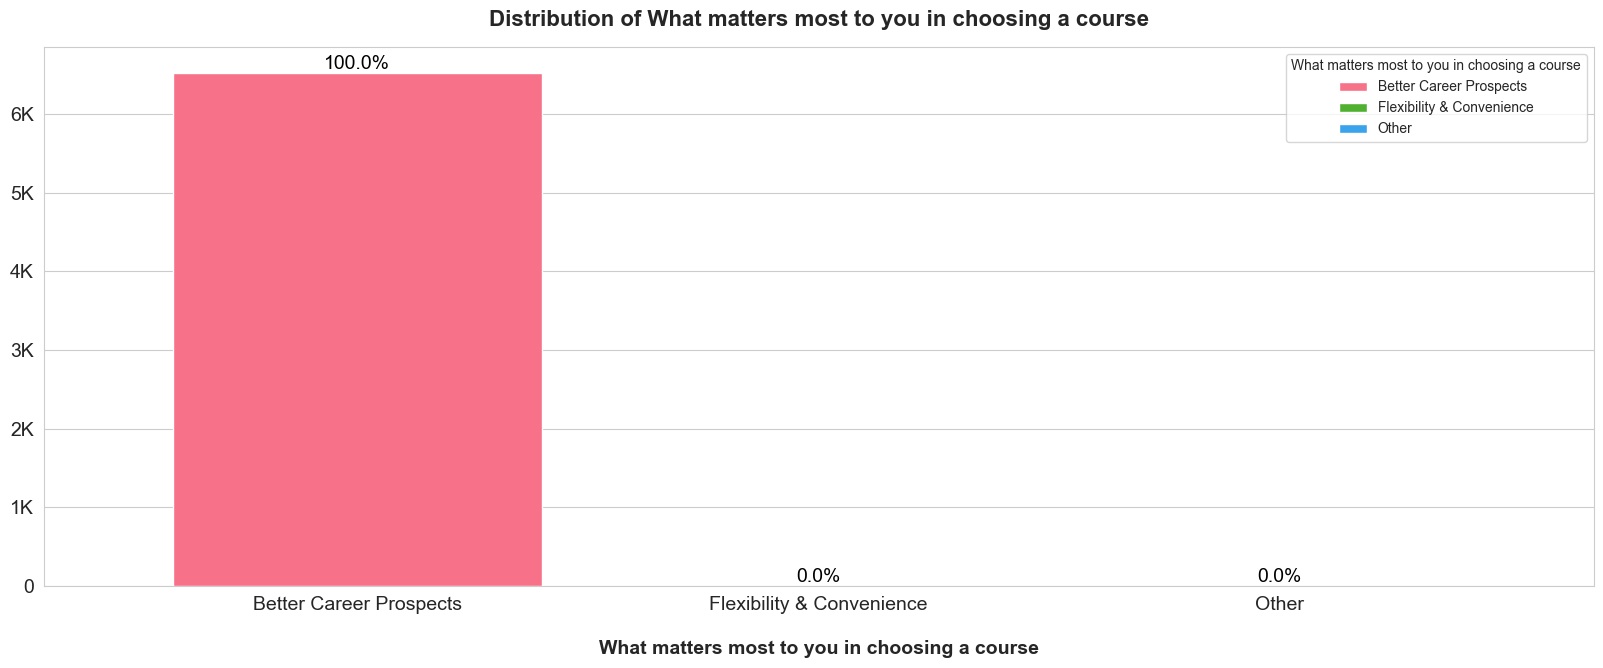

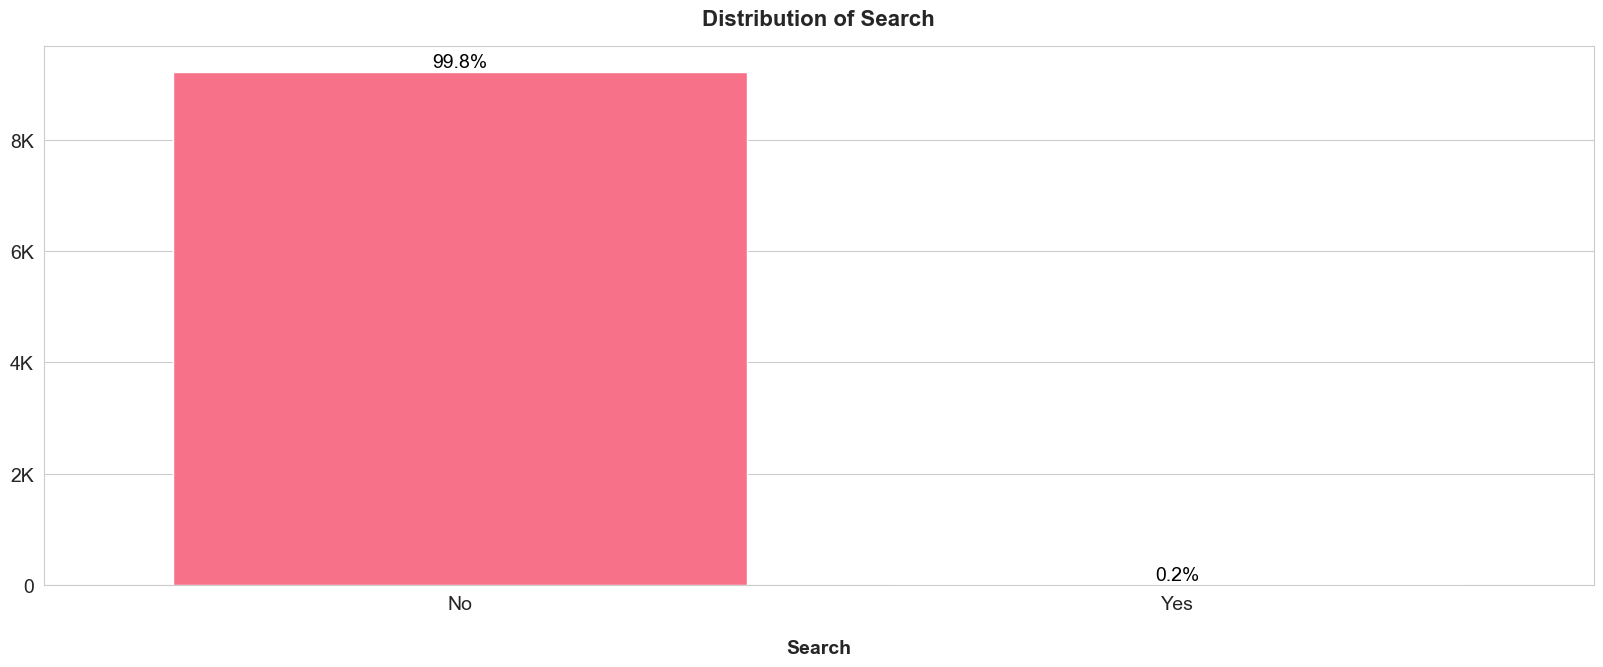

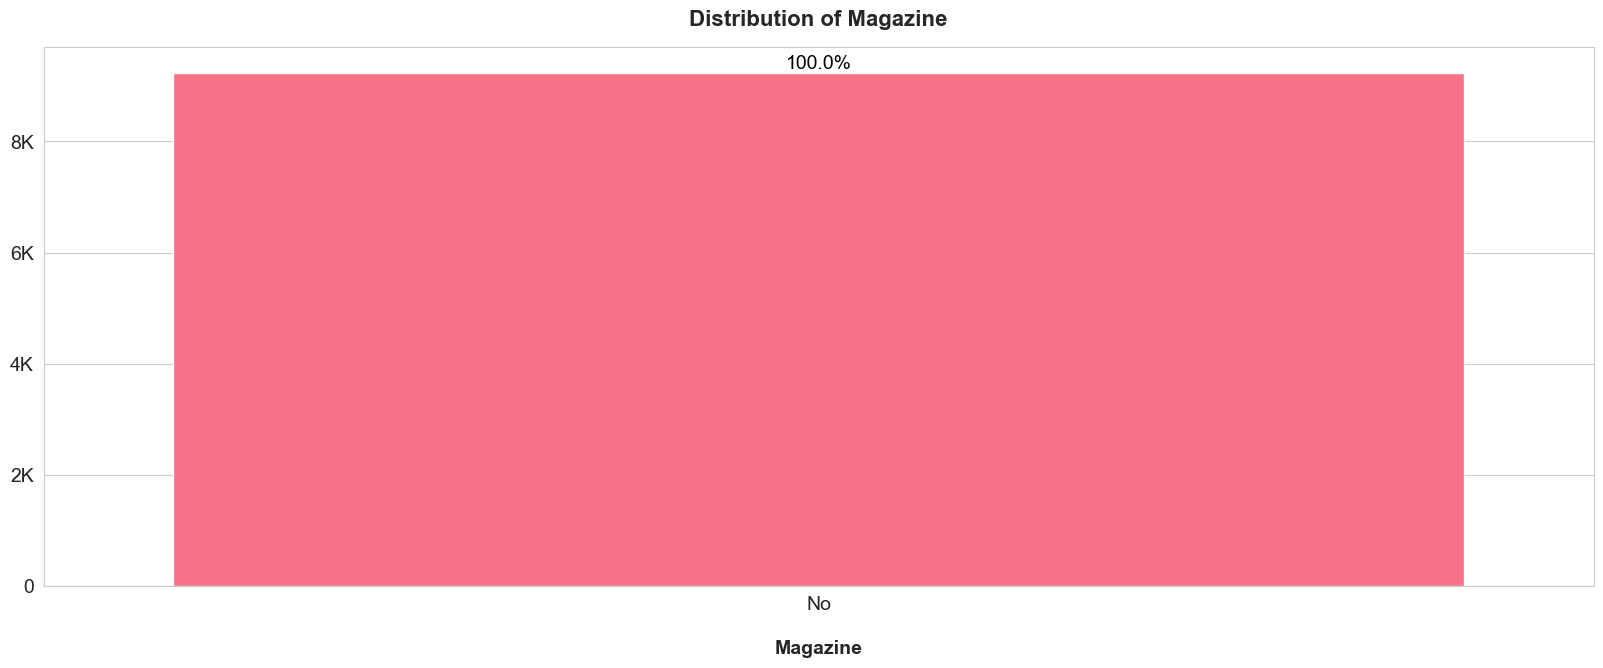

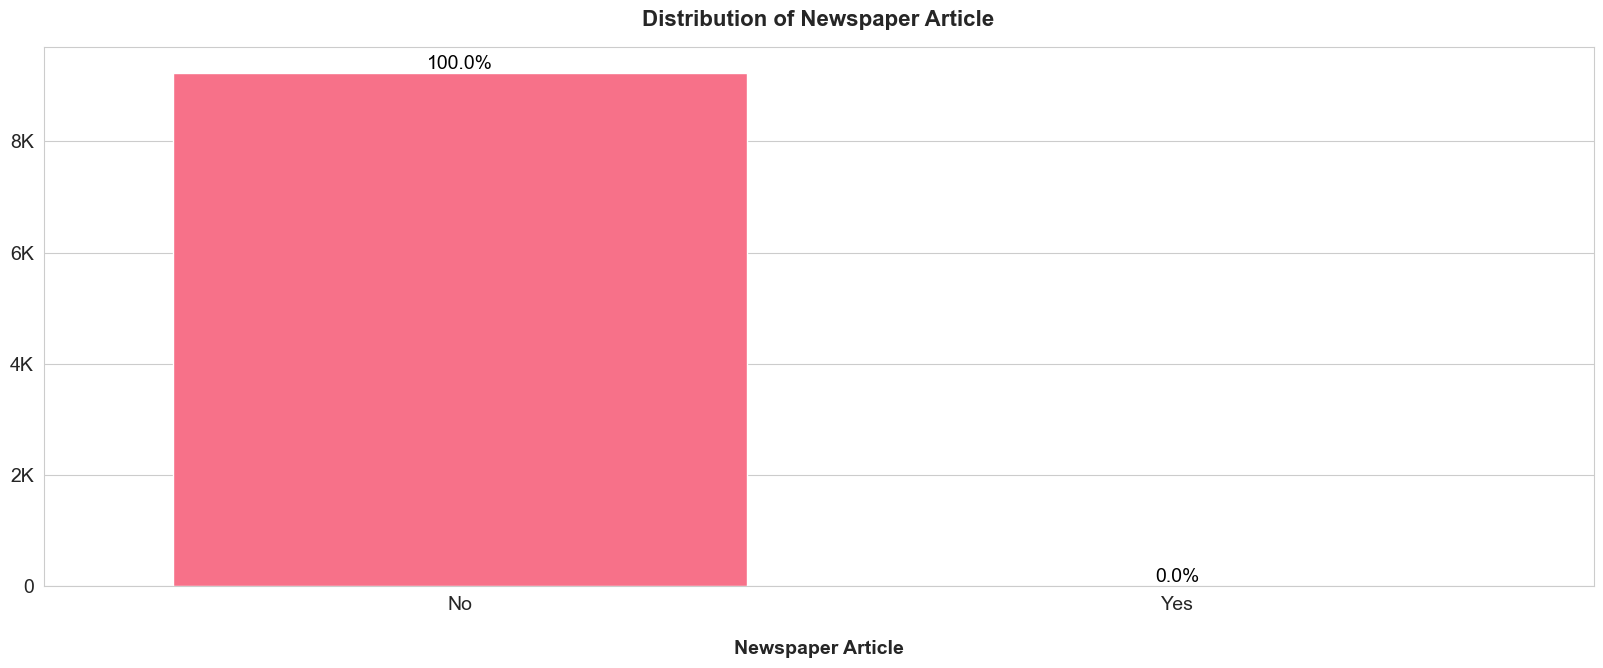

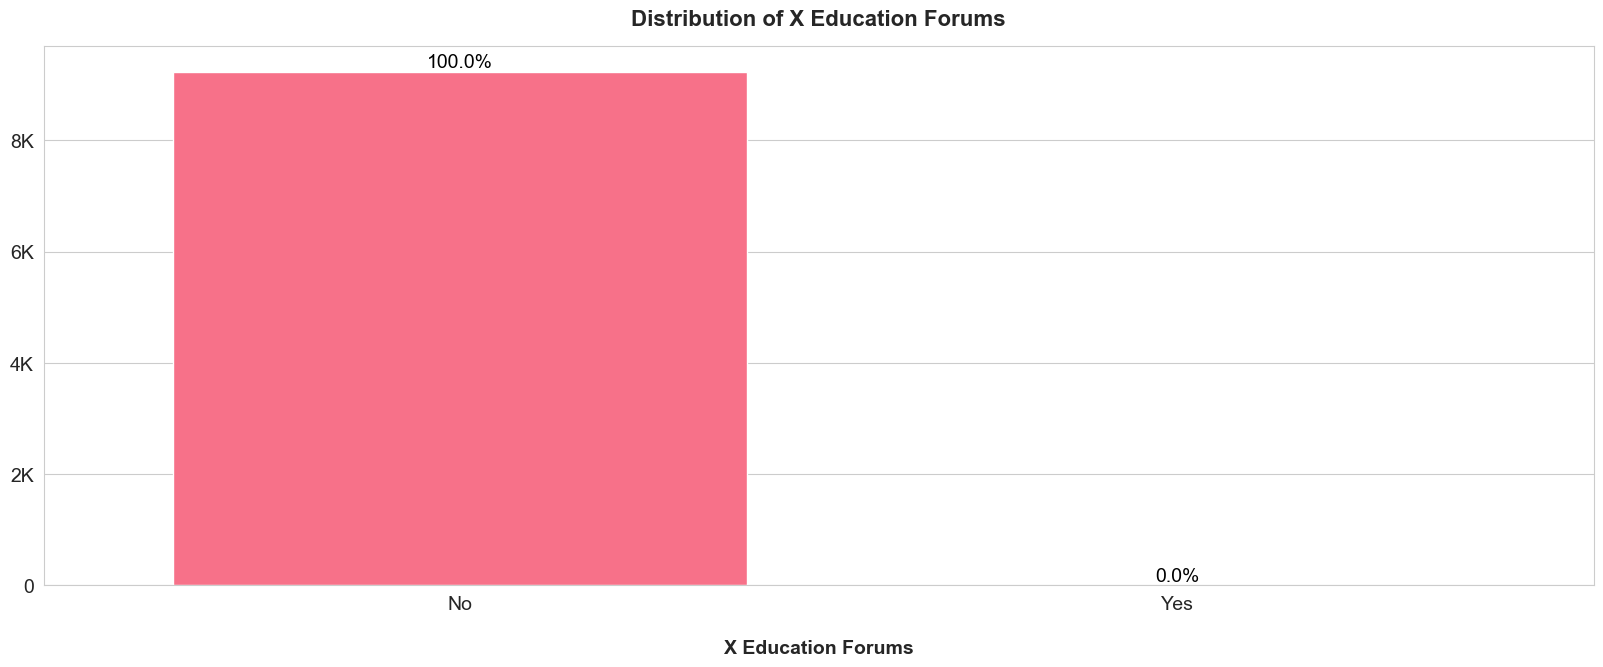

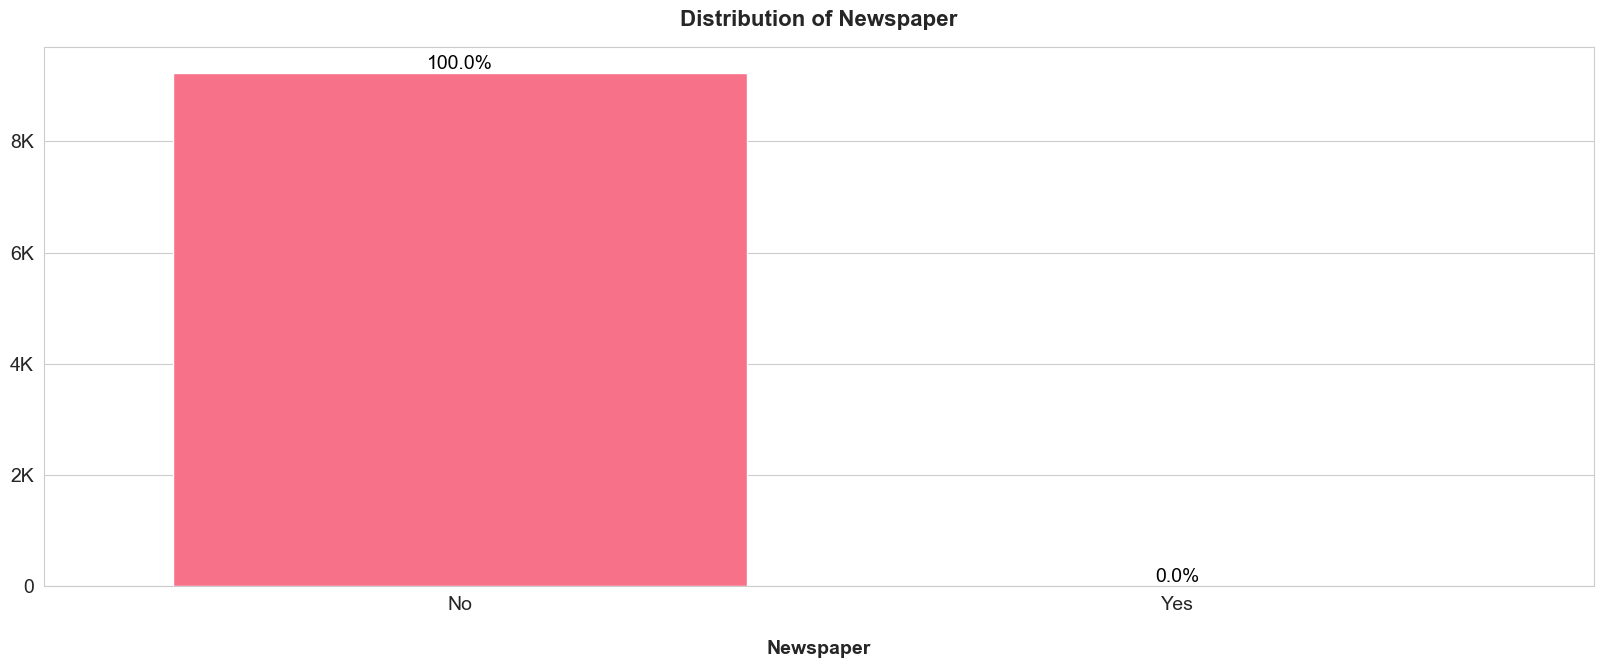

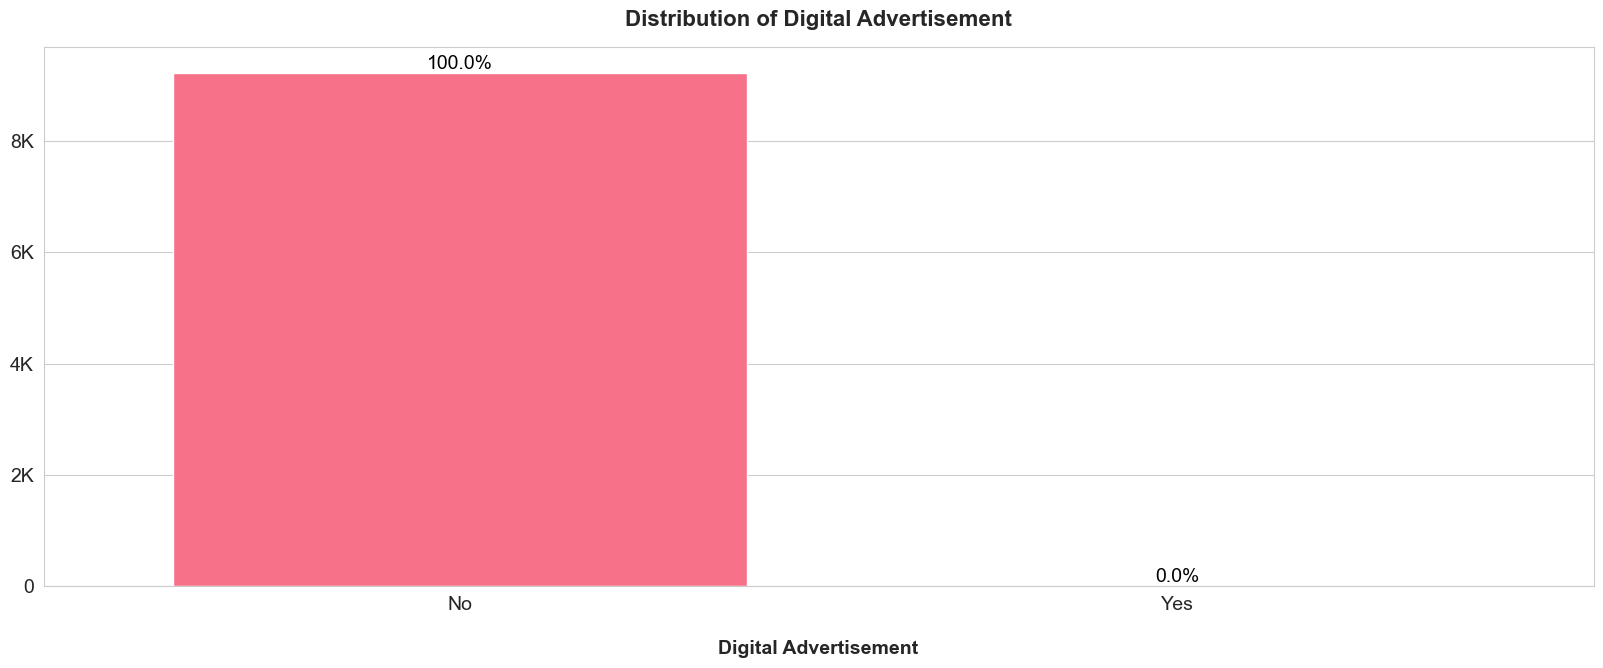

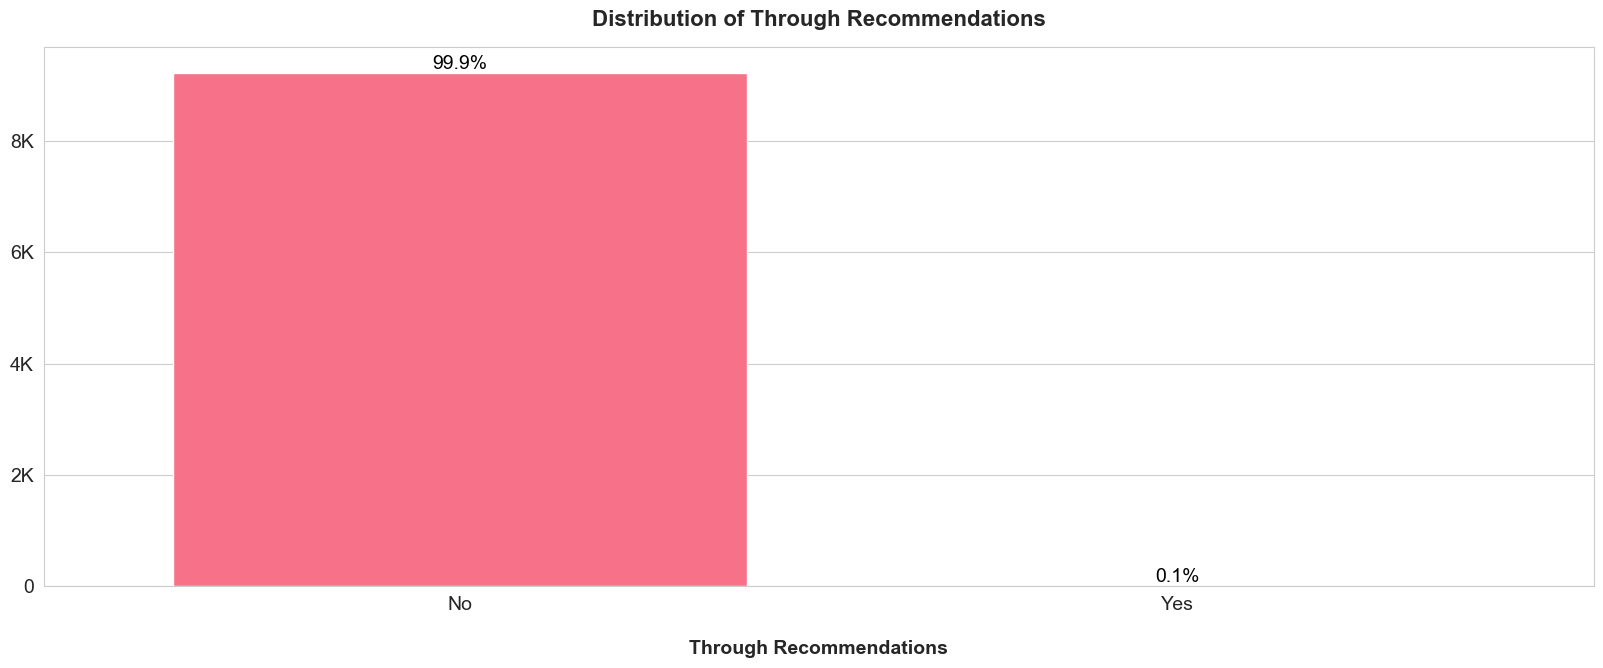

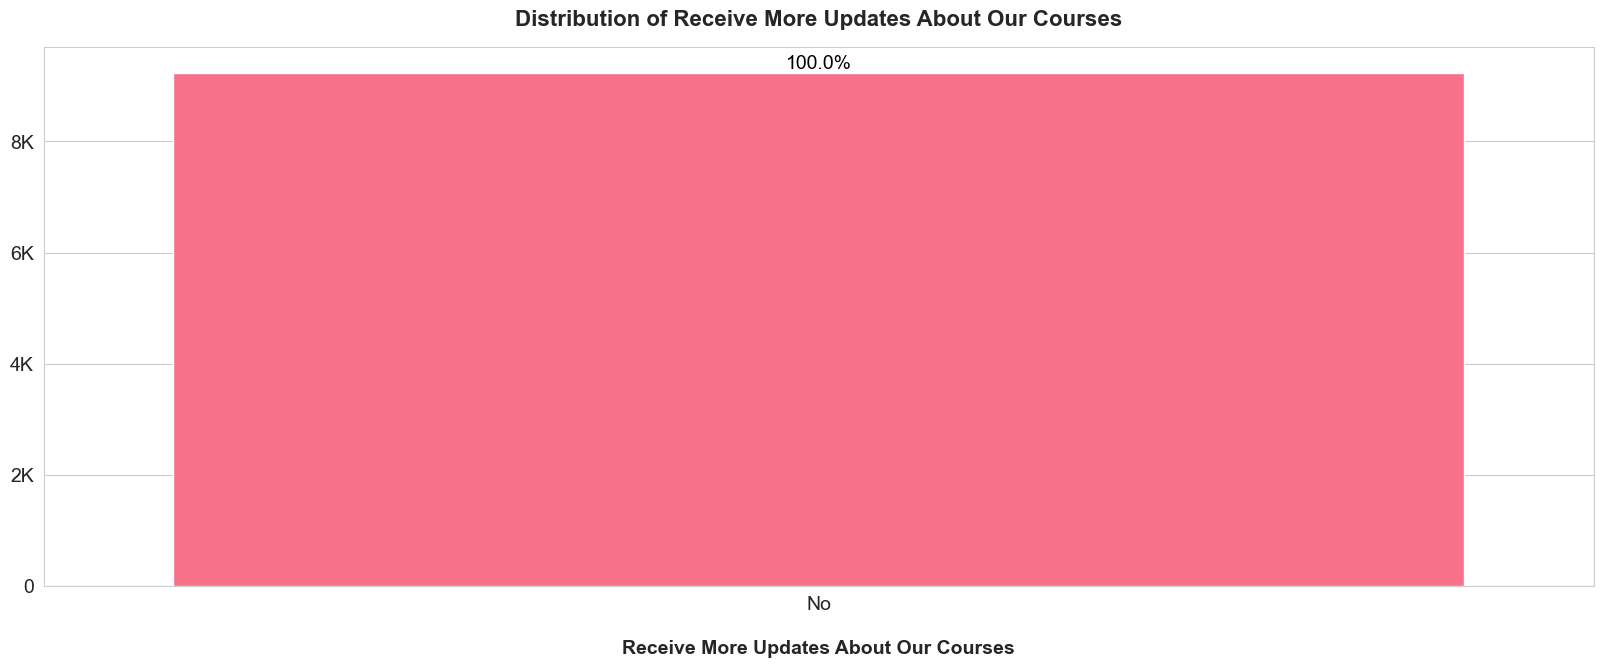

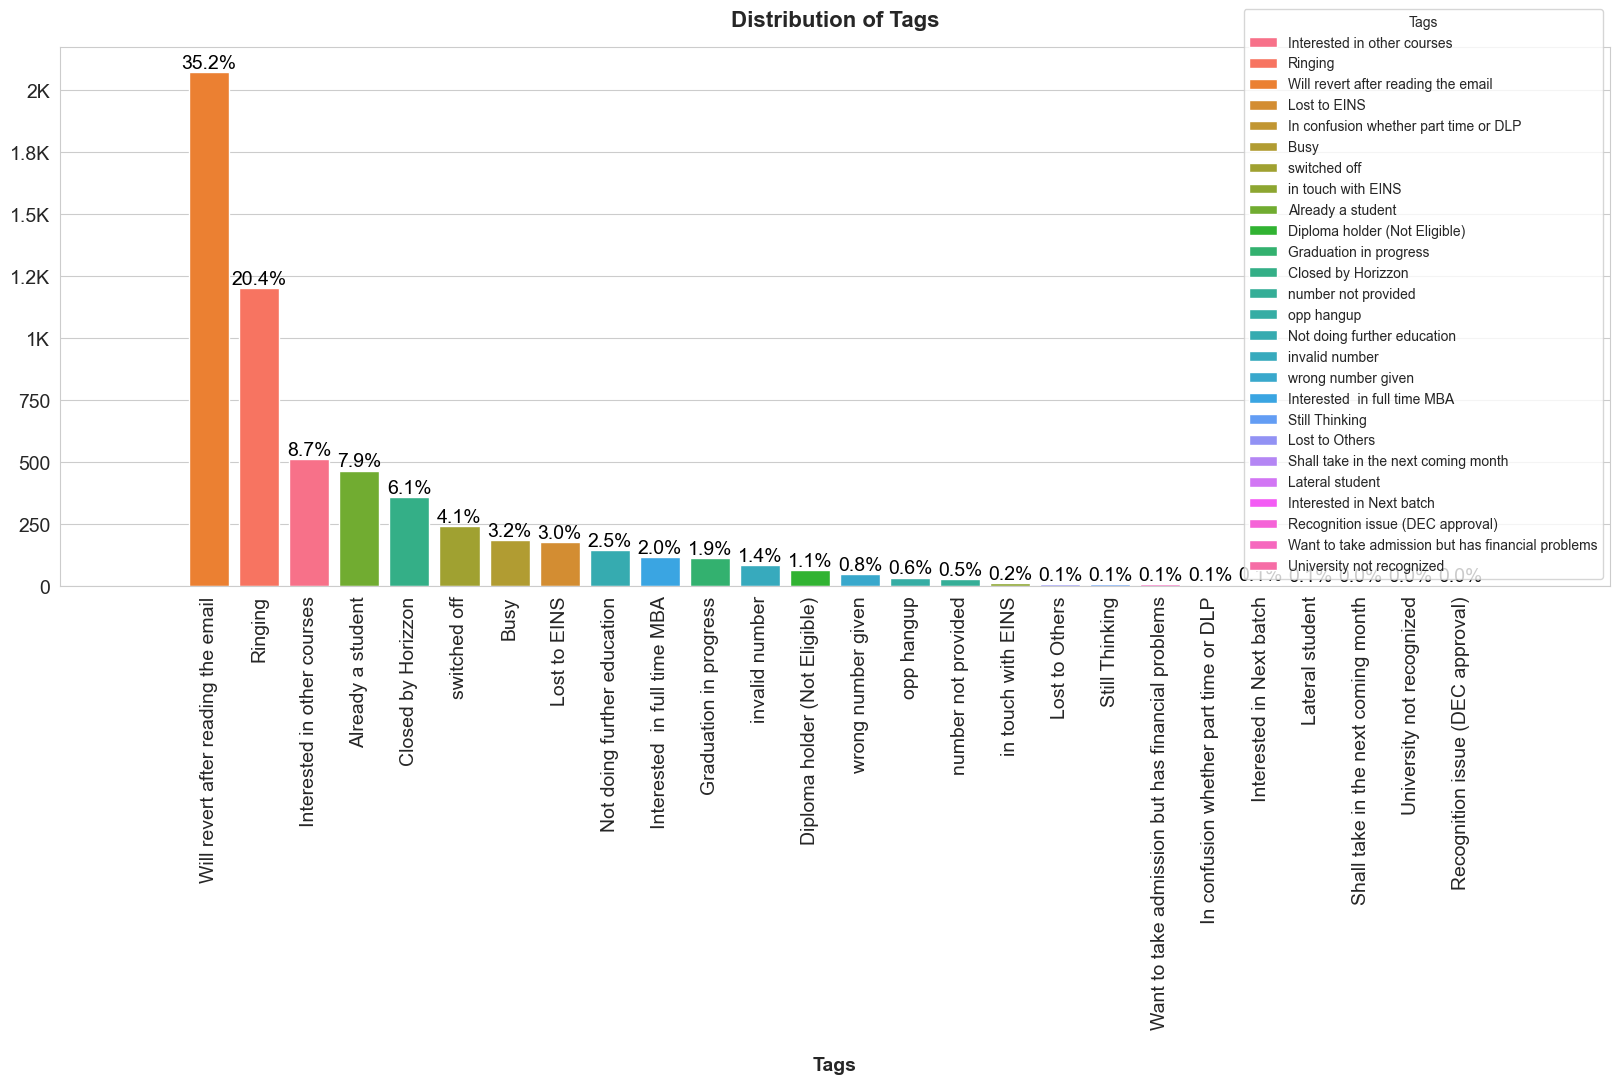

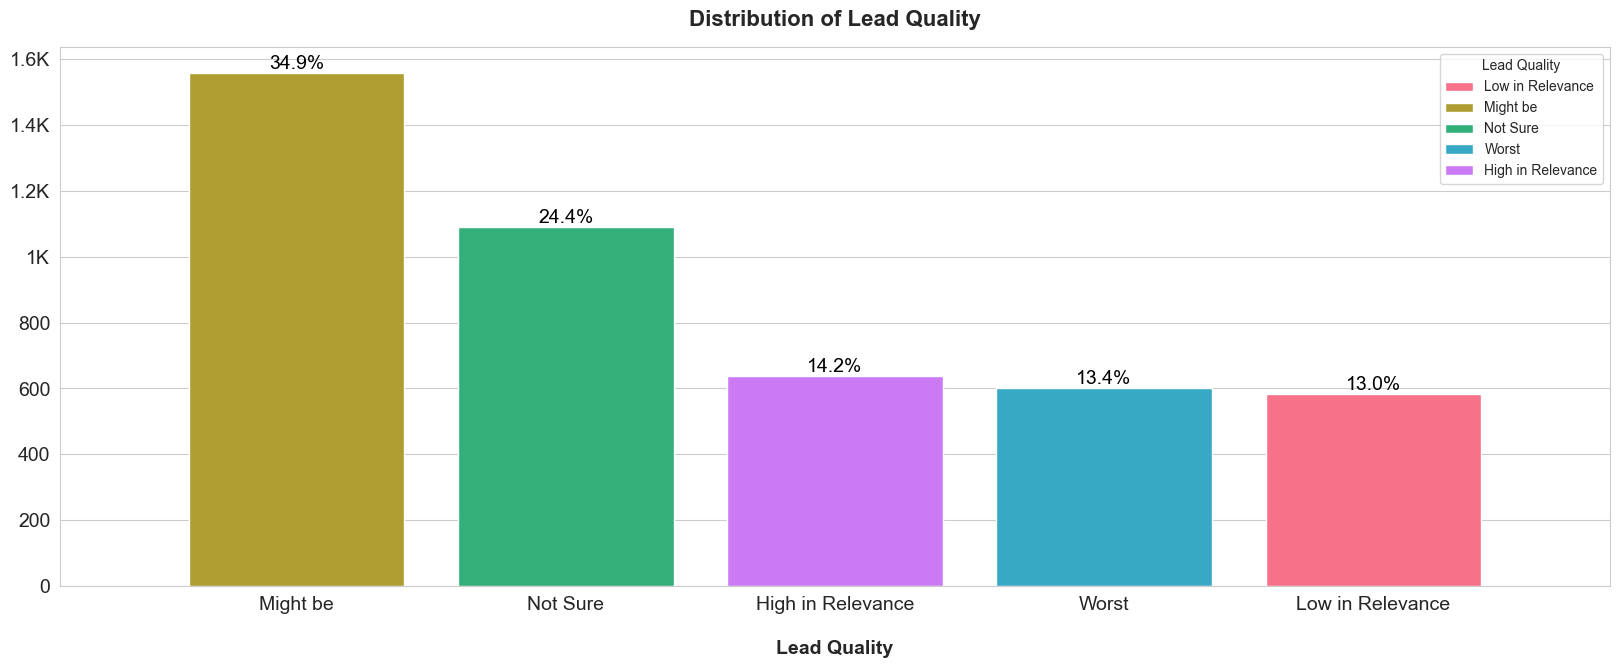

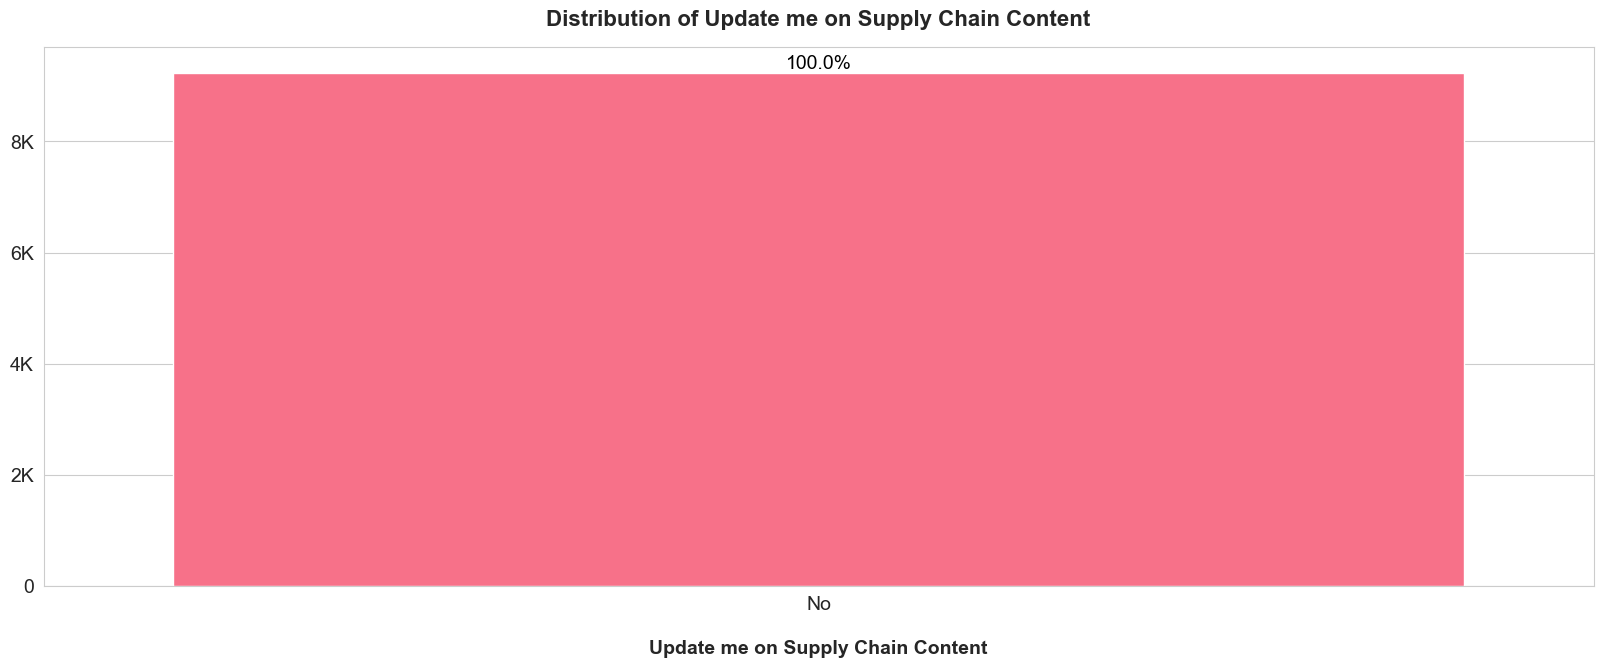

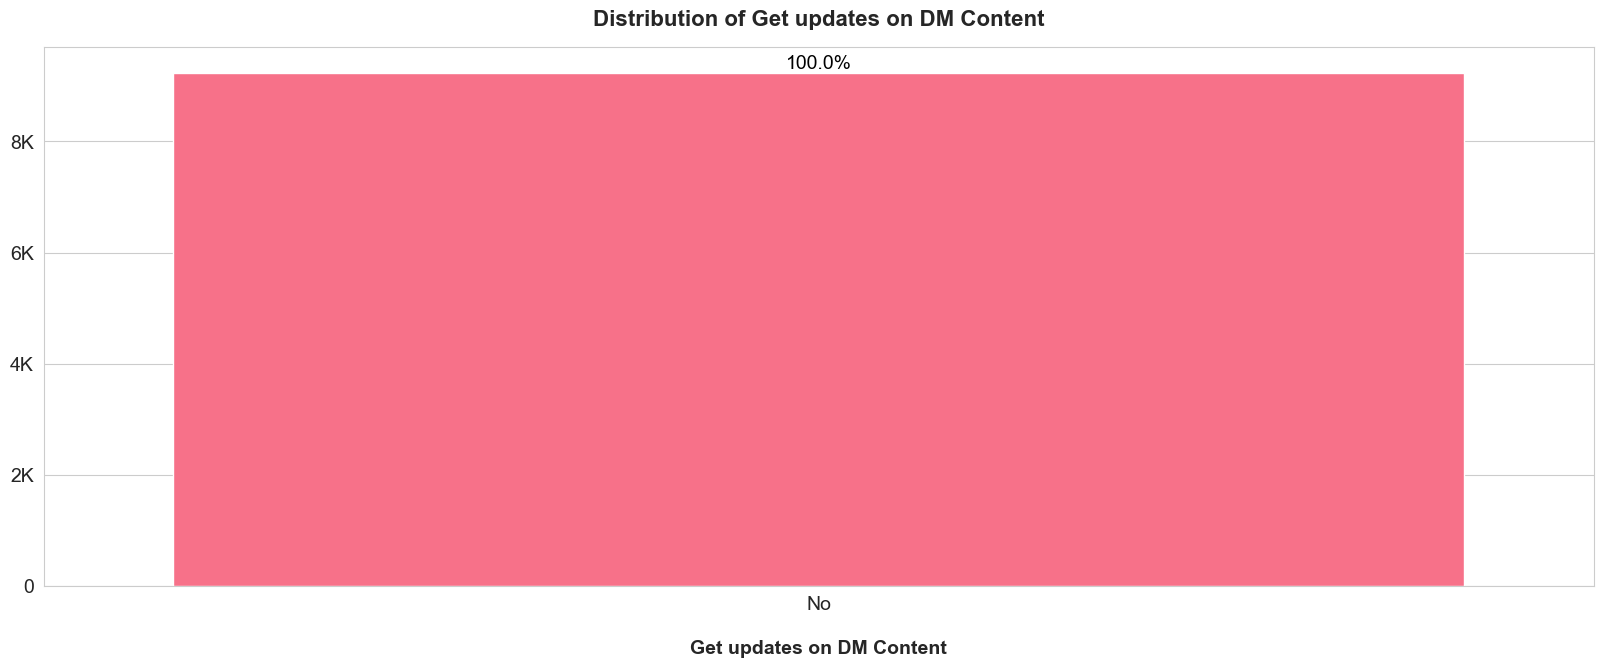

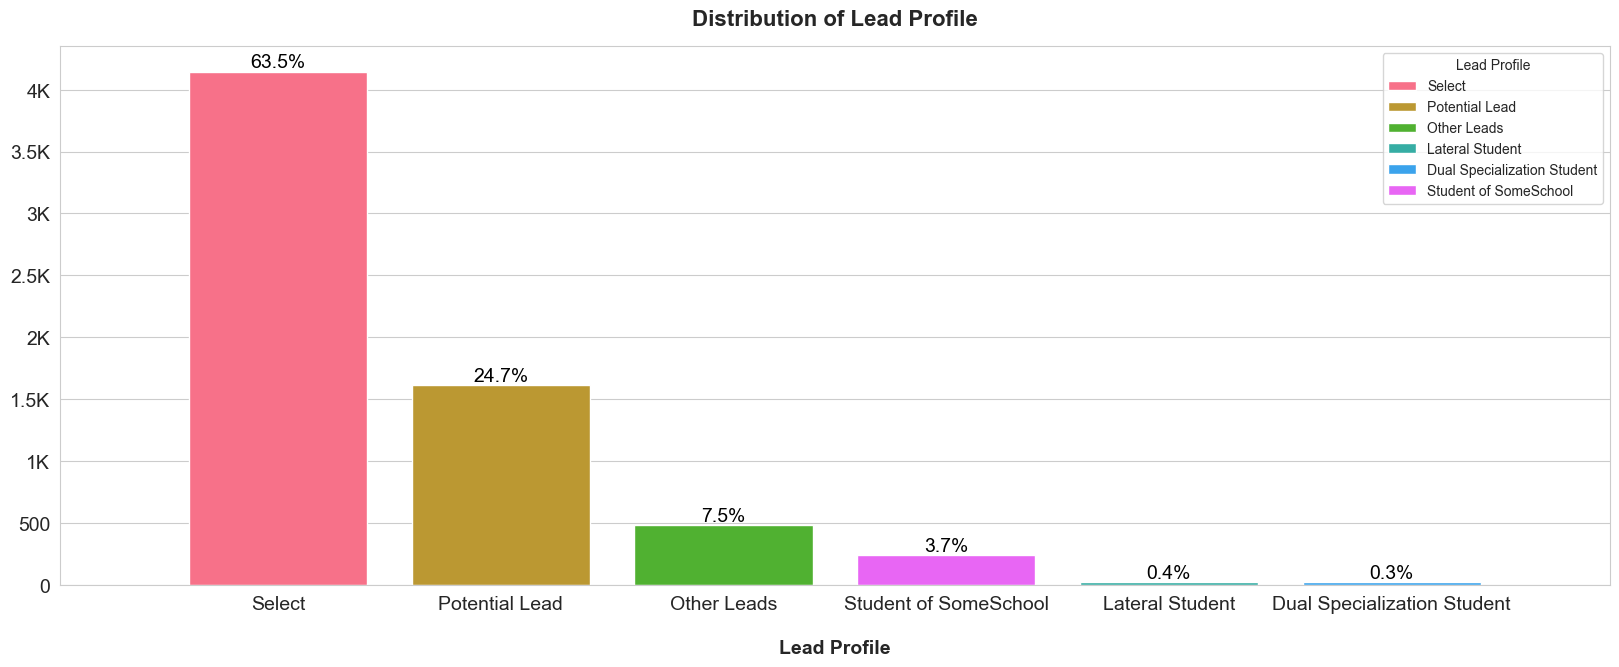

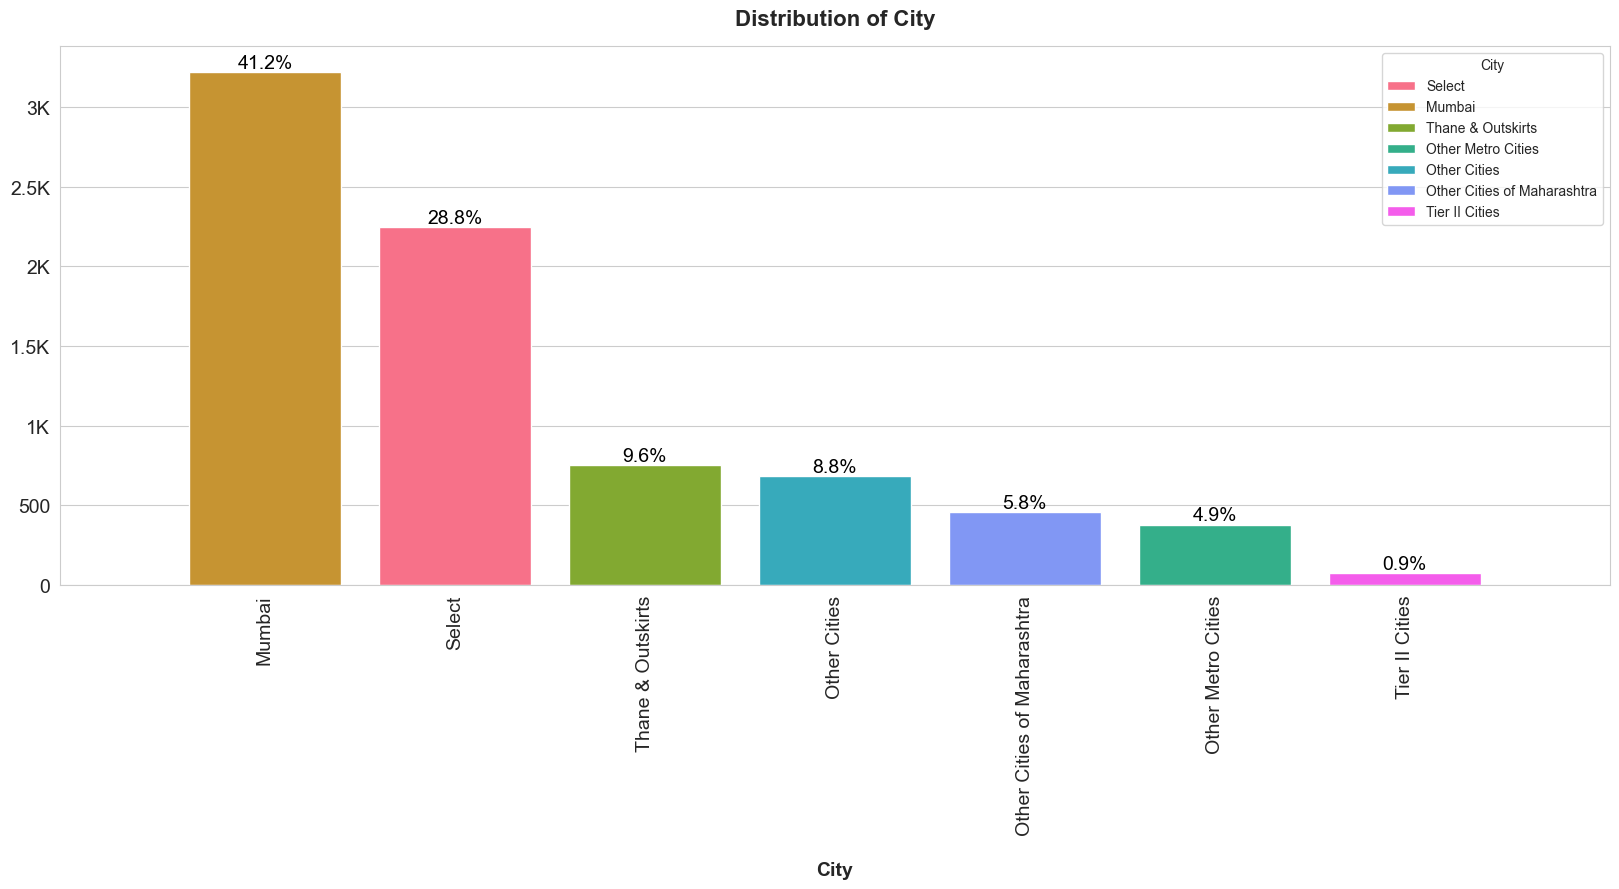

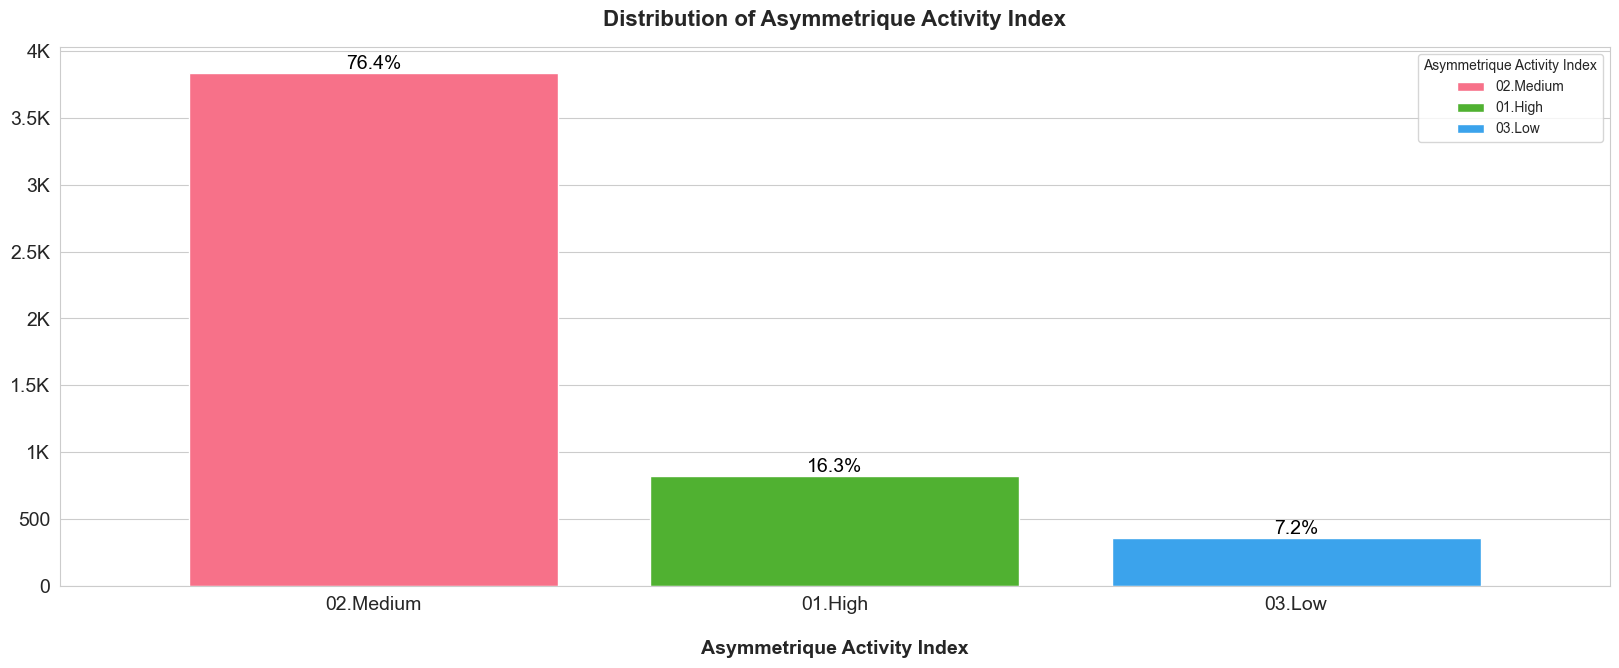

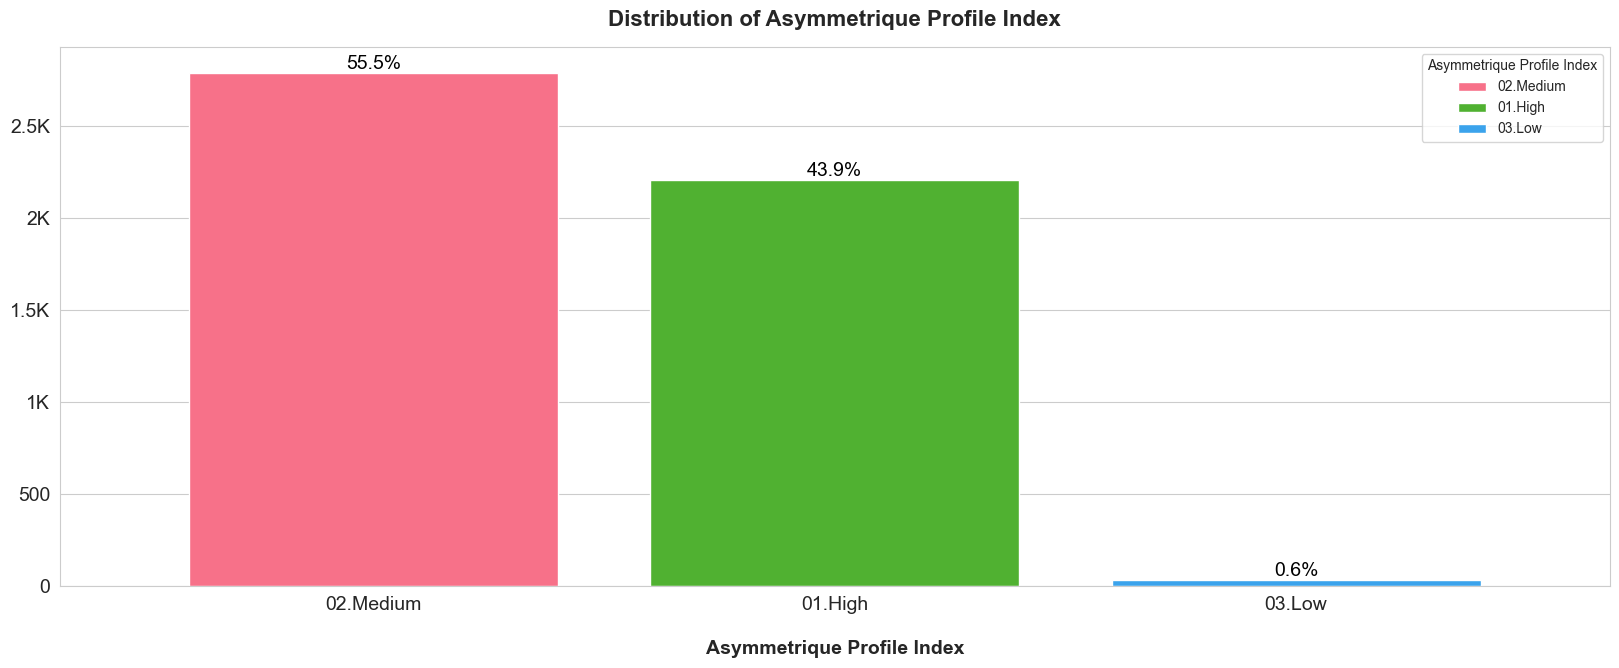

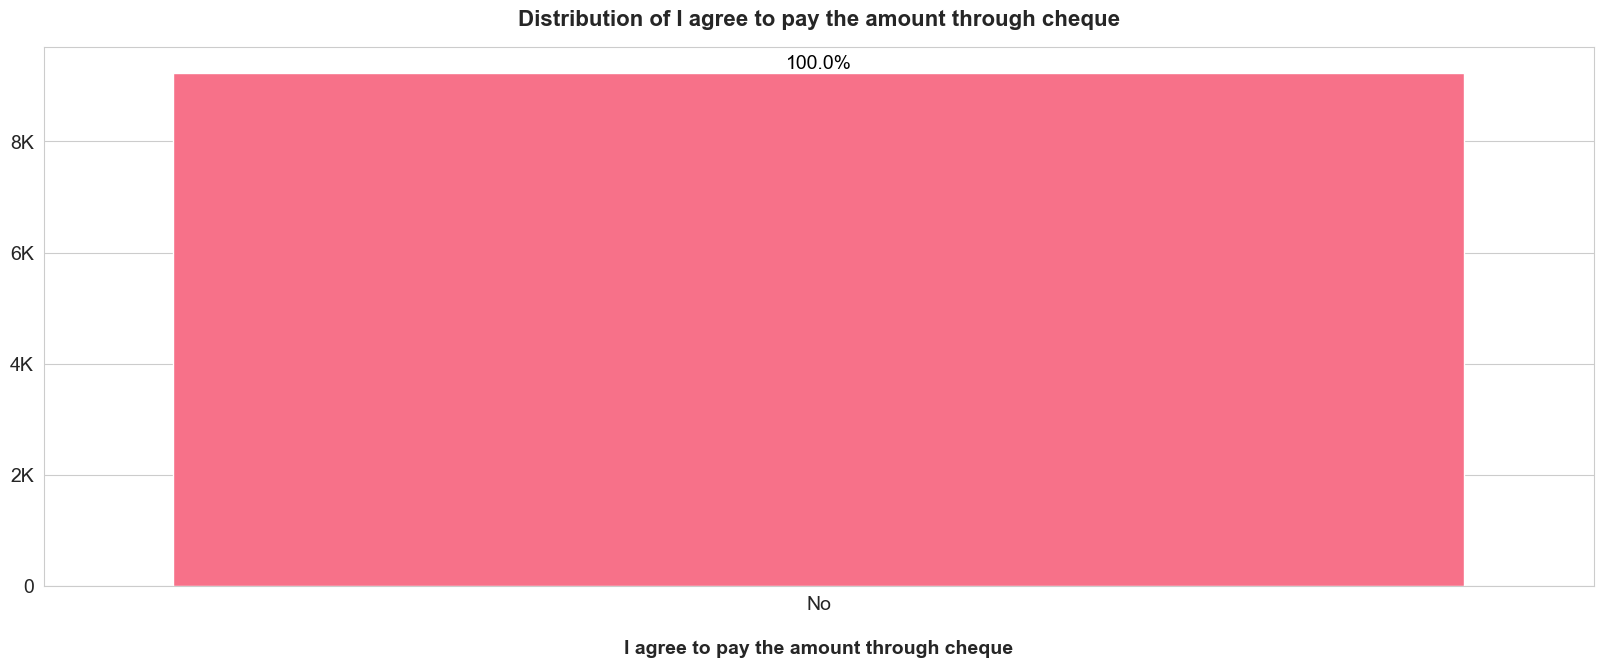

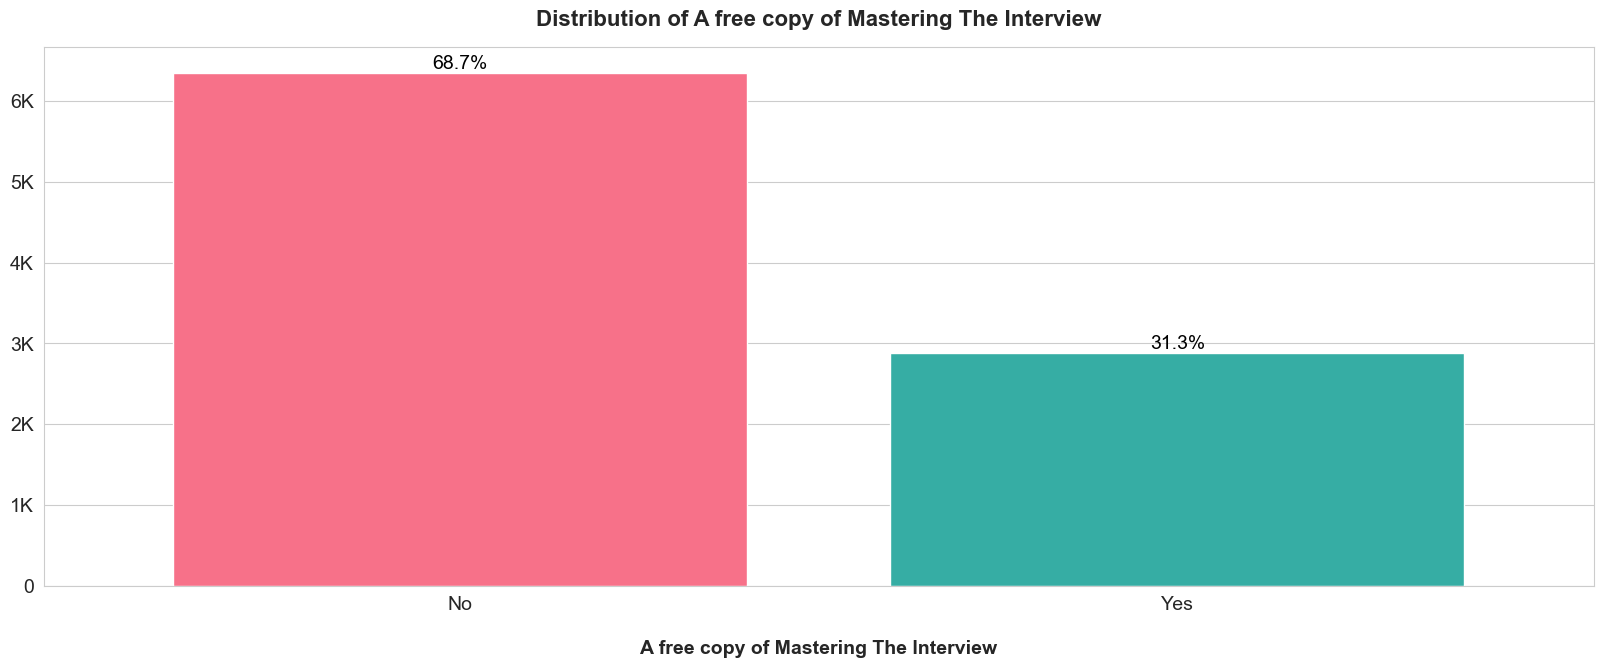

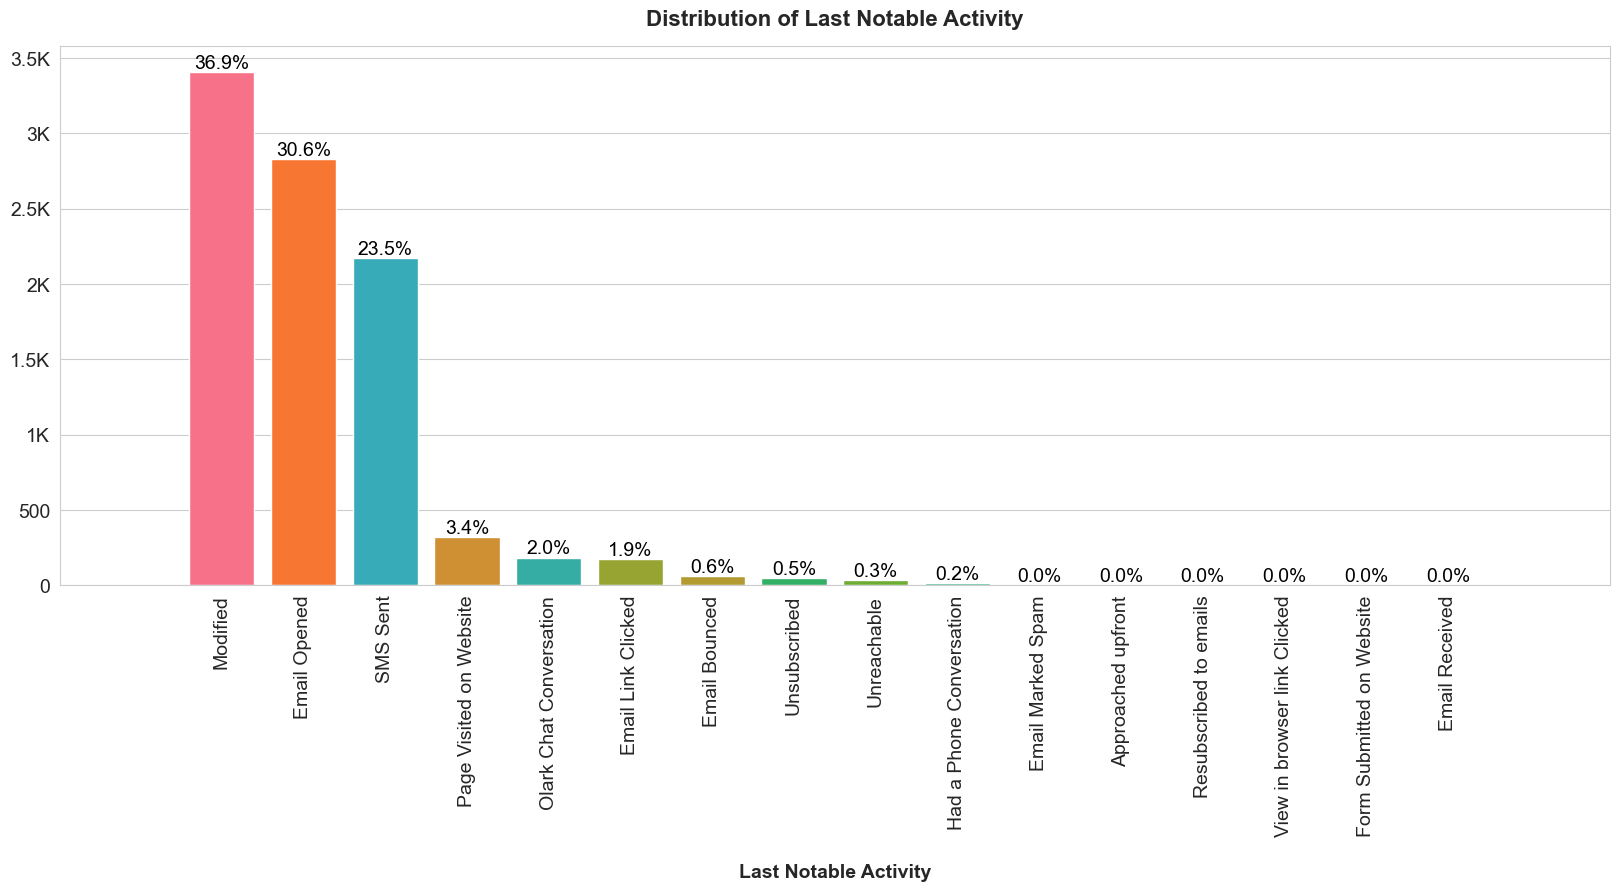

In [374]:
# Print countplots for each categorical columns
for column in categorical_columns:
    count_plot(data, column, rotate_label=True if column in ['Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'Tags', 'Last Notable Activity', 'City'] else False, rotate_plot=True if column == 'Country' else False)
    print('')
    print('')

### Dropping columns with only 1 value
These columns are called constant or singleton columns and do not provide any additional information for our analysis. 

In [375]:
# Dropping columns
data.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], inplace=True)

### Handling Imbalanced Features
We will perform Feature Engineering by grouping less frequent categories into an 'Other' category to reduce imbalance.

#### Lead Source

In [376]:
# Check Value counts
data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [377]:
# Merging sources - Google and google
data.loc[data['Lead Source'] == 'google', 'Lead Source'] = 'Google'

In [378]:
# Lead sources with less than 0.1% proportion
lead_others = list((data['Lead Source'].value_counts(normalize=True) * 100).where(lambda x: x < 0.1).dropna().index)

In [379]:
# Grouping sources less than 0.1% as Others
data.loc[data['Lead Source'].isin(lead_others), 'Lead Source'] = 'Others'

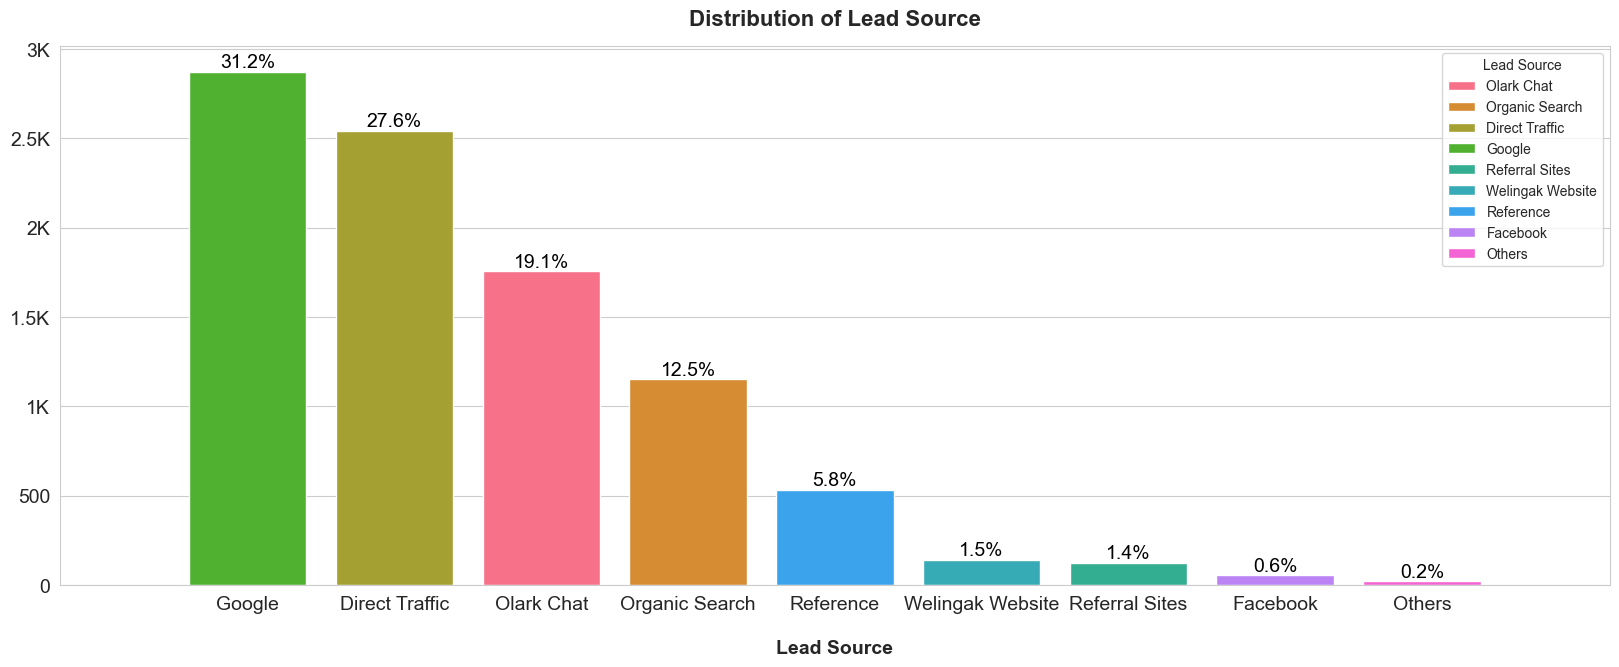

In [380]:
# Visualising the new distribution
count_plot(data, 'Lead Source')

#### Last Activity

In [381]:
# Checking value counts
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [382]:
# Lead sources with less than 0.1% proportion
last_activity_others = list((data['Last Activity'].value_counts(normalize=True) * 100).where(lambda x: x < 0.1).dropna().index)
last_activity_others

['Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [383]:
# Grouping activities less than 0.1% as Others
data.loc[data['Last Activity'].isin(last_activity_others), 'Last Activity'] = 'Others'

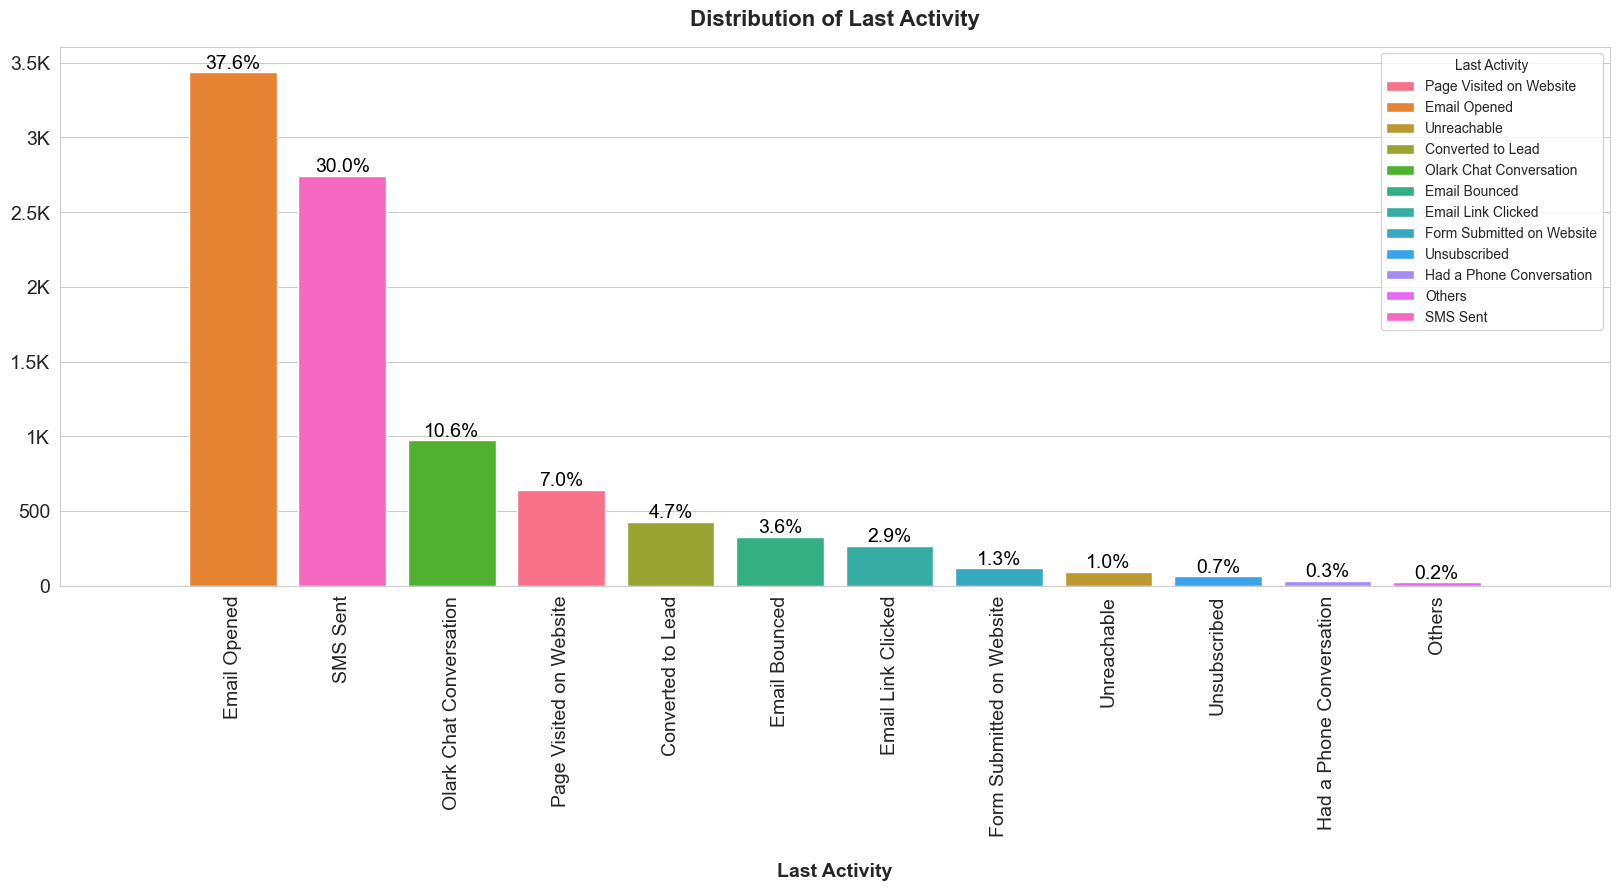

In [384]:
# Visualising the new distribution
count_plot(data, 'Last Activity', rotate_label=True)

#### Country

In [385]:
# Getting Value count of country
data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [386]:
# Countries with less than 0.1% proportion
country_others = list((data['Country'].value_counts(normalize=True) * 100).where(lambda x: x < 0.1).dropna().index)
country_others

['Oman',
 'France',
 'unknown',
 'South Africa',
 'Nigeria',
 'Germany',
 'Kuwait',
 'Canada',
 'Sweden',
 'China',
 'Asia/Pacific Region',
 'Uganda',
 'Bangladesh',
 'Italy',
 'Belgium',
 'Netherlands',
 'Ghana',
 'Philippines',
 'Russia',
 'Switzerland',
 'Vietnam',
 'Denmark',
 'Tanzania',
 'Liberia',
 'Malaysia',
 'Kenya',
 'Sri Lanka',
 'Indonesia']

In [387]:
# Grouping countries less than 0.1% as Others
data.loc[data['Country'].isin(country_others), 'Country'] = 'Others'

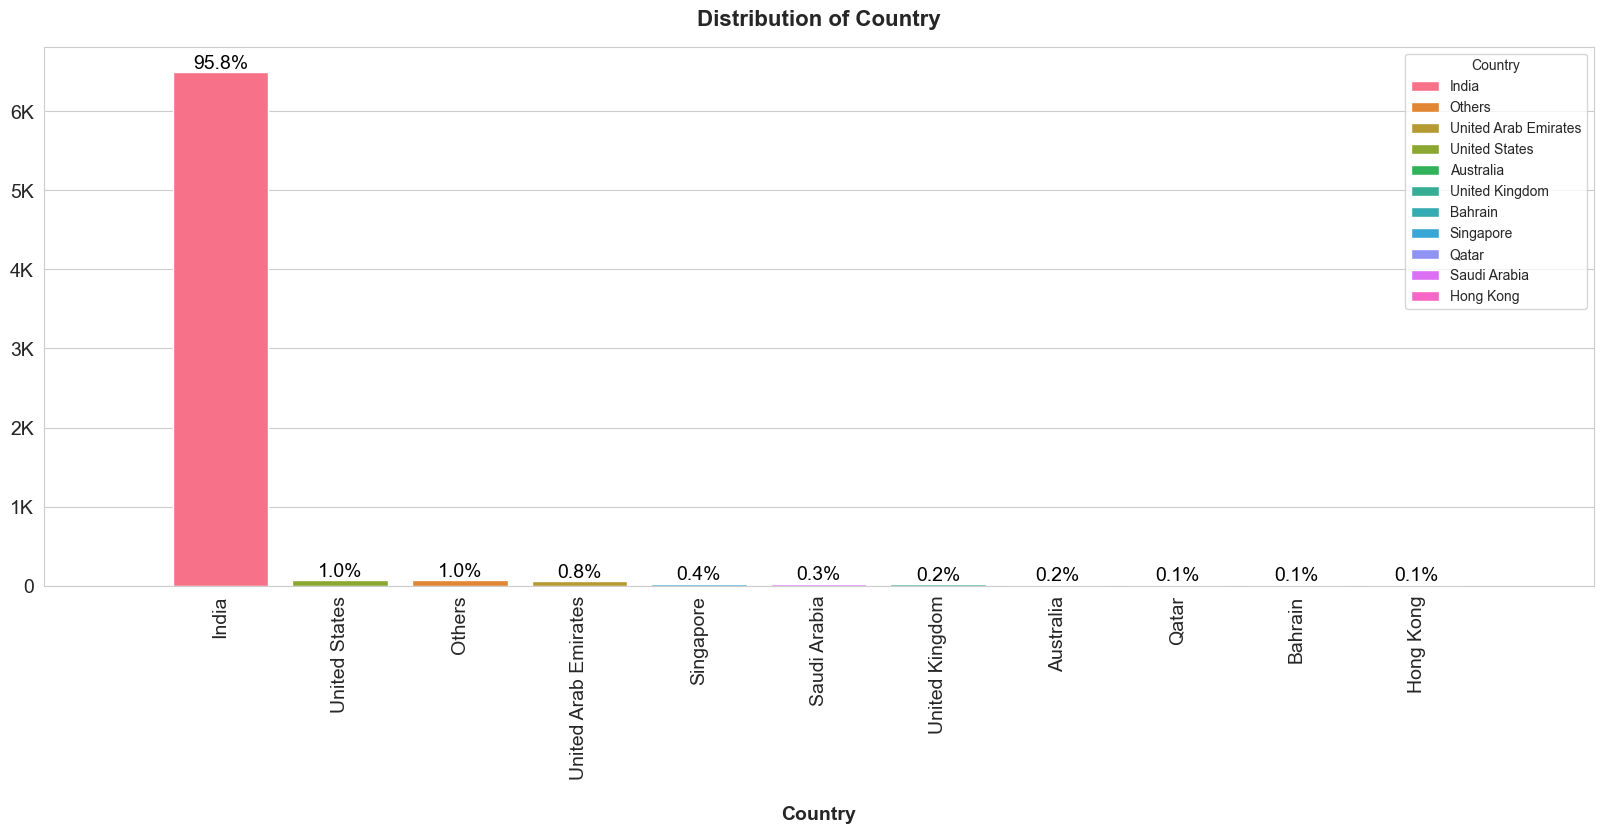

In [388]:
# Visualising the new distribution
count_plot(data, 'Country', rotate_label=True)

#### What matters most to you in choosing a course

In [389]:
# Checking Value counts
data['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [390]:
# Replacing everything else apart from 'Better Career Prospects' as Others
data.loc[(data['What matters most to you in choosing a course'] != 'Better Career Prospects') & (~data['What matters most to you in choosing a course'].isnull()), 'What matters most to you in choosing a course'] = 'Others'

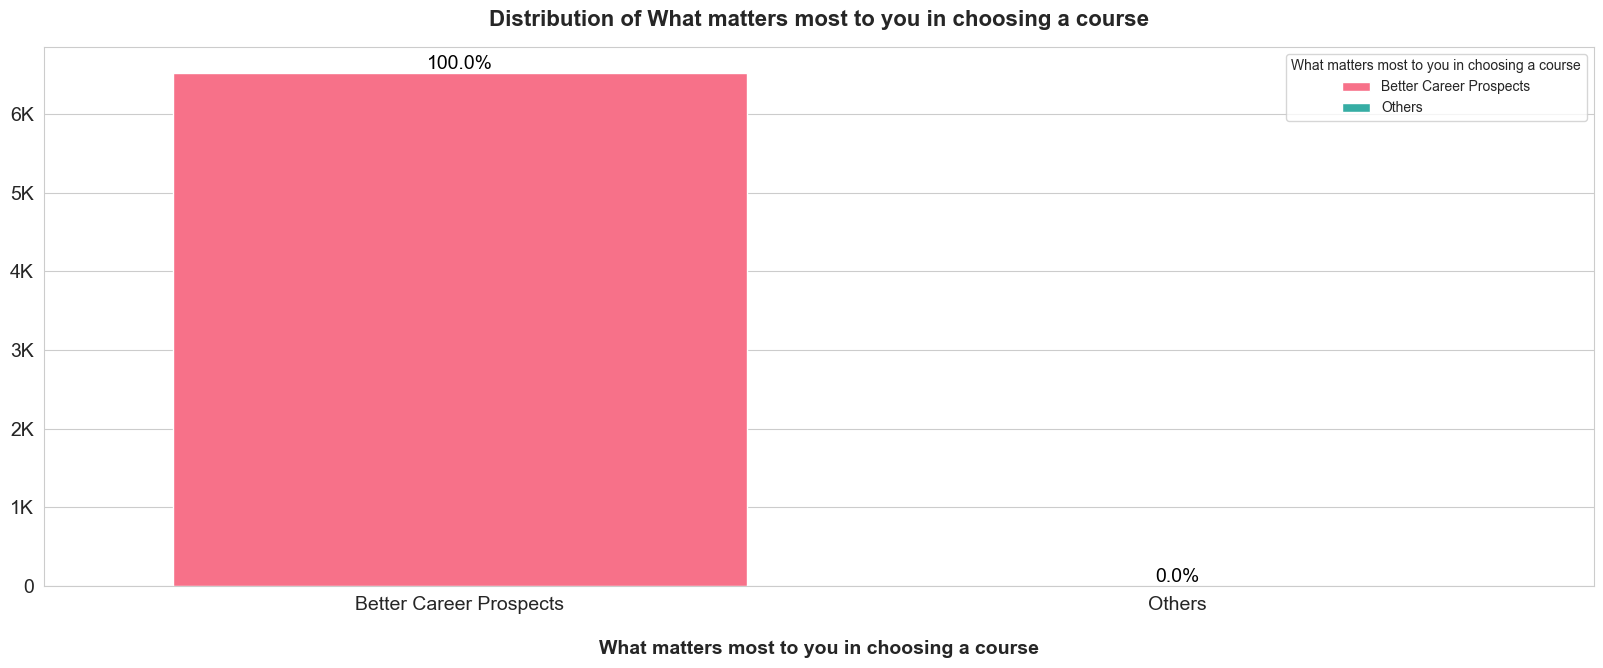

In [391]:
# Visualizing the distribution
count_plot(data, 'What matters most to you in choosing a course')

#### Tags

In [392]:
# Get Value counts
data['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [393]:
# Tags with less than 5% proportion
tags_others = list((data['Tags'].value_counts(normalize=True) * 100).where(lambda x: x < 2).dropna().index)
tags_others

['Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [394]:
# Grouping activities less than 0.1% as Others
data.loc[data['Tags'].isin(tags_others), 'Tags'] = 'Others'

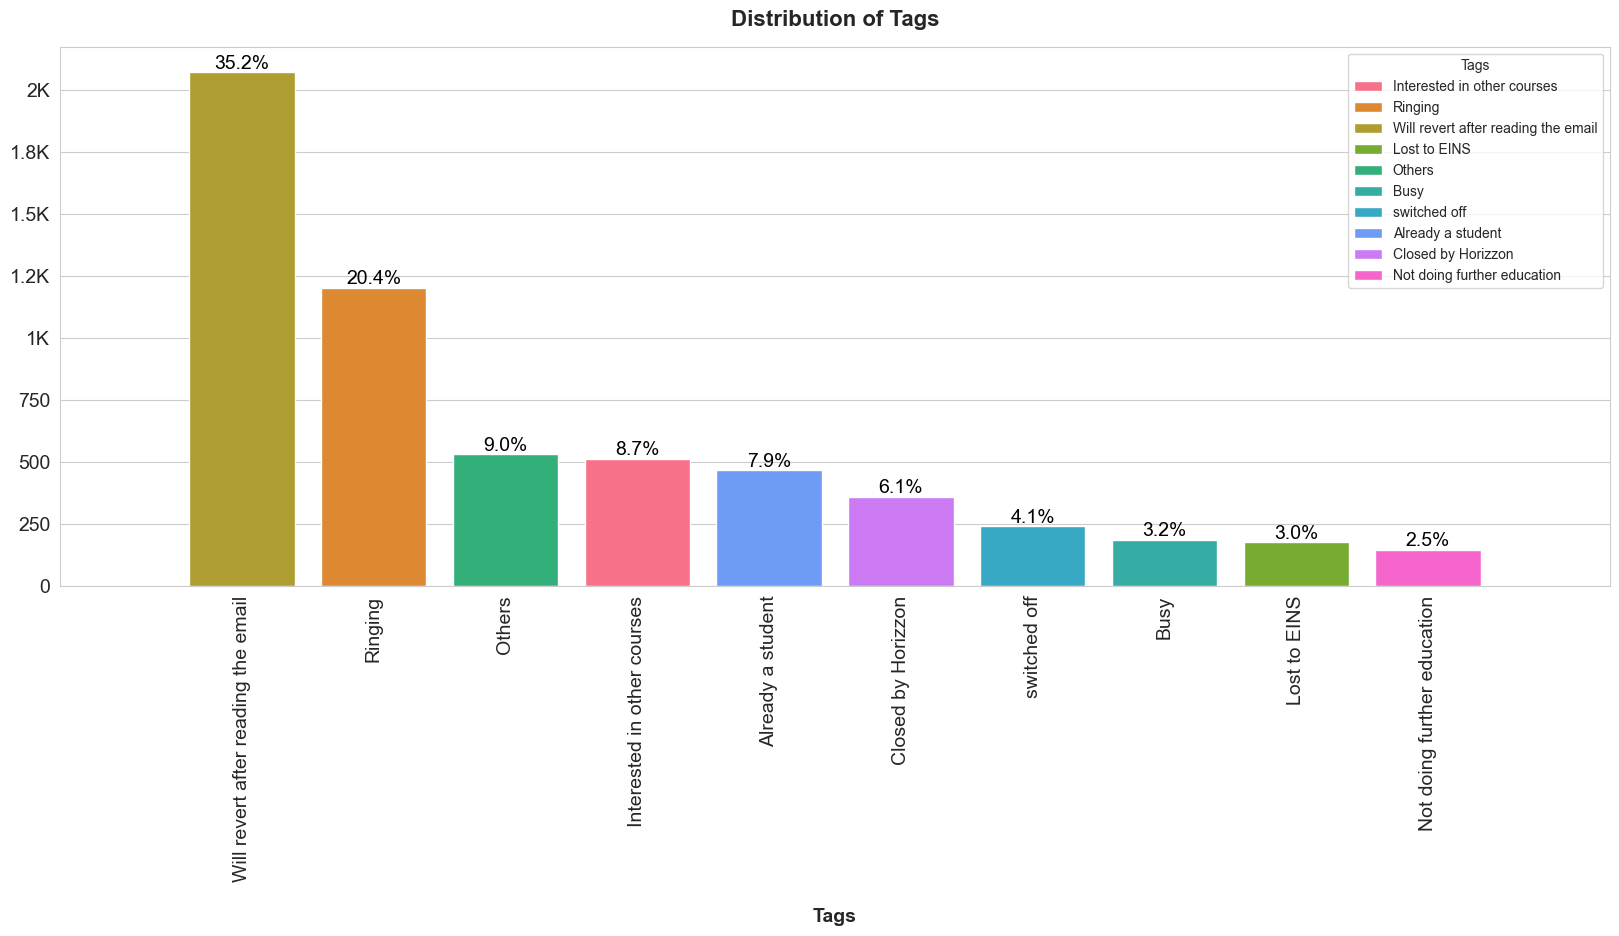

In [395]:
# Visualising the new distribution
count_plot(data, 'Tags', rotate_label=True)

#### Last Notable Activity

In [396]:
# Checking Value counts
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [397]:
# Activities to be marked as Others
activity_others = list((data['Last Notable Activity'].value_counts(normalize=True) * 100).where(lambda x: x < 1).dropna().index)
activity_others

['Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [398]:
# Marking as others whose proportion is less than 0.1%
data.loc[data['Last Notable Activity'].isin(activity_others), 'Last Notable Activity'] = 'Others'

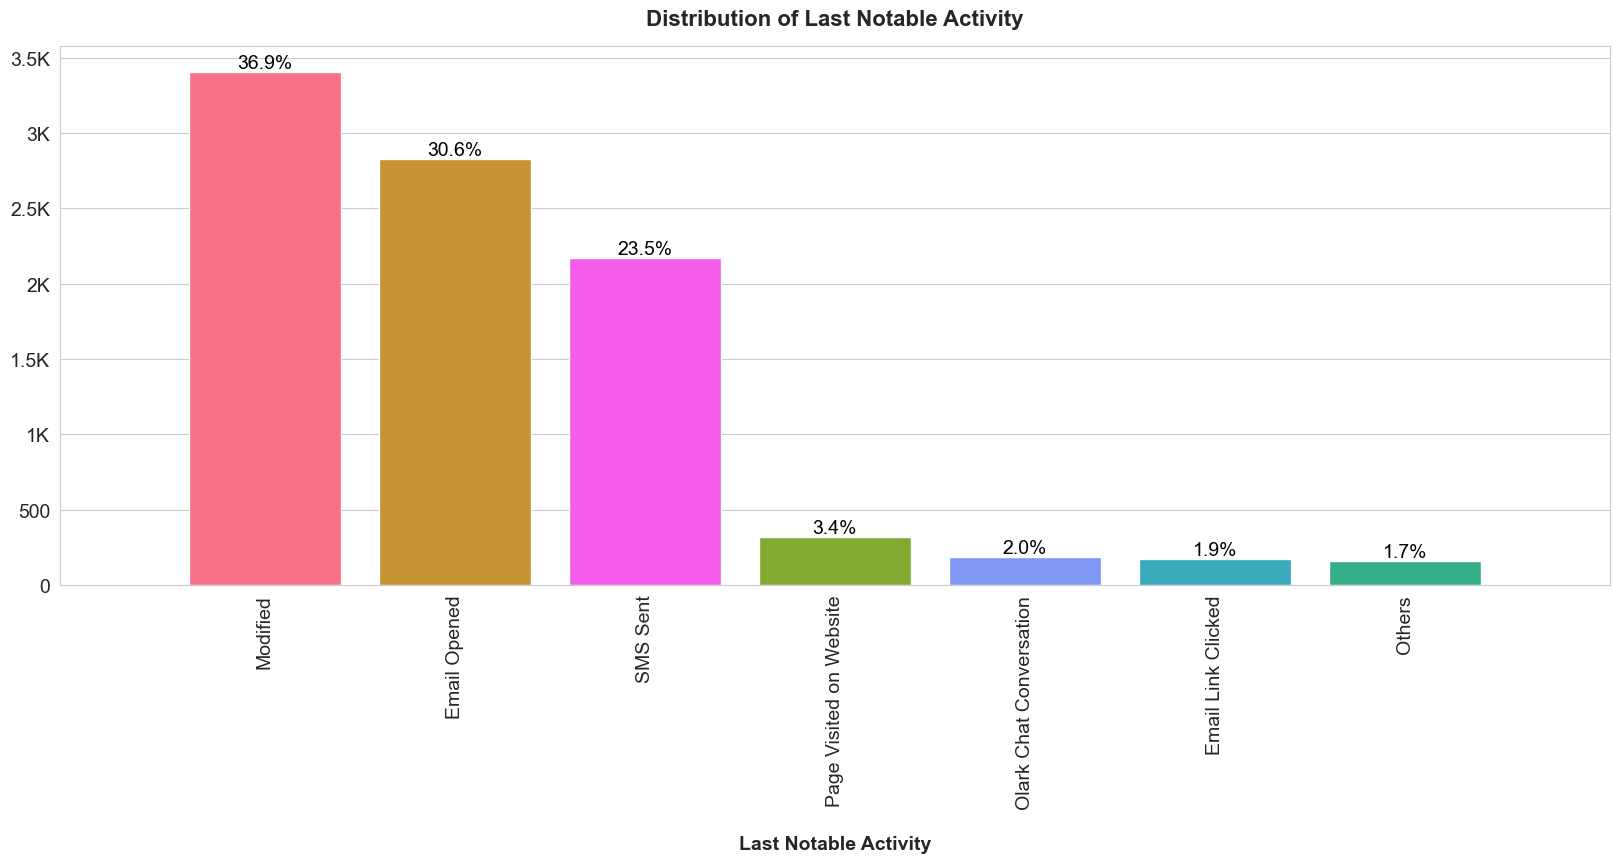

In [399]:
# Visualizing the new distribution of Last Notable Activity
count_plot(data, 'Last Notable Activity', rotate_label=True)

### Fix values in Columns

#### Specialization

In [400]:
# Get Value counts
data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [401]:
# Checking 'Select' values
data.loc[data['Specialization'] == 'Select']

Lead Origin     Lead Source Do Not Email Do Not Call  \
Lead Number                                                                     
660737                           API      Olark Chat           No          No   
660728                           API  Organic Search           No          No   
660681       Landing Page Submission          Google           No          No   
660547                           API  Organic Search           No          No   
660534                           API  Referral Sites           No          No   
...                              ...             ...          ...         ...   
579883                           API          Google           No          No   
579869                           API  Organic Search           No          No   
579786                           API      Olark Chat           No          No   
579735                           API      Olark Chat           No          No   
579622                           API  Direct Traffic           No          No   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
660737               0          0.0                            0   
660728               0          5.0                          674   
660681               1          2.0                         1428   
660547               1          6.0                         1012   
660534               0          6.0                          973   
...                ...          ...                          ...   
579883               0          2.0                           12   
579869               0          2.0                         1370   
579786               0          0.0                            0   
579735               0          0.0                            0   
579622               1         13.0                         1409   

             Page Views Per Visit            Last Activity Country  ...  \
Lead Number                                                         ...   
660737                        0.0  Page Visited on Website     NaN  ...   
660728                        2.5             Email Opened   India  ...   
660681                        1.0        Converted to Lead   India  ...   
660547                        6.0             Email Opened   India  ...   
660534                        6.0       Email Link Clicked   India  ...   
...                           ...                      ...     ...  ...   
579883                        2.0             Email Opened   India  ...   
579869                        2.0                 SMS Sent   India  ...   
579786                        0.0                 SMS Sent     NaN  ...   
579735                        0.0                 SMS Sent     NaN  ...   
579622                        2.6                 SMS Sent   India  ...   

                                            Tags      Lead Quality  \
Lead Number                                                          
660737               Interested in other courses  Low in Relevance   
660728                                   Ringing               NaN   
660681       Will revert after reading the email          Might be   
660547       Will revert after reading the email          Might be   
660534               Interested in other courses          Might be   
...                                          ...               ...   
579883                                   Ringing               NaN   
579869                                   Ringing               NaN   
579786                                   Ringing          Not Sure   
579735                                   Ringing          Not Sure   
579622       Will revert after reading the email               NaN   

               Lead Profile    City Asymmetrique Activity Index  \
Lead Number                                                       
660737               Select  Select                   02.Medium  

**Note:**
We will replace 'Select' as it seems to be a placeholder value from a non-mandatory form's dropdown.

In [402]:
# Replace 'Select' with NaN 
data.replace('Select', np.nan, inplace=True)

### Convert Discrete to Numeric

In [403]:
# Columns which are discrete i.e. binary type
discrete_columns = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                    'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview']

In [404]:
# Convert categorical columns to numeric
for column in discrete_columns:
    convert_to_numeric(column)

In [405]:
# Display the top 5 rows of data
data.head()

Lead Origin     Lead Source  Do Not Email  \
Lead Number                                                          
660737                           API      Olark Chat             0   
660728                           API  Organic Search             0   
660727       Landing Page Submission  Direct Traffic             0   
660719       Landing Page Submission  Direct Traffic             0   
660681       Landing Page Submission          Google             0   

             Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                                     
660737                 0          0          0.0                            0   
660728                 0          0          5.0                          674   
660727                 0          1          2.0                         1532   
660719                 0          0          1.0                          305   
660681                 0          1          2.0                         1428   

             Page Views Per Visit            Last Activity Country  ...  \
Lead Number                                                         ...   
660737                        0.0  Page Visited on Website     NaN  ...   
660728                        2.5             Email Opened   India  ...   
660727                        2.0             Email Opened   India  ...   
660719                        1.0              Unreachable   India  ...   
660681                        1.0        Converted to Lead   India  ...   

                                            Tags      Lead Quality  \
Lead Number                                                          
660737               Interested in other courses  Low in Relevance   
660728                                   Ringing               NaN   
660727       Will revert after reading the email          Might be   
660719                                   Ringing          Not Sure   
660681       Will revert after reading the email          Might be   

               Lead Profile    City  Asymmetrique Activity Index  \
Lead Number                                                        
660737                  NaN     NaN                            0   
660728                  NaN     NaN                            0   
660727       Potential Lead  Mumbai                            0   
660719                  NaN  Mumbai                            0   
660681                  NaN  Mumbai                            0   

             Asymmetrique Profile Index  Asymmetrique Activity Score  \
Lead Number                                                            
660737                                0                         15.0   
660728                                0                         15.0   
660727                                0                         14.0   
660719                                0                         13.0   
660681                                0                         15.0   

             Asymmetrique Profile Score  \
Lead Number                               
660737                             15.0   
660728                             15.0   
660727                             20.0   
660719                             17.0   
660681                             18.0   

             A free copy of Mastering The Interview  Last Notable Activity  
Lead Number                                                                 
660737                                            0               Modified  
660728                                            0           Email Opened  
660727                                            1           Email Opened  
660719                                            0               Modified  
660681                                            0               Modified  

[5 rows x 30 columns]

### Handling Missing Values

In [406]:
# Sorting columns with most missing values
(data.isnull().sum() / len(data) * 100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Asymmetrique Profile Index                        0.000000
Asymmetrique Activity Index                       0.0000

**Note:**
Columns - How did you hear about X Education and Lead Profile have about 70% of missing values. Hence, we will drop these missing values. 

In [407]:
# Columns with missing values greater than 20%
columns_with_missing_values_above_20 = (data.isnull().sum() / len(data))[(data.isnull().sum() / len(data) > 0.2)].index.to_list()
columns_with_missing_values_above_20

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [408]:
# Columns with missing values greater than 40%
columns_with_missing_values_above_40 = (data.isnull().sum() / len(data))[(data.isnull().sum() / len(data) > 0.4)].index.to_list()
columns_with_missing_values_above_40

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### How did you hear about X Education

In [409]:
# Checking value count
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

#### Lead Profile

In [410]:
# Get value counts
data['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

#### Dropping columns

In [411]:
# Drop columns
data.drop(columns=['How did you hear about X Education', 'Lead Profile'], inplace=True)

#### Lead Quality

In [412]:
# Checking unique columns in Lead Quality
data['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

Create a new category/label for NaN values

In [413]:
# Replace missing values in the 'Lead Quality' column with a meaningful value ('Missing')
data.loc[data['Lead Quality'].isnull(), 'Lead Quality'] = 'Missing'

In [414]:
# Get Value counts
data['Lead Quality'].value_counts()

Lead Quality
Missing              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

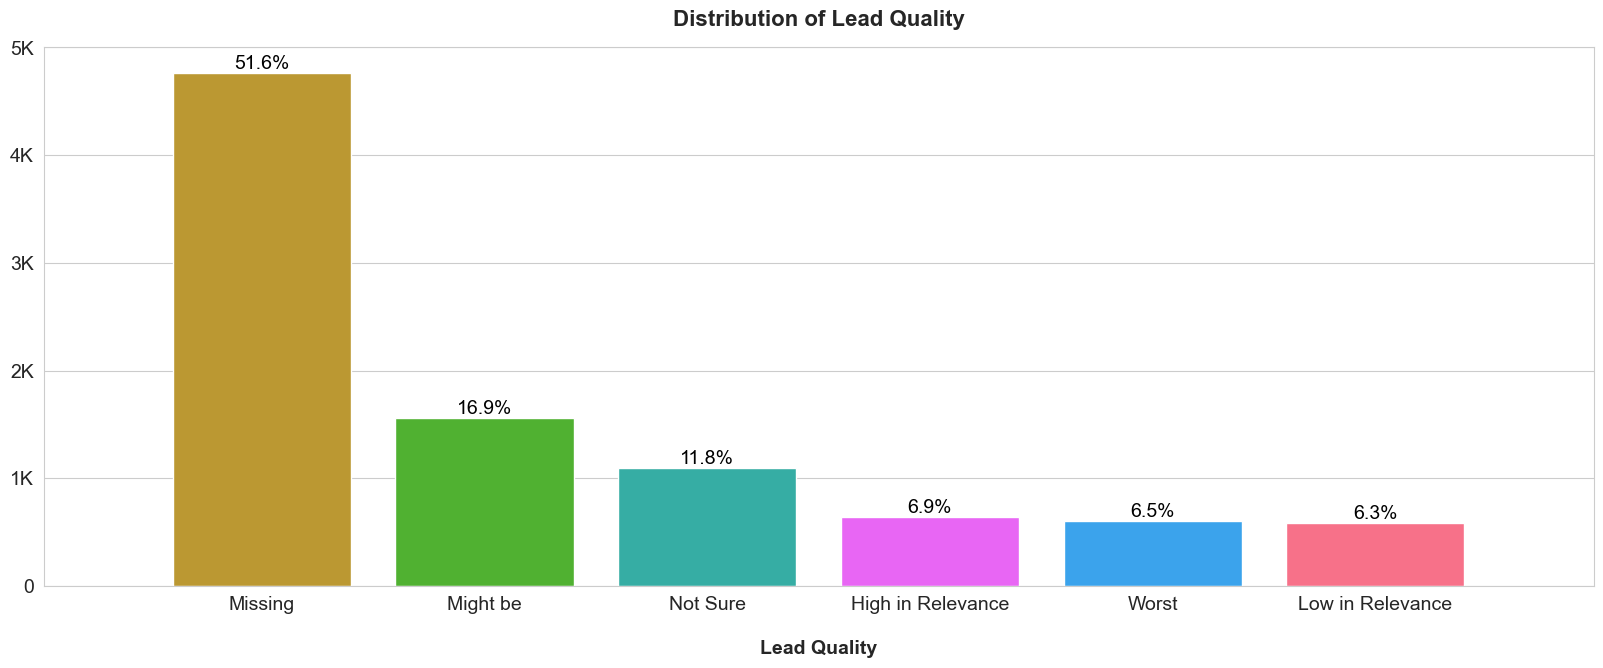

In [415]:
# Plot count plot
count_plot(data, 'Lead Quality')

**Note:** Since the values in the column despite correction is skewed towards missing values, we will drop the column.

In [416]:
# Dropping columns
data.drop(columns=['Lead Quality'], inplace=True)

#### Asymmetrique Profile Score

In [417]:
# Check the unique values
data['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [418]:
# Get Value counts
data['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [419]:
# Numeric stats of the column
data['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

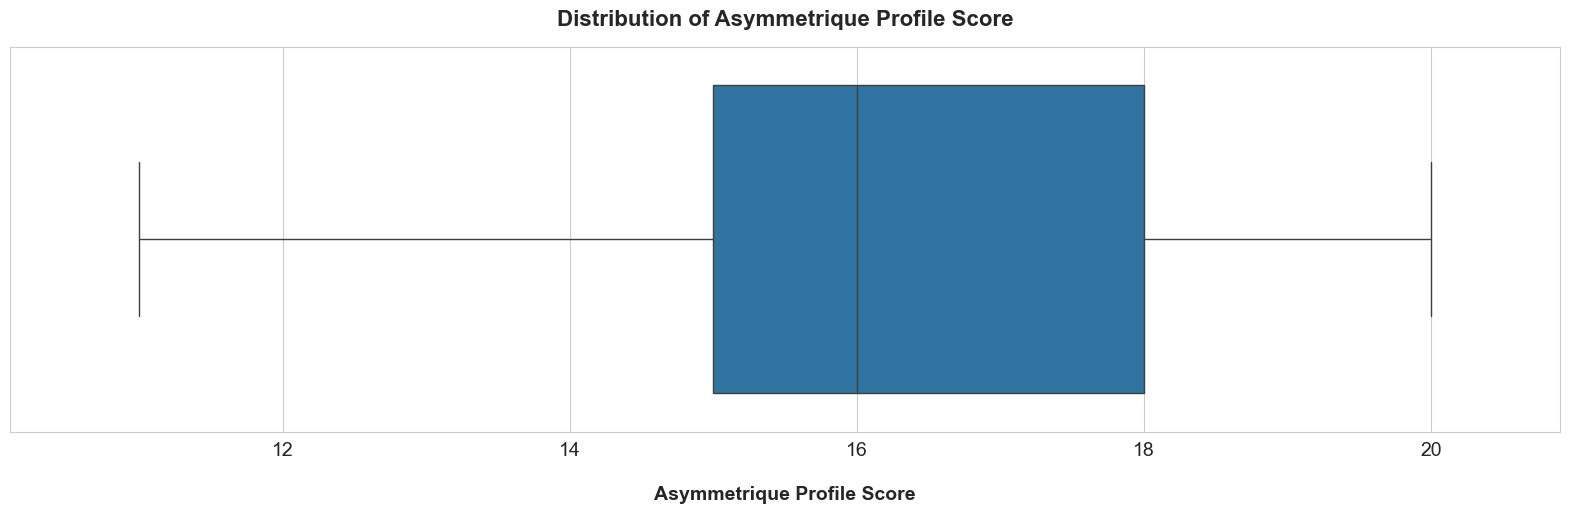

In [420]:
# Plot box-plot
box_plot(data, 'Asymmetrique Profile Score')

In [421]:
# Check the mode
data['Asymmetrique Profile Score'].mode()

0    15.0
Name: Asymmetrique Profile Score, dtype: float64

**Note:** Since the values are discrete, we will replace the missing values with the mode.

In [422]:
# Replace missing values in the 'Asymmetrique Profile Score' column with the most frequent value (mode)
data.loc[data['Asymmetrique Profile Score'].isnull(), 'Asymmetrique Profile Score'] = data['Asymmetrique Profile Score'].mode()[0]

#### Asymmetrique Activity Score

In [423]:
# Check unique values
data['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [424]:
# Get Value counts
data['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [425]:
# Get stats
data['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [426]:
# Get Mode
data['Asymmetrique Activity Score'].mode()

0    14.0
Name: Asymmetrique Activity Score, dtype: float64

In [427]:
# Replace missing values with mode
data.loc[data['Asymmetrique Activity Score'].isnull(), 'Asymmetrique Activity Score'] = data['Asymmetrique Activity Score'].mode()[0]

In [428]:
data.drop(columns=['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], inplace=True)

#### City

In [429]:
# Get unique values in city
data['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [430]:
# Get Value counts
data['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [431]:
# Checking countries of Other cities
data.loc[data['City'] == 'Other Cities', 'Country'].unique()

array(['India', nan, 'Bahrain', 'Qatar', 'Others', 'Saudi Arabia',
       'United Arab Emirates', 'United States', 'Hong Kong', 'Australia',
       'Singapore'], dtype=object)

In [432]:
# Marking cities which is null and in other countries than India as 'Other Cities'
data.loc[
    (data['City'].isnull()) &
    (data['Country'] != 'India') &
    ~(data['Country'].isnull()),
    'City'
] = 'Other Cities'

In [433]:
# Check null value percentage
data['City'].isnull().sum() / len(data) * 100

39.05844155844156

In [434]:
# Check data with missing cities
data.loc[data['City'].isnull()]

Lead Origin     Lead Source  Do Not Email  Do Not Call  Converted  \
Lead Number                                                                     
660737              API      Olark Chat             0            0          0   
660728              API  Organic Search             0            0          0   
660680              API      Olark Chat             0            0          0   
660664              API      Olark Chat             0            0          0   
660562              API  Organic Search             0            0          1   
...                 ...             ...           ...          ...        ...   
579851              API          Google             0            0          0   
579808              API  Organic Search             0            0          1   
579786              API      Olark Chat             0            0          0   
579735              API      Olark Chat             0            0          0   
579622              API  Direct Traffic             0            0          1   

             TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
Lead Number                                                                   
660737               0.0                            0                   0.0   
660728               5.0                          674                   2.5   
660680               0.0                            0                   0.0   
660664               0.0                            0                   0.0   
660562              11.0                         1538                  11.0   
...                  ...                          ...                   ...   
579851               2.0                          181                   2.0   
579808               2.0                          881                   2.0   
579786               0.0                            0                   0.0   
579735               0.0                            0                   0.0   
579622              13.0                         1409                   2.6   

                       Last Activity Country  ... X Education Forums  \
Lead Number                                   ...                      
660737       Page Visited on Website     NaN  ...                  0   
660728                  Email Opened   India  ...                  0   
660680       Olark Chat Conversation     NaN  ...                  0   
660664       Olark Chat Conversation     NaN  ...                  0   
660562                  Email Opened   India  ...                  0   
...                              ...     ...  ...                ...   
579851                      SMS Sent   India  ...                  0   
579808                      SMS Sent   India  ...                  0   
579786                      SMS Sent     NaN  ...                  0   
579735                      SMS Sent     NaN  ...                  0   
579622                      SMS Sent   India  ...                  0   

            Newspaper Digital Advertisement  Through Recommendations  \
Lead Number                                                            
660737              0                     0                        0   
660728              0                     0                        0   
660680              0                     0                        0   
660664              0                     0                        0   
660562              0                     0                        0   
...               ...                   ...                      ...   
579851              0                     0                        0   
579808              0                     0                        0   
579786              0                     0                        0   
579735              0                     0                        0   
579622              0                     0                        0   

                                            Tags  City  

In [435]:
# Marking missing cities as 'Other cities'
data.loc[data['City'].isnull(), 'City'] = 'Other Cities'

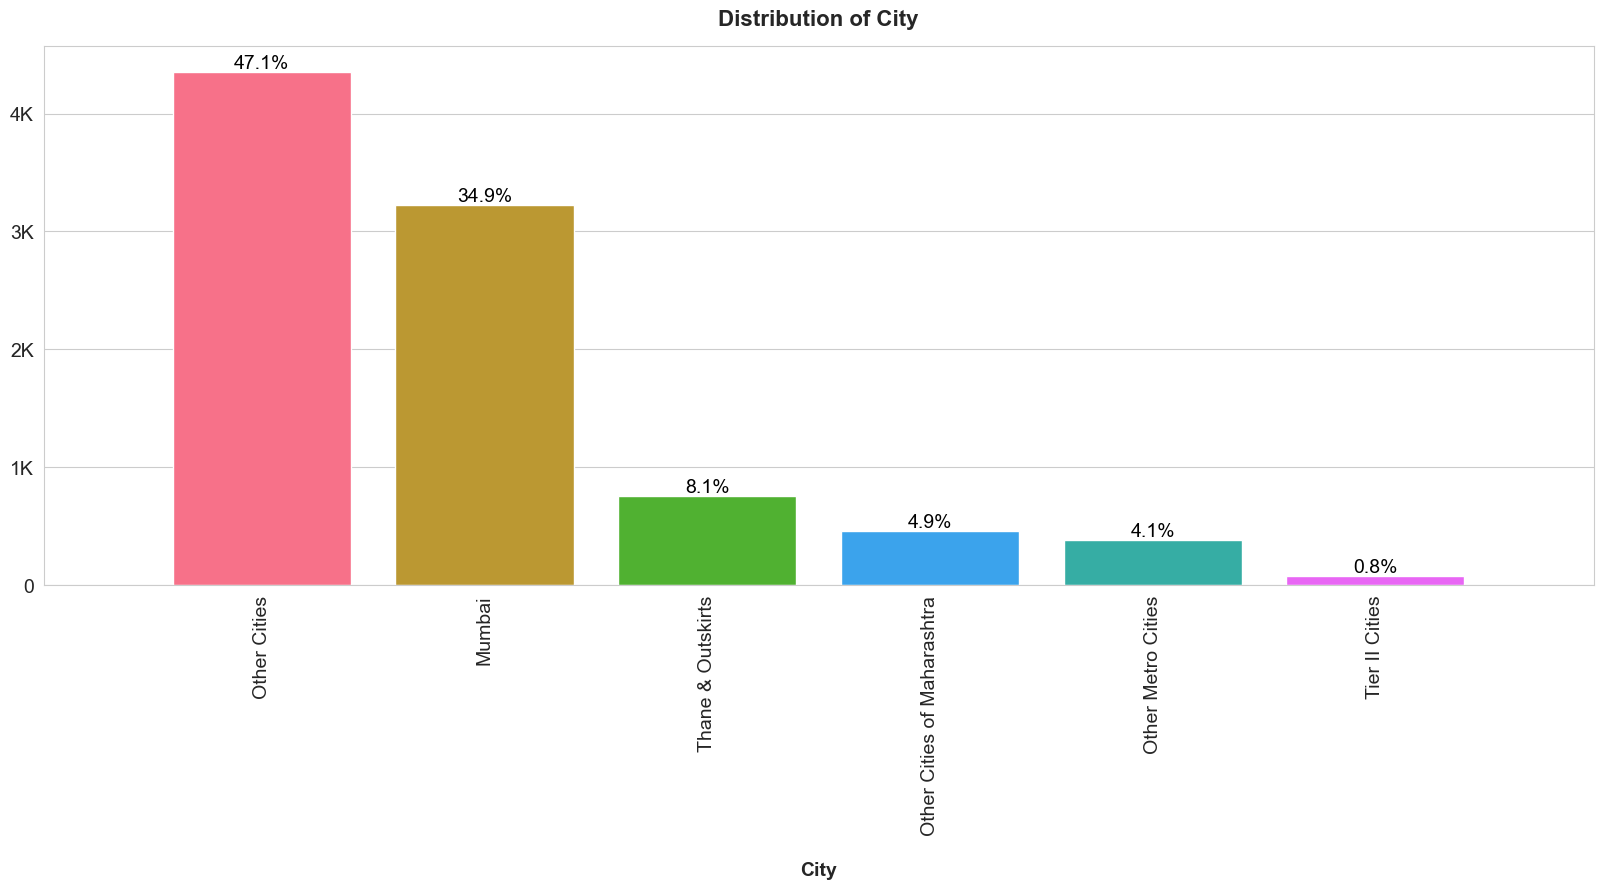

In [436]:
# Plot distribution
count_plot(data, 'City', rotate_label=True)

#### Specialization

In [437]:
# Check unique values
data['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [438]:
# Get Value counts
data['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

Create a new category/label for NaN values

In [439]:
# Replace missing values in the 'Specialization' column with a meaningful value ('Missing')
data.loc[data['Specialization'].isnull(), 'Specialization'] = 'Missing'

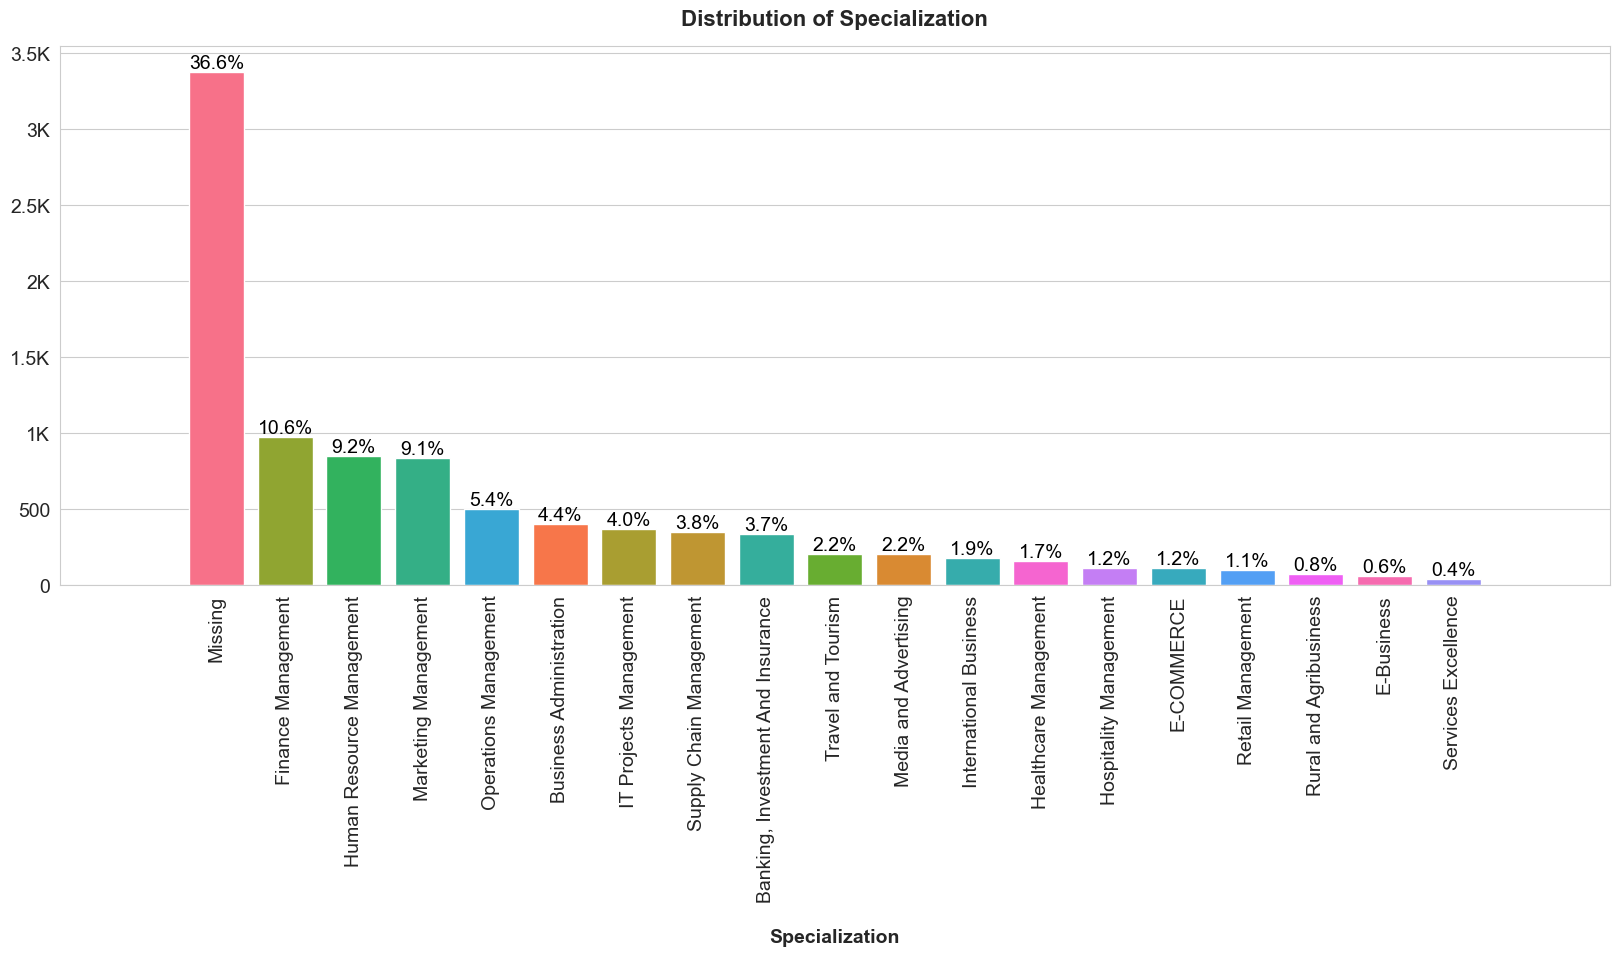

In [440]:
# Check new distribution
count_plot(data, 'Specialization', rotate_label=True)

#### Tags

In [441]:
# Check unique values
data['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'Others', 'Busy', 'switched off', 'Already a student',
       'Closed by Horizzon', 'Not doing further education'], dtype=object)

In [442]:
# Check value counts
data['Tags'].value_counts()

Tags
Will revert after reading the email    2072
Ringing                                1203
Others                                  530
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Name: count, dtype: int64

In [443]:
# Check data with missing Tags
data.loc[data['Tags'].isnull()]

Lead Origin     Lead Source  Do Not Email  \
Lead Number                                                          
660680                           API      Olark Chat             0   
660664                           API      Olark Chat             0   
660624       Landing Page Submission  Direct Traffic             0   
660616                           API          Google             0   
660553       Landing Page Submission  Direct Traffic             1   
...                              ...             ...           ...   
579822       Landing Page Submission  Direct Traffic             1   
579808                           API  Organic Search             0   
579802       Landing Page Submission  Organic Search             0   
579784       Landing Page Submission          Google             1   
579538       Landing Page Submission          Google             0   

             Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                                     
660680                 0          0          0.0                            0   
660664                 0          0          0.0                            0   
660624                 0          0          2.0                           71   
660616                 0          0          4.0                           58   
660553                 0          0          1.0                          481   
...                  ...        ...          ...                          ...   
579822                 0          0          5.0                          234   
579808                 0          1          2.0                          881   
579802                 0          0          8.0                          397   
579784                 0          0          1.0                          149   
579538                 0          1          3.0                          499   

             Page Views Per Visit            Last Activity Country  ...  \
Lead Number                                                         ...   
660680                        0.0  Olark Chat Conversation     NaN  ...   
660664                        0.0  Olark Chat Conversation     NaN  ...   
660624                        2.0             Email Opened   India  ...   
660616                        4.0             Email Opened   India  ...   
660553                        1.0            Email Bounced  Others  ...   
...                           ...                      ...     ...  ...   
579822                        2.5  Page Visited on Website   India  ...   
579808                        2.0                 SMS Sent   India  ...   
579802                        8.0             Email Opened   India  ...   
579784                        1.0            Email Bounced   India  ...   
579538                        3.0                 SMS Sent   India  ...   

            X Education Forums Newspaper Digital Advertisement  \
Lead Number                                                      
660680                       0         0                     0   
660664                       0         0                     0   
660624                       0         0                     0   
660616                       0         0                     0   
660553                       0         0                     0   
...                        ...       ...                   ...   
579822                       0         0                     0   
579808                       0         0                     0   
579802                       0         0                     0   
579784                       0         0                     0   
579538                       0         0                     0   

             Through Recommendations  Tags                City  \
Lead Number                                                      
660680                             0   NaN        Other Cities   
660664                     

**Note:** Since Tags is synonymous with Missing Lead Quality, we will label the missing tags as 'Missing' and 'Others' as shown below

In [444]:
# Marking the remaining as 'Others'
data.loc[data['Tags'].isnull(), 'Tags'] = 'Others'

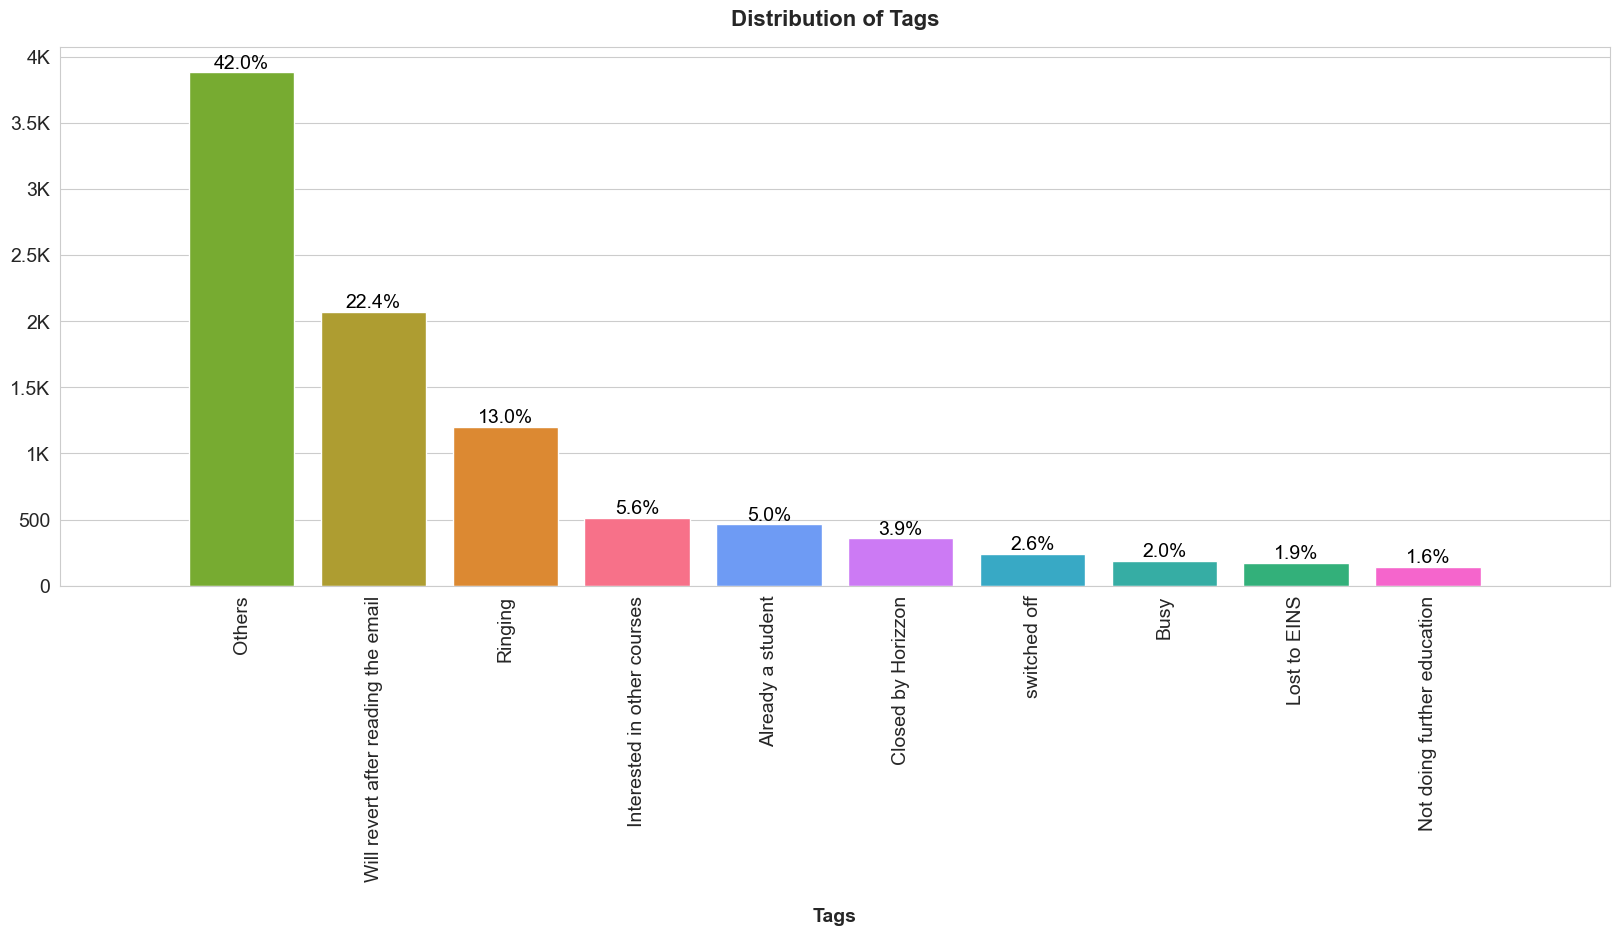

In [445]:
# Plot count plot
count_plot(data, 'Tags', rotate_label=True)

**Note:** Despite the update, Tags still has very high missing values - we will drop this column.

In [446]:
# Dropping columns
data.drop(columns=['Tags'], inplace=True)

#### What matters most to you in choosing a course

In [447]:
# Checking Unique values
data['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Others'], dtype=object)

In [448]:
# Get Value counts
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects    6528
Others                        3
Name: count, dtype: int64

**Note:** We will drop this column as the data is imbalanced and has only 1 value.

In [449]:
# Dropping column - What matters most to you in choosing a course
data.drop(columns=['What matters most to you in choosing a course'], inplace=True)

#### What is your current occupation

In [450]:
# Checking Unique values
data['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [451]:
# Checking rows with missing current occupation
data.loc[data['What is your current occupation'].isnull()]

Lead Origin     Lead Source  Do Not Email  \
Lead Number                                                          
660680                           API      Olark Chat             0   
660664                           API      Olark Chat             0   
660624       Landing Page Submission  Direct Traffic             0   
660616                           API          Google             0   
660540                           API      Olark Chat             0   
...                              ...             ...           ...   
579822       Landing Page Submission  Direct Traffic             1   
579808                           API  Organic Search             0   
579802       Landing Page Submission  Organic Search             0   
579784       Landing Page Submission          Google             1   
579538       Landing Page Submission          Google             0   

             Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                                     
660680                 0          0          0.0                            0   
660664                 0          0          0.0                            0   
660624                 0          0          2.0                           71   
660616                 0          0          4.0                           58   
660540                 0          0          0.0                            0   
...                  ...        ...          ...                          ...   
579822                 0          0          5.0                          234   
579808                 0          1          2.0                          881   
579802                 0          0          8.0                          397   
579784                 0          0          1.0                          149   
579538                 0          1          3.0                          499   

             Page Views Per Visit            Last Activity Country  ...  \
Lead Number                                                         ...   
660680                        0.0  Olark Chat Conversation     NaN  ...   
660664                        0.0  Olark Chat Conversation     NaN  ...   
660624                        2.0             Email Opened   India  ...   
660616                        4.0             Email Opened   India  ...   
660540                        0.0  Olark Chat Conversation     NaN  ...   
...                           ...                      ...     ...  ...   
579822                        2.5  Page Visited on Website   India  ...   
579808                        2.0                 SMS Sent   India  ...   
579802                        8.0             Email Opened   India  ...   
579784                        1.0            Email Bounced   India  ...   
579538                        3.0                 SMS Sent   India  ...   

            Newspaper Article X Education Forums  Newspaper  \
Lead Number                                                   
660680                      0                  0          0   
660664                      0                  0          0   
660624                      0                  0          0   
660616                      0                  0          0   
660540                      0                  0          0   
...                       ...                ...        ...   
579822                      0                  0          0   
579808                      0                  0          0   
579802                      0                  0          0   
579784                      0                  0          0   
579538                      0                  0          0   

             Digital Advertisement  Through Recommendations  \
Lead Number                                                   
660680                           0                        0   
660664                           0                        0   
660624      

In [452]:
# Checking Specialization w.r.t. occupation
data.loc[data['What is your current occupation'].isnull(), 'Specialization'].value_counts(normalize=True) * 100

Specialization
Missing                              53.271375
Finance Management                    7.955390
Human Resource Management             6.394052
Marketing Management                  5.947955
Operations Management                 4.014870
Business Administration               3.308550
IT Projects Management                3.271375
Supply Chain Management               2.639405
Banking, Investment And Insurance     2.565056
Travel and Tourism                    1.970260
Media and Advertising                 1.524164
International Business                1.486989
Healthcare Management                 1.263941
E-COMMERCE                            1.152416
Retail Management                     0.817844
Hospitality Management                0.780669
Rural and Agribusiness                0.557621
Services Excellence                   0.557621
E-Business                            0.520446
Name: proportion, dtype: float64

In [453]:
# Marking missing occupations with missing Specialization
data.loc[(data['What is your current occupation'].isnull()) & (data['Specialization'] == 'Missing'), 'What is your current occupation'] = 'Missing'

In [454]:
# Checking Specialization with role as Student
data.loc[data['What is your current occupation'] == 'Student', 'Specialization'].unique()

array(['Business Administration', 'Missing', 'International Business',
       'Operations Management', 'Marketing Management',
       'Finance Management', 'Banking, Investment And Insurance',
       'Human Resource Management', 'Travel and Tourism',
       'Rural and Agribusiness', 'Retail Management',
       'Healthcare Management', 'IT Projects Management',
       'Supply Chain Management', 'E-COMMERCE', 'Hospitality Management',
       'E-Business', 'Media and Advertising'], dtype=object)

In [455]:
# Checking Specialization with role as Unemployed
data.loc[data['What is your current occupation'] == 'Unemployed', 'Specialization'].unique()

array(['Missing', 'Media and Advertising', 'Supply Chain Management',
       'Travel and Tourism', 'Human Resource Management',
       'Marketing Management', 'Business Administration',
       'Banking, Investment And Insurance', 'Finance Management',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'IT Projects Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [456]:
# Checking Specialization with role as Working Professional
data.loc[data['What is your current occupation'] == 'Working Professional', 'Specialization'].unique()

array(['Finance Management', 'Operations Management',
       'Banking, Investment And Insurance', 'Hospitality Management',
       'Human Resource Management', 'Business Administration',
       'Marketing Management', 'E-Business', 'Supply Chain Management',
       'International Business', 'Healthcare Management',
       'IT Projects Management', 'E-COMMERCE', 'Retail Management',
       'Media and Advertising', 'Missing', 'Travel and Tourism',
       'Services Excellence', 'Rural and Agribusiness'], dtype=object)

In [457]:
# Checking Specialization with role as Businessman
data.loc[data['What is your current occupation'] == 'Businessman', 'Specialization'].unique()

array(['Marketing Management', 'Business Administration',
       'Healthcare Management', 'IT Projects Management', 'E-COMMERCE',
       'Missing'], dtype=object)

**Note:** Since there doesn't seem to a derivable relation between Specialization and Occupation, we will label the rest as missing

In [458]:
# Fill missing values in the 'What is your current occupation' column with a meaningful value ('Missing')
data['What is your current occupation'].fillna('Missing', inplace=True)

#### Country

In [459]:
# Checking Value counts
data['Country'].value_counts()

Country
India                   6492
United States             69
Others                    68
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Name: count, dtype: int64

In [460]:
# Checking Cities with missing countries
data.loc[data['Country'].isnull(), 'City'].unique()

array(['Other Cities', 'Thane & Outskirts', 'Other Cities of Maharashtra',
       'Mumbai', 'Other Metro Cities', 'Tier II Cities'], dtype=object)

In [461]:
# Labelling country as India with Indian cities
indian_cities = ['Thane & Outskirts', 'Other Cities of Maharashtra', 'Mumbai']

data.loc[
    data['City'].isin(indian_cities),
    'Country'
] = 'India'

In [462]:
# Check new missing values percentage
data['Country'].isnull().sum() / len(data) * 100

23.01948051948052

In [463]:
# Labelling the rest as Missing
data['Country'].fillna('Missing', inplace=True)

#### TotalVisits

In [464]:
# Getting unique values
data['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

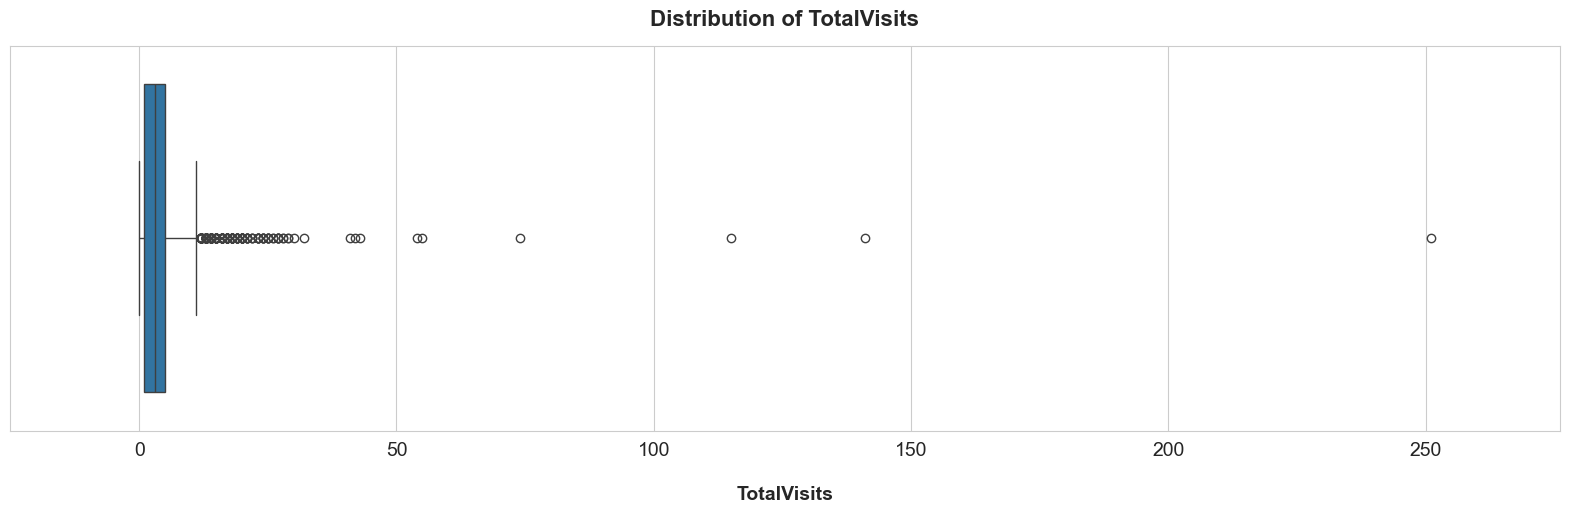

In [465]:
# Checking Distribution
box_plot(data, 'TotalVisits')

In [466]:
# Checking percentile values
data['TotalVisits'].describe([0, 0.25, 0.5, 0.75, 0.85, 0.95, 0.98, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
0%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
85%         6.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [467]:
# Checking
data['TotalVisits'].mean()

3.445237833681204

In [468]:
# Checking Mode
data['TotalVisits'].mode()

0    0.0
Name: TotalVisits, dtype: float64

In [469]:
# Checking Median
data['TotalVisits'].median()

3.0

In [470]:
# Checking Rows where the Total Visits is blank
data.loc[data['TotalVisits'].isnull()]

Lead Origin       Lead Source  Do Not Email  Do Not Call  \
Lead Number                                                               
659722       Lead Add Form  Welingak Website             0            0   
659710       Lead Add Form         Reference             0            0   
659705       Lead Add Form  Welingak Website             0            0   
659631       Lead Add Form         Reference             0            0   
659283       Lead Add Form         Reference             0            0   
...                    ...               ...           ...          ...   
587973       Lead Add Form         Reference             0            0   
587916       Lead Add Form         Reference             0            0   
585438       Lead Add Form         Reference             0            0   
581257       Lead Add Form         Reference             0            0   
580713       Lead Add Form         Reference             0            0   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
659722               1          NaN                         1096   
659710               1          NaN                          705   
659705               1          NaN                          346   
659631               1          NaN                         1007   
659283               1          NaN                         1111   
...                ...          ...                          ...   
587973               0          NaN                         1201   
587916               1          NaN                          903   
585438               1          NaN                         1458   
581257               1          NaN                         1159   
580713               1          NaN                         1525   

             Page Views Per Visit Last Activity  Country  ...  \
Lead Number                                               ...   
659722                        NaN           NaN  Missing  ...   
659710                        NaN           NaN    India  ...   
659705                        NaN           NaN  Missing  ...   
659631                        NaN           NaN    India  ...   
659283                        NaN           NaN  Missing  ...   
...                           ...           ...      ...  ...   
587973                        NaN           NaN  Missing  ...   
587916                        NaN           NaN  Missing  ...   
585438                        NaN           NaN  Missing  ...   
581257                        NaN           NaN    India  ...   
580713                        NaN           NaN  Missing  ...   

            Newspaper Article X Education Forums  Newspaper  \
Lead Number                                                   
659722                      0                  0          0   
659710                      0                  0          0   
659705                      0                  0          0   
659631                      0                  0          0   
659283                      0                  0          0   
...                       ...                ...        ...   
587973                      0                  0          0   
587916                      0                  0          0   
585438                      0                  0          0   
581257                      0                  0          0   
580713                      0                  0          0   

             Digital Advertisement  Through Recommendations  \
Lead Number                                                   
659722                           0                        0   
659710                           0                        0   
659705                           0                        0   
659631                           0                        0   
659283                           0                        0   
...                            ...             

In [471]:
# Replacing missing values with Median
data.loc[data['TotalVisits'].isnull(), 'TotalVisits'] = data['TotalVisits'].median()

#### Page Views Per Visit

In [472]:
# Checking unique values
data['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [473]:
# Checking percentile values
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

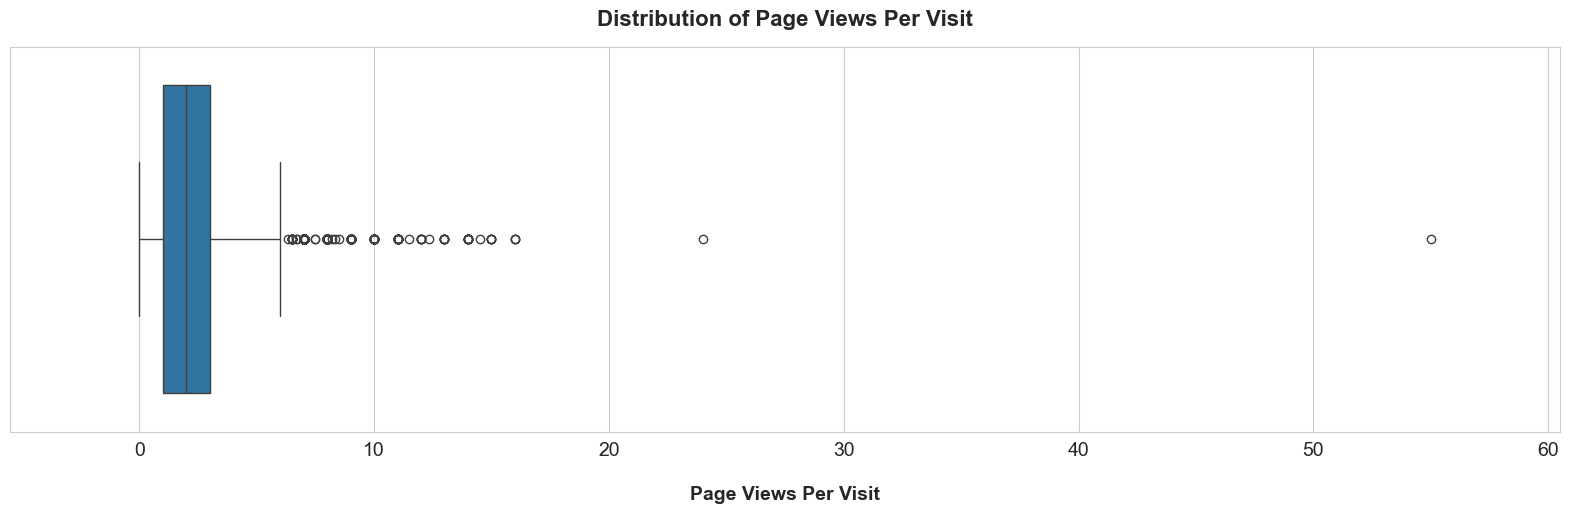

In [474]:
# Checking Distribution
box_plot(data, 'Page Views Per Visit')

In [475]:
# Checking mode
data['Page Views Per Visit'].mode()

0    0.0
Name: Page Views Per Visit, dtype: float64

In [476]:
# Checking Last Activity's relation
data.loc[data['Page Views Per Visit'].isnull(), 'Last Activity'].value_counts()

Last Activity
Email Bounced               14
SMS Sent                     7
Had a Phone Conversation     5
Others                       4
Unreachable                  3
Olark Chat Conversation      1
Name: count, dtype: int64

In [477]:
# Checking relationship using Pivot
data.pivot_table(
    index='Last Activity',
    values='Page Views Per Visit',
    aggfunc=['mean', 'median', 'std', 'min', 'max'],
)

mean               median  \
                          Page Views Per Visit Page Views Per Visit   
Last Activity                                                         
Converted to Lead                     1.741425                 1.00   
Email Bounced                         1.939423                 1.00   
Email Link Clicked                    1.892022                 2.00   
Email Opened                          2.524242                 2.00   
Form Submitted on Website             2.580345                 2.00   
Had a Phone Conversation              2.969200                 2.60   
Olark Chat Conversation               0.945494                 0.00   
Others                                2.887647                 2.67   
Page Visited on Website               3.270188                 2.95   
SMS Sent                              2.581698                 2.00   
Unreachable                           3.314556                 3.00   
Unsubscribed                          2.881148                 3.00   

                                           std                  min  \
                          Page Views Per Visit Page Views Per Visit   
Last Activity                                                         
Converted to Lead                     1.170870                  1.0   
Email Bounced                         1.753943                  0.0   
Email Link Clicked                    1.918959                  0.0   
Email Opened                          2.077087                  0.0   
Form Submitted on Website             1.533030                  0.0   
Had a Phone Conversation              1.511801                  0.0   
Olark Chat Conversation               1.712749                  0.0   
Others                                2.625782                  0.0   
Page Visited on Website               2.952036                  0.0   
SMS Sent                              2.132323                  0.0   
Unreachable                           2.427448                  0.0   
Unsubscribed                          2.070300                  0.0   

                                           max  
                          Page Views Per Visit  
Last Activity                                   
Converted to Lead                          9.0  
Email Bounced                             11.0  
Email Link Clicked                        12.0  
Email Opened                              14.5  
Form Submitted on Website                 13.0  
Had a Phone Conversation                   7.0  
Olark Chat Conversation                   16.0  
Others                                    10.0  
Page Visited on Website                   55.0  
SMS Sent                                  15.0  
Unreachable                               15.0  
Unsubscribed                              12.0

In [478]:
# Replace missing values with mean
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mean(), inplace=True)

#### Last Activity

In [479]:
# Checking Unique values
data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'Others', nan, 'SMS Sent'],
      dtype=object)

In [480]:
# Checking Value counts
data['Last Activity'].value_counts()

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: count, dtype: int64

In [481]:
# Checking rows with missing Last Activity
data.loc[data['Last Activity'].isnull()]

Lead Origin       Lead Source  Do Not Email  Do Not Call  \
Lead Number                                                               
659722       Lead Add Form  Welingak Website             0            0   
659710       Lead Add Form         Reference             0            0   
659705       Lead Add Form  Welingak Website             0            0   
659631       Lead Add Form         Reference             0            0   
659283       Lead Add Form         Reference             0            0   
...                    ...               ...           ...          ...   
587973       Lead Add Form         Reference             0            0   
587916       Lead Add Form         Reference             0            0   
585438       Lead Add Form         Reference             0            0   
581257       Lead Add Form         Reference             0            0   
580713       Lead Add Form         Reference             0            0   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
659722               1          3.0                         1096   
659710               1          3.0                          705   
659705               1          3.0                          346   
659631               1          3.0                         1007   
659283               1          3.0                         1111   
...                ...          ...                          ...   
587973               0          3.0                         1201   
587916               1          3.0                          903   
585438               1          3.0                         1458   
581257               1          3.0                         1159   
580713               1          3.0                         1525   

             Page Views Per Visit Last Activity  Country  ...  \
Lead Number                                               ...   
659722                    2.36282           NaN  Missing  ...   
659710                    2.36282           NaN    India  ...   
659705                    2.36282           NaN  Missing  ...   
659631                    2.36282           NaN    India  ...   
659283                    2.36282           NaN  Missing  ...   
...                           ...           ...      ...  ...   
587973                    2.36282           NaN  Missing  ...   
587916                    2.36282           NaN  Missing  ...   
585438                    2.36282           NaN  Missing  ...   
581257                    2.36282           NaN    India  ...   
580713                    2.36282           NaN  Missing  ...   

            Newspaper Article X Education Forums  Newspaper  \
Lead Number                                                   
659722                      0                  0          0   
659710                      0                  0          0   
659705                      0                  0          0   
659631                      0                  0          0   
659283                      0                  0          0   
...                       ...                ...        ...   
587973                      0                  0          0   
587916                      0                  0          0   
585438                      0                  0          0   
581257                      0                  0          0   
580713                      0                  0          0   

             Digital Advertisement  Through Recommendations  \
Lead Number                                                   
659722                           0                        0   
659710                           0                        0   
659705                           0                        0   
659631                           0                        0   
659283                           0                        0   
...                            ...             

In [482]:
# Creating new label for missing values
data['Last Activity'].fillna('Missing', inplace=True)

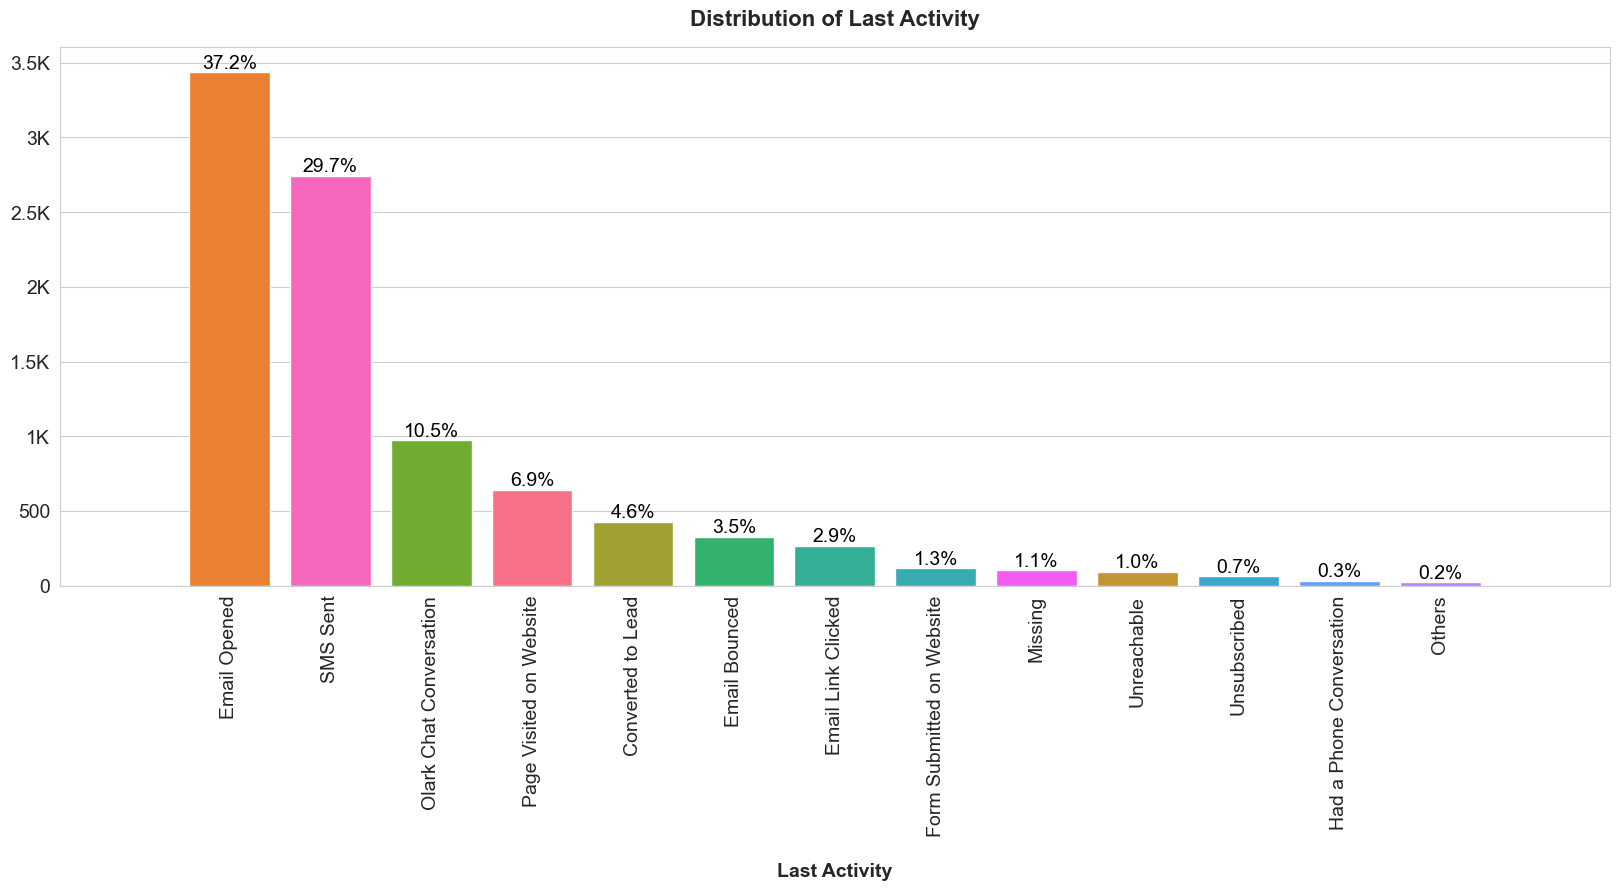

In [483]:
# Checking the distribution
count_plot(data, 'Last Activity', rotate_label=True)

#### Lead Source

In [484]:
# Checking unique values
data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'Facebook', nan,
       'Others'], dtype=object)

In [485]:
# Checking null value count
data['Lead Source'].isnull().sum()

36

In [486]:
# Checking rows with missing Lead source
data.loc[data['Lead Source'].isnull()]

Lead Origin Lead Source  Do Not Email  Do Not Call  \
Lead Number                                                                   
651660                 Lead Add Form         NaN             1            0   
643899                 Lead Add Form         NaN             0            0   
642394                 Lead Add Form         NaN             0            0   
640115                 Lead Add Form         NaN             0            0   
640081                 Lead Add Form         NaN             0            0   
639134                 Lead Add Form         NaN             0            0   
637125                 Lead Add Form         NaN             1            0   
635028                   Lead Import         NaN             0            0   
634618                Quick Add Form         NaN             1            0   
633945                 Lead Add Form         NaN             0            0   
630801                 Lead Add Form         NaN             0            0   
628685       Landing Page Submission         NaN             0            0   
628666                 Lead Add Form         NaN             0            0   
622403                 Lead Add Form         NaN             1            0   
622280                 Lead Add Form         NaN             1            0   
617520                 Lead Add Form         NaN             0            0   
617495                 Lead Add Form         NaN             0            0   
615643                 Lead Add Form         NaN             1            0   
615069                 Lead Add Form         NaN             1            0   
613917                 Lead Add Form         NaN             0            0   
613660                 Lead Add Form         NaN             0            0   
613583                 Lead Add Form         NaN             0            0   
609475                 Lead Add Form         NaN             1            0   
606860                 Lead Add Form         NaN             0            0   
605099                 Lead Add Form         NaN             0            0   
604134                 Lead Add Form         NaN             1            0   
602759                 Lead Add Form         NaN             0            0   
593400                 Lead Add Form         NaN             1            0   
593374                 Lead Add Form         NaN             1            0   
591848                 Lead Add Form         NaN             1            0   
589591                 Lead Add Form         NaN             0            0   
587995                 Lead Add Form         NaN             0            0   
587880                 Lead Add Form         NaN             0            0   
586678                 Lead Add Form         NaN             0            0   
584932                 Lead Add Form         NaN             0            0   
580221                 Lead Add Form         NaN             1            0   

             Converted  TotalVisits  Total Time Spent on Website  \
Lead Number                                                        
651660               1          3.0                         1378   
643899               1          0.0                            0   
642394               1          0.0                            0   
640115               1          0.0                            0   
640081               1          0.0                            0   
639134               1          0.0                            0   
637125               1          0.0                            0   
635028               0          0.0                            0   
634618               1          3.0                         2217   
633945               1          0.0                            0   
630801               1          0.0                            0   
628685               1          2.0                            9   
628666               1          0.0                            0   
62

In [487]:
# Adding New label for missing Lead source
data['Lead Source'].fillna('Missing', inplace=True)

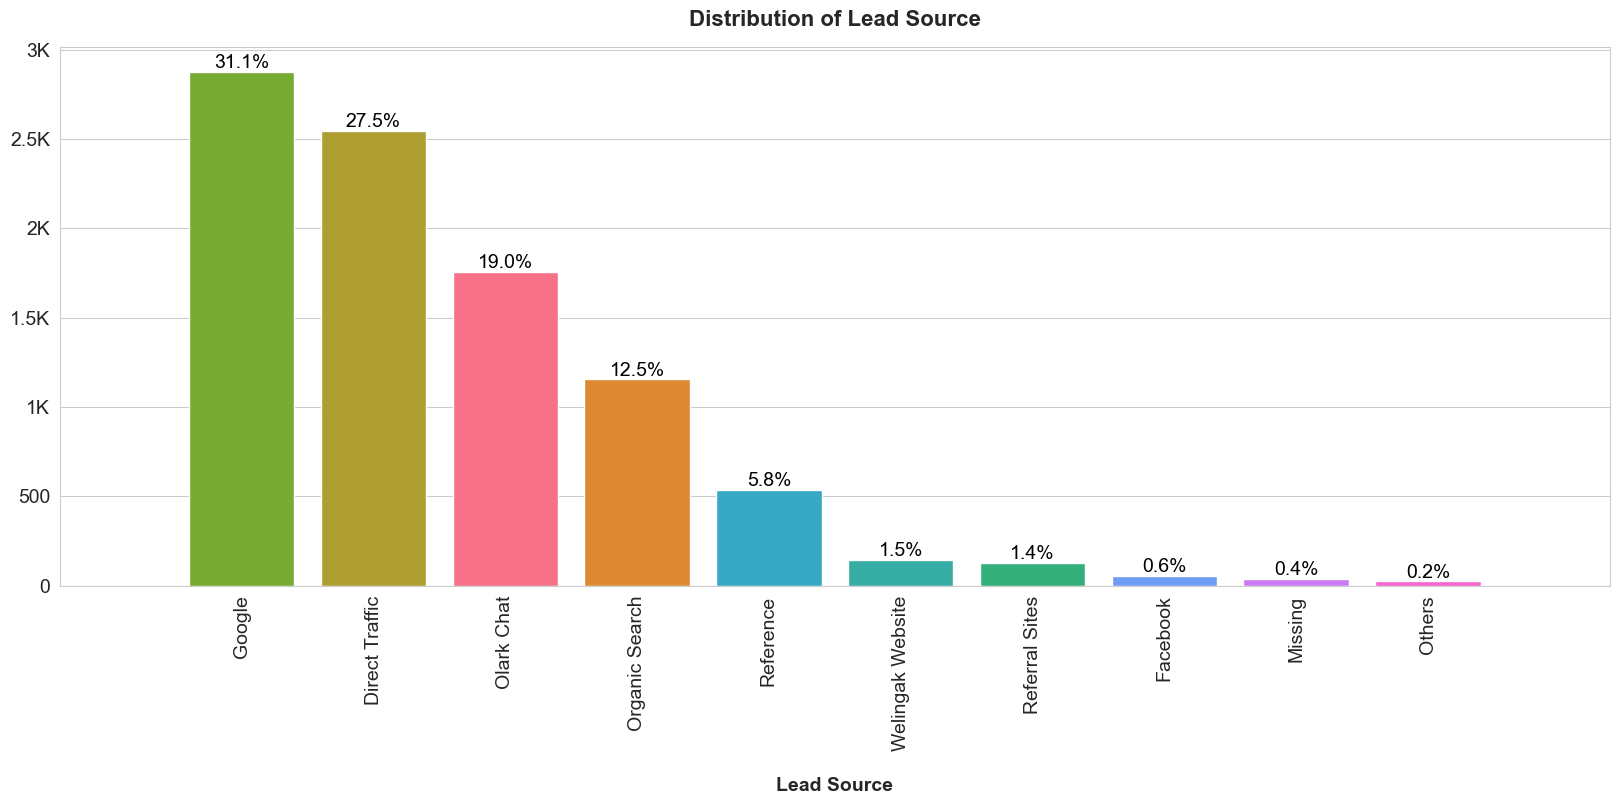

In [488]:
# Checking new distribution
count_plot(data, 'Lead Source', rotate_label=True)

### Remarks
- The target variable is slightly imbalanced. This issue can be addressed using various techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both along with other methods like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling Approach).
- We have replaced values with less proportion in a column as 'Others'. If at any point in the analysis or model creation, its found that the 'Other' value in a column is of significance - then we'll revert it back to its original using the index value (Lead Number).

## Encode Categorical Variables
**One-hot encoding**

In [489]:
# One-hot encode categorical columns in the data using get_dummies from pandas
# The drop_first=True parameter ensures that the first level of each category is dropped to avoid the dummy variable trap
data_encoded = pd.get_dummies(data, drop_first=True)

### Checking correlation

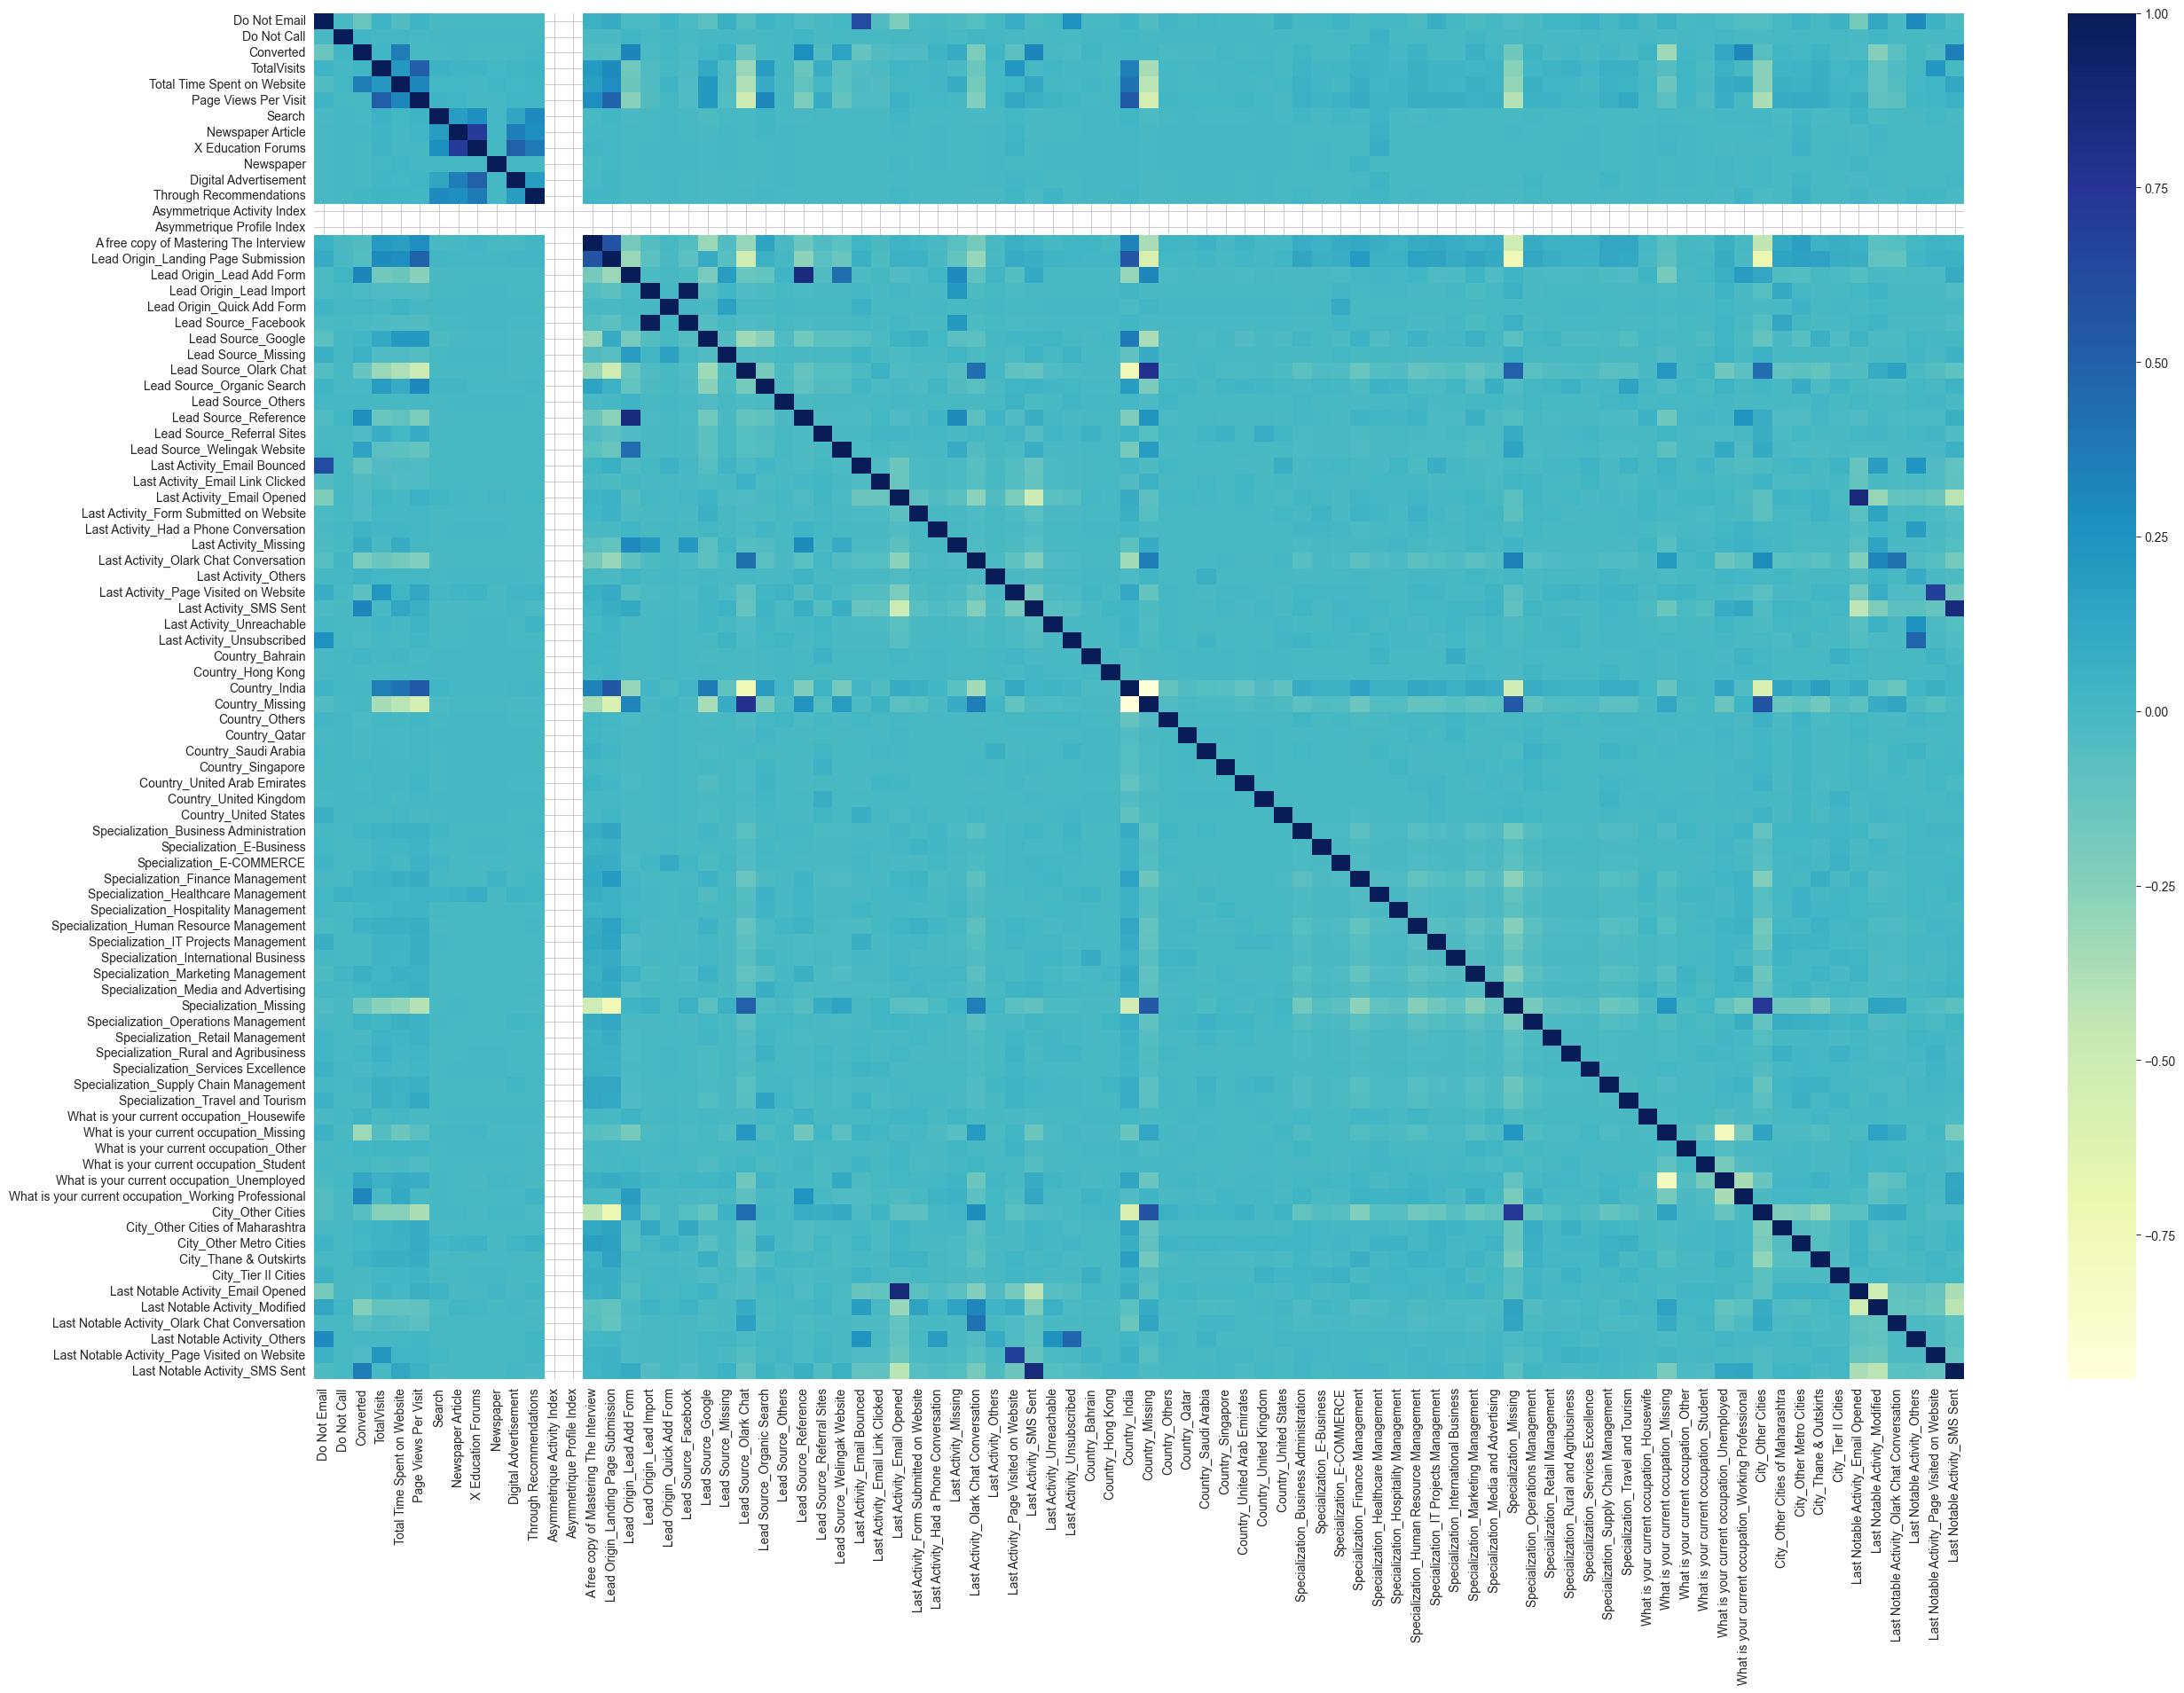

In [490]:
# Create a heatmap to visualize the correlation matrix of the encoded data
# Set the figure size to 30x20 inches
plt.figure(figsize=(30, 20))

# Generate the heatmap using seaborn's heatmap function with YlGnBu color map and display it
sns.heatmap(data_encoded.corr(), cmap='YlGnBu')

# Display the plot
plt.show()

In [491]:
# Calculate the correlation matrix of the encoded data
data_encoded.corr()

Do Not Email  Do Not Call  \
Do Not Email                                       1.000000    -0.004322   
Do Not Call                                       -0.004322     1.000000   
Converted                                         -0.135580     0.018581   
TotalVisits                                        0.033640     0.003241   
Total Time Spent on Website                       -0.046374     0.006801   
...                                                     ...          ...   
Last Notable Activity_Modified                     0.117259     0.019252   
Last Notable Activity_Olark Chat Conversation     -0.013032    -0.002092   
Last Notable Activity_Others                       0.298488    -0.001953   
Last Notable Activity_Page Visited on Website      0.049921    -0.002778   
Last Notable Activity_SMS Sent                    -0.025990    -0.008157   

                                               Converted  TotalVisits  \
Do Not Email                                   -0.135580     0.033640   
Do Not Call                                     0.018581     0.003241   
Converted                                       1.000000     0.029119   
TotalVisits                                     0.029119     1.000000   
Total Time Spent on Website                     0.362483     0.217341   
...                                                  ...          ...   
Last Notable Activity_Modified                 -0.244294    -0.106902   
Last Notable Activity_Olark Chat Conversation  -0.072660    -0.037440   
Last Notable Activity_Others                    0.002280     0.006339   
Last Notable Activity_Page Visited on Website  -0.036051     0.227865   
Last Notable Activity_SMS Sent                  0.351845    -0.003163   

                                               Total Time Spent on Website  \
Do Not Email                                                     -0.046374   
Do Not Call                                                       0.006801   
Converted                                                         0.362483   
TotalVisits                                                       0.217341   
Total Time Spent on Website                                       1.000000   
...                                                                    ...   
Last Notable Activity_Modified                                   -0.106857   
Last Notable Activity_Olark Chat Conversation                    -0.051402   
Last Notable Activity_Others                                      0.011003   
Last Notable Activity_Page Visited on Website                     0.026644   
Last Notable Activity_SMS Sent                                    0.125076   

                                               Page Views Per Visit    Search  \
Do Not Email                                               0.033351 -0.011443   
Do Not Call                                               -0.005918 -0.000573   
Converted                                                 -0.003294 -0.002261   
TotalVisits                                                0.512093  0.049577   
Total Time Spent on Website                                0.316262  0.012654   
...                                                             ...       ...   
Last Notable Activity_Modified                            -0.093172 -0.018237   
Last Notable Activity_Olark Chat Conversation             -0.087927 -0.005537   
Last Notable Activity_Others                               0.015678 -0.005171   
Last Notable Activity_Page Visited on Website              0.026690  0.007909   
Last Notable Activity_SMS Sent                             0.055473 -0.015032   

                                               Newspaper Article  \
Do Not Email                                           -0.004322   
Do Not Call                                            -0.000216   
Converted                                               0.003465   
TotalVisits                                             0.033775   
Total T

In [492]:
# Get unique values
data_encoded['Asymmetrique Activity Index'].unique()

array([0])

In [493]:
# Get unique values
data_encoded['Asymmetrique Profile Index'].unique()

array([0])

In [494]:
# Drop columns as they don't have any values
data_encoded.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], inplace=True)

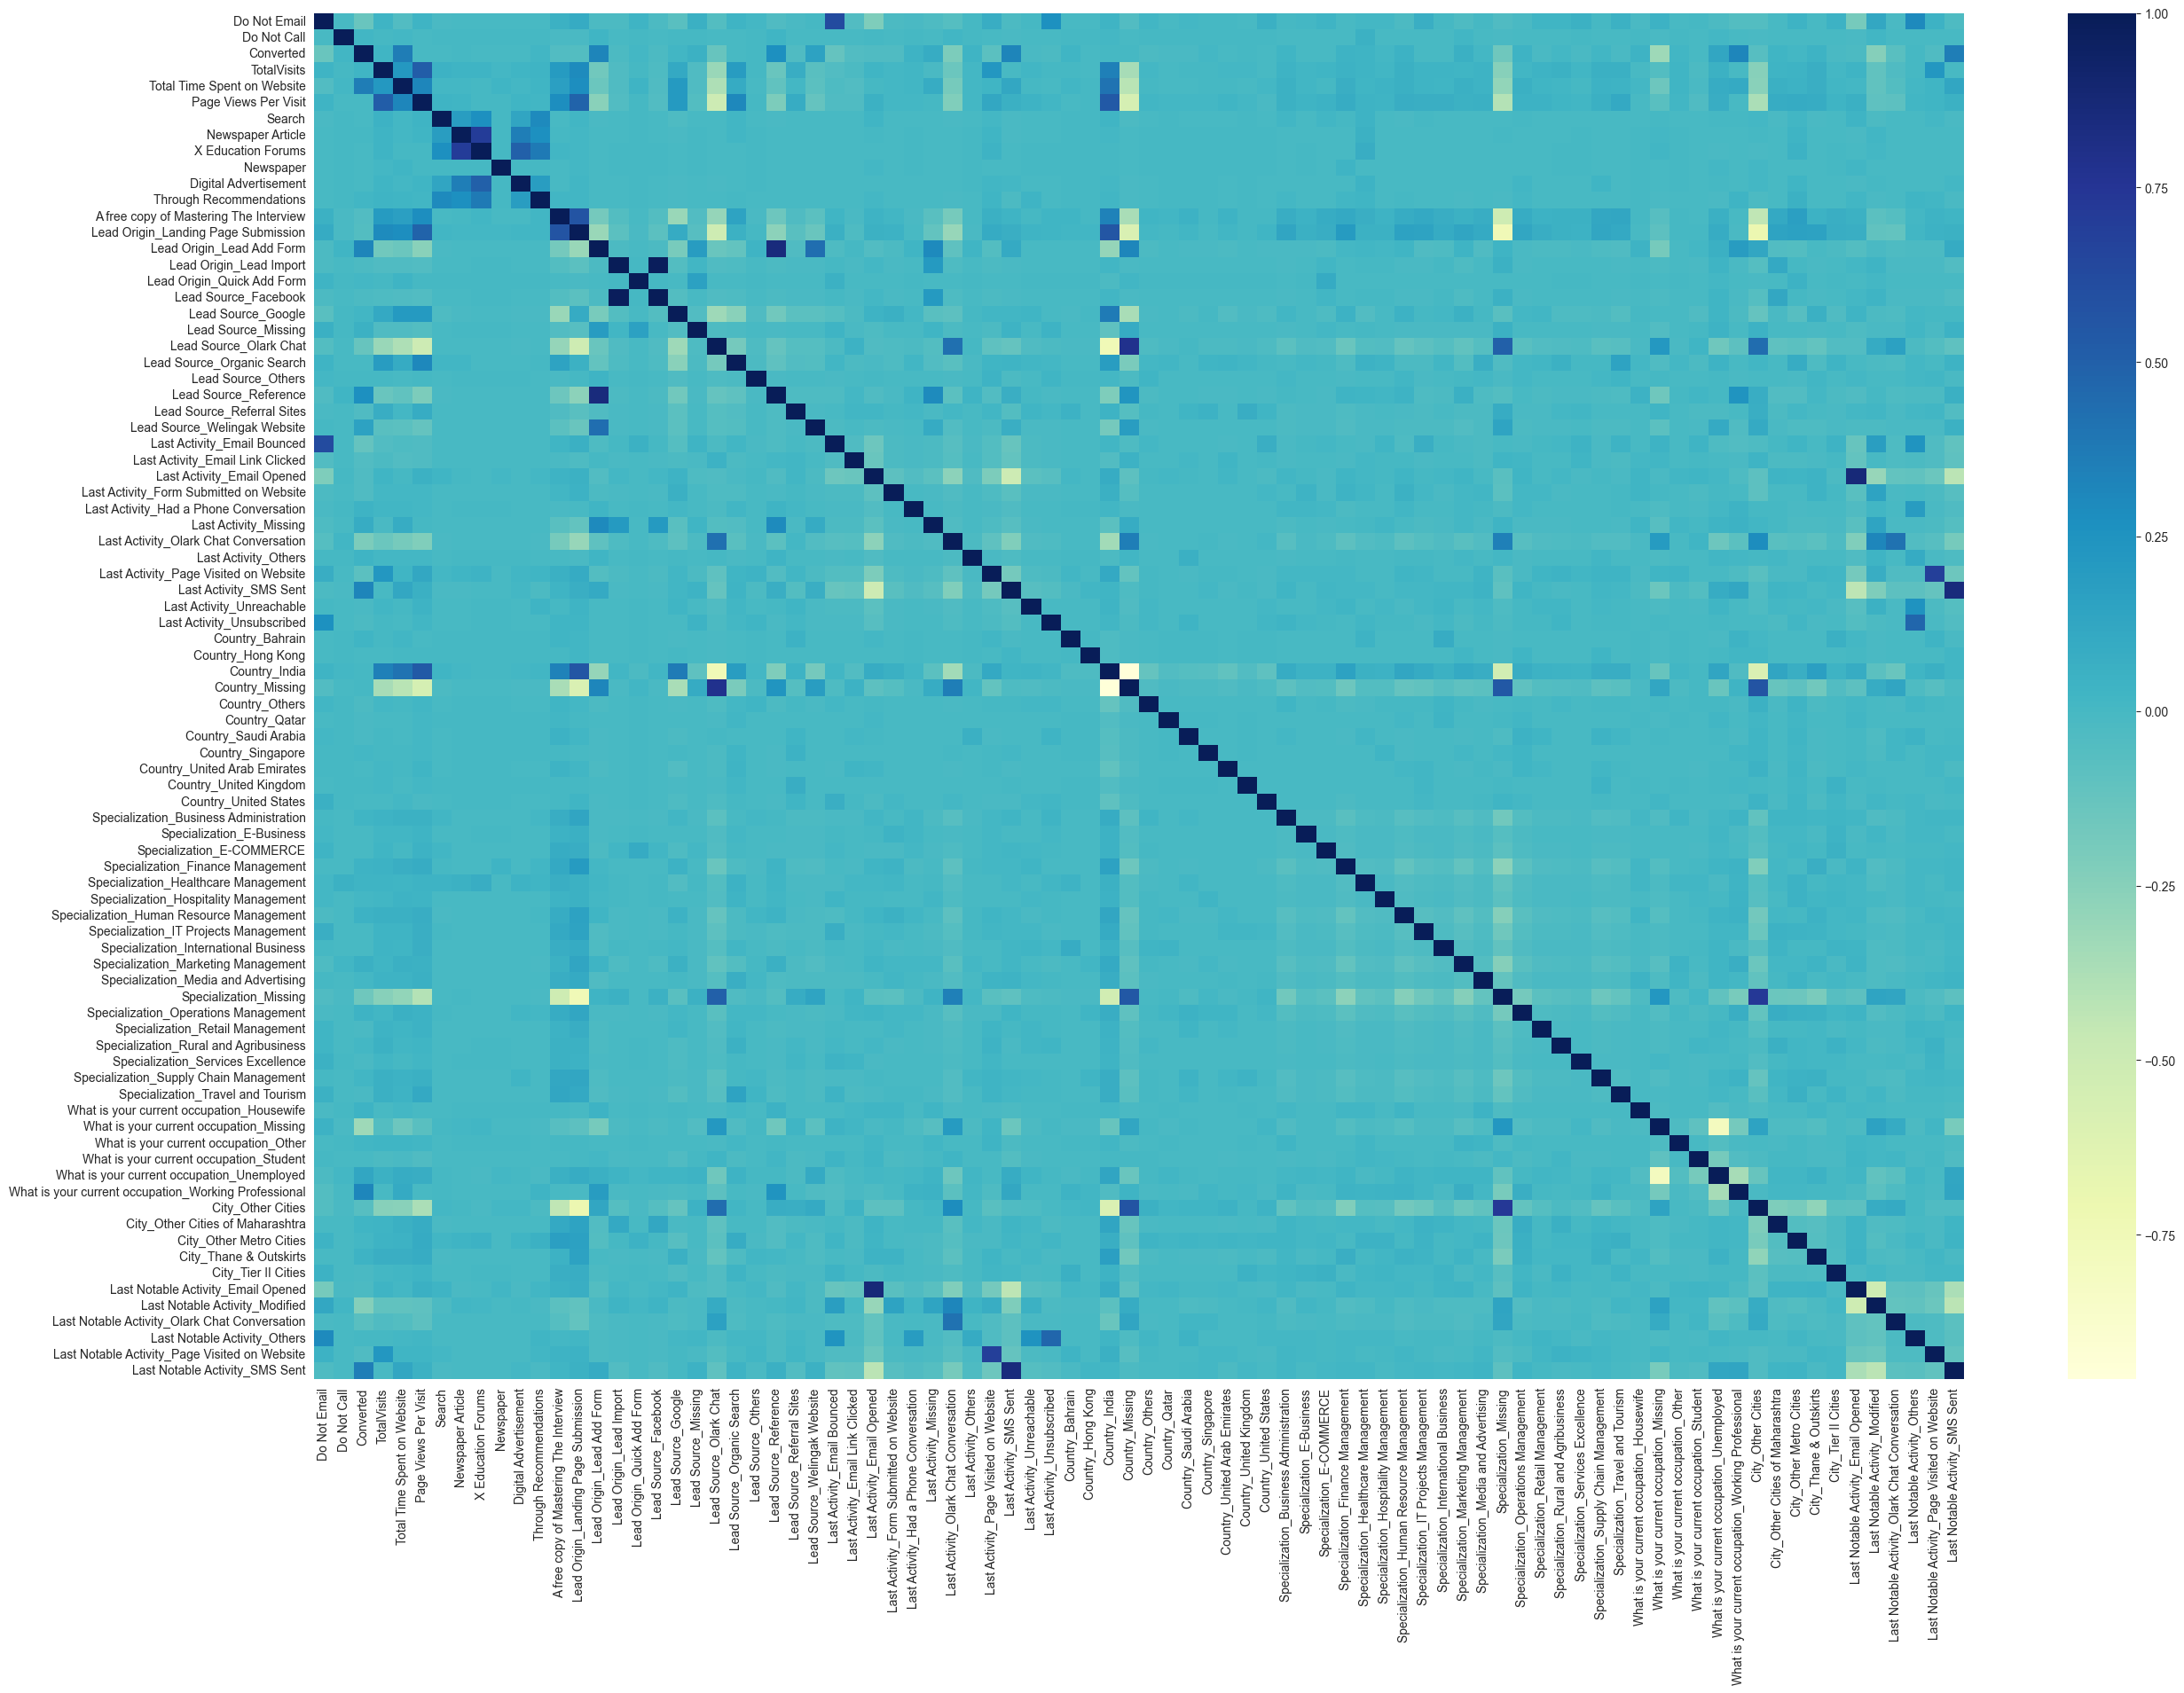

In [495]:
# Create a heatmap to visualize the correlation matrix of the encoded data
# Set the figure size to 30x20 inches
plt.figure(figsize=(30, 20))

# Generate the heatmap using seaborn's heatmap function with YlGnBu color map and display it
sns.heatmap(data_encoded.corr(), cmap='YlGnBu')

# Display the plot
plt.show()

## Model 1
___

### Splitting Data into Predictor and Target Variables

In [496]:
# Predictor Variables
X = data_encoded.drop(columns=['Converted'])

In [497]:
# Target Variables
Y = data_encoded['Converted']
Y.unique()

array([0, 1])

### Splitting into Train and Test Data

In [498]:
# Split the data into training and testing sets using stratified train-test split
# The test size is set to 30% of the total data (1 - 0.7 = 0.3)
# The random state is set to 0 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [499]:
# Print the shapes of the training and testing sets
# This helps to verify that the data has been split correctly and provides information about the size of each set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6468, 83) (6468,)
(2772, 83) (2772,)


### Standardization

In [500]:
# Scale the training data using the StandardScaler
# The fit_transform method is used to both fit the scaler to the training data and transform it at the same time
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [501]:
# Convert the column names to a list
# Remove the 'Converted' column from the list
columns = data.columns.to_list()
columns.remove('Converted')
columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [502]:
# Convert the scaled training data into a Pandas DataFrame with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

### Handling Imbalanced Target Variable

In [503]:
# Get value counts
y_train.value_counts(normalize=True)

Converted
0    0.617965
1    0.382035
Name: proportion, dtype: float64

In [504]:
# Resample the training data using Synthetic Minority Over-sampling Technique (SMOTE)
# SMOTE is used to handle class imbalance by synthesizing new minority class samples
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [505]:
# Get value counts
Y_train_resampled.value_counts(normalize=True)

Converted
1    0.5
0    0.5
Name: proportion, dtype: float64

### Build the Logistic Regression Model

In [506]:
# Train a logistic regression model on the resampled training data
# The model is fit to the training data using the fit method
model_1 = LogisticRegression()
model_1.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [507]:
# Scale the test data using the same StandardScaler as before
# This ensures that both the training and testing data are scaled in the same way
X_test_scaled = scaler.fit_transform(X_test)

In [508]:
# Convert the scaled test data into a Pandas DataFrame with the original column names
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [509]:
# Make predictions on the test data using the trained logistic regression model
y_pred = model_1.predict(X_test_scaled)

# Evaluate the performance of the model on the test data
print(classification_report(y_test, y_pred))

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, model_1.predict_proba(X_test_scaled)[:,1])

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1682
           1       0.74      0.78      0.76      1090

    accuracy                           0.80      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.80      0.81      2772



In [510]:
# Display the area under the ROC curve value
roc_auc

0.8882945706836554

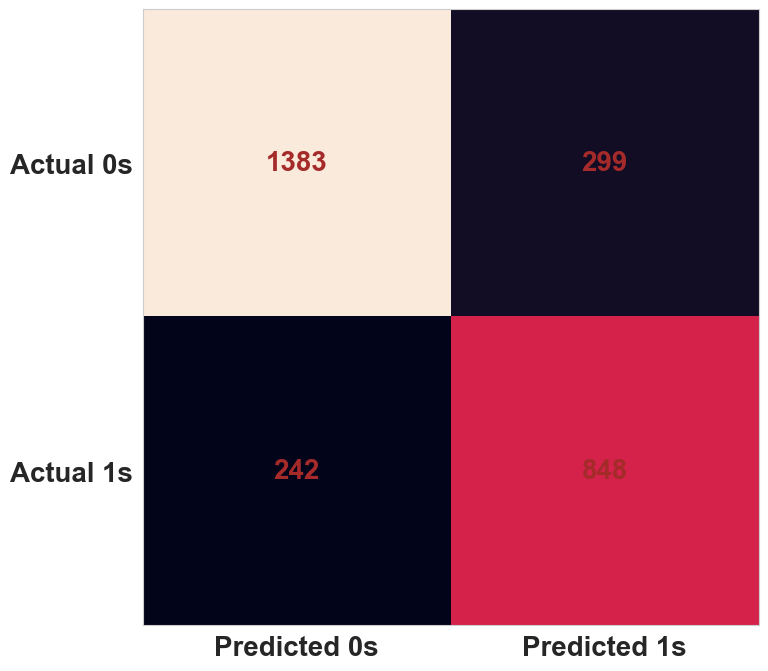

In [511]:
# Plot confusion matrix
plot_confusion_matrix(model_1, X_test_scaled, y_test)

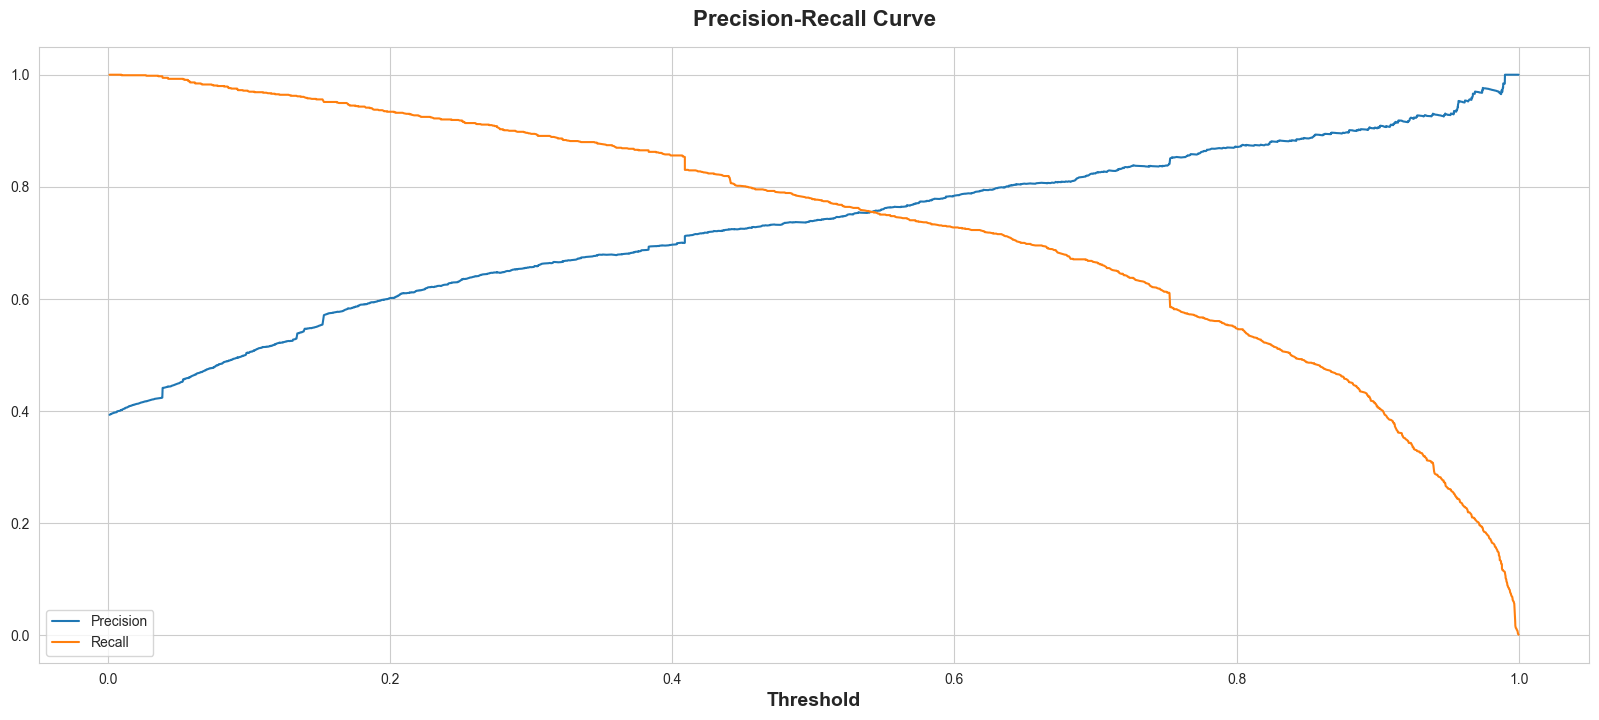

In [512]:
# Plot Precision-recall curve
plot_precision_recall_curve(model_1, X_test_scaled, y_test)

## Model 2

In [513]:
# Train a second logistic regression model with specific parameters to compare performance
# This model has a random state of 42 for reproducibility, a maximum number of iterations of 1000, and class weights set to 'balanced' to handle imbalanced classes
model_2 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

In [514]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV
# The 'C' parameter is tuned with values from 0.01 to 100 in logarithmic scale
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [515]:
# Perform grid search cross-validation on the second logistic regression model with the defined parameter grid
# The grid search is performed with 5-fold cross-validation and evaluates the models based on their AUC-ROC score
model_2 = GridSearchCV(model_2, param_grid, cv=5, scoring='roc_auc')

In [516]:
# Train the second logistic regression model using the best combination of hyperparameters found by GridSearchCV
# This model is trained on the resampled training data to account for class imbalance
model_2.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [517]:
# Scale Test data
X_test_2 = scaler.transform(X_test)

In [518]:
# Convert the scaled test data into a Pandas DataFrame with the original column names
X_test_2 = pd.DataFrame(X_test_2, columns=X_test.columns)

In [519]:
# Make predictions on the test data using the trained logistic regression model
y_pred_2 = model_2.predict(X_test_scaled)

# Evaluate the performance of the model on the test data
print(classification_report(y_test, y_pred_2))

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, model_2.predict_proba(X_test_scaled)[:,1])
print(roc_auc)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1682
           1       0.74      0.78      0.76      1090

    accuracy                           0.81      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.81      0.81      2772

0.8887325595348482


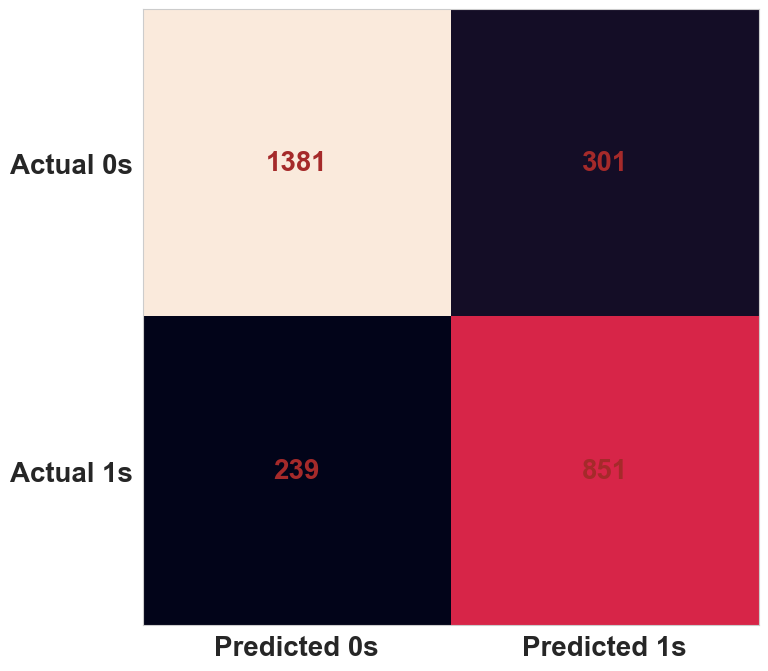

In [520]:
# Plot Confusion Matrix
plot_confusion_matrix(model_2, X_test_scaled, y_test)

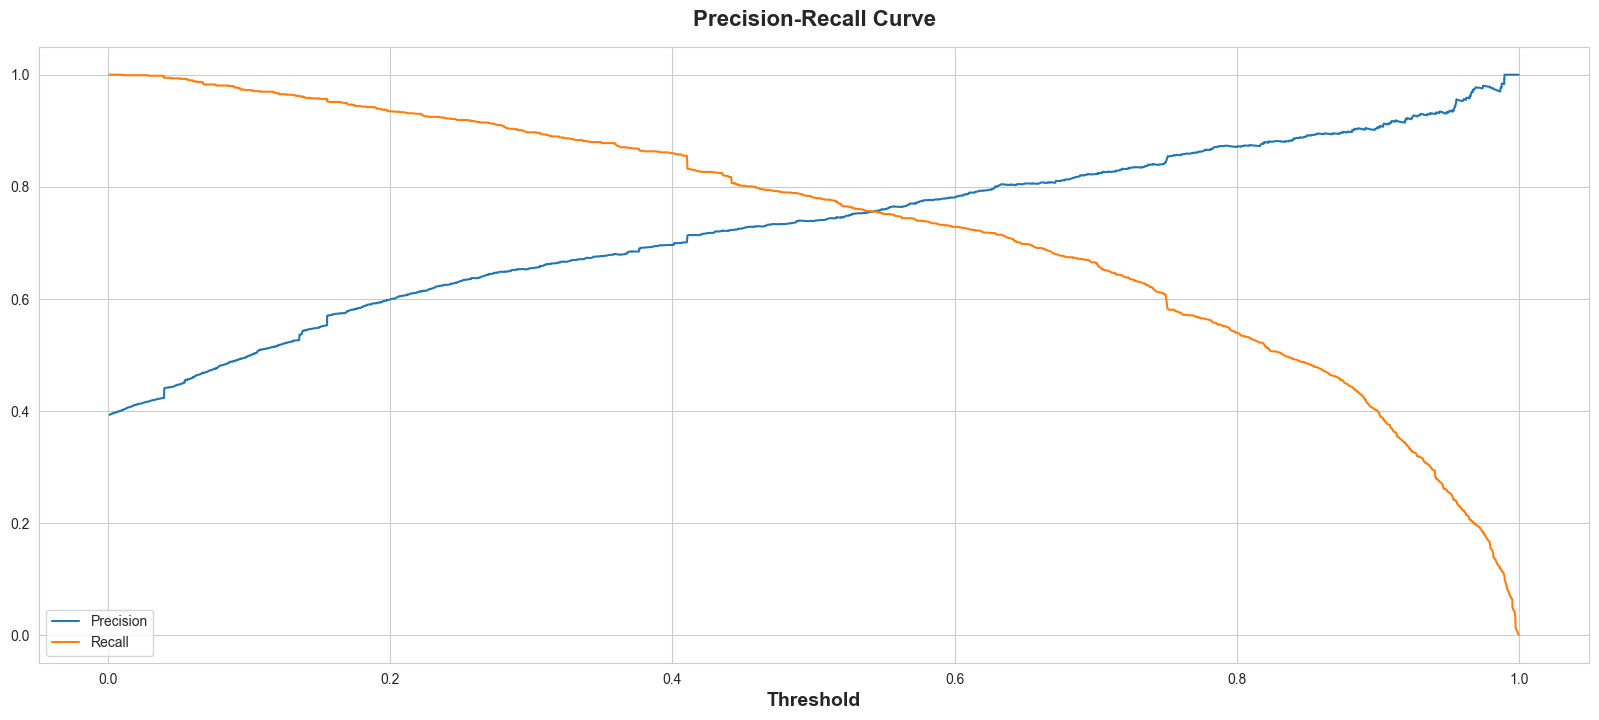

In [521]:
# Plot precision-recall curve
plot_precision_recall_curve(model_2, X_test_scaled, y_test)

In [522]:
# Get important features in the model along with their co-efficients
get_important_features(model_2, X_test_scaled)

Feature  Importance
3                         Total Time Spent on Website    1.175517
71  What is your current occupation_Working Profes...    0.620072
34                             Last Activity_SMS Sent    0.577093
67            What is your current occupation_Missing    0.563709
27                         Last Activity_Email Opened    0.495636
..                                                ...         ...
42                                      Country_Qatar    0.003439
36                         Last Activity_Unsubscribed    0.002493
73                   City_Other Cities of Maharashtra    0.002304
23                         Lead Source_Referral Sites    0.000806
7                                  X Education Forums    0.000000

[83 rows x 2 columns]

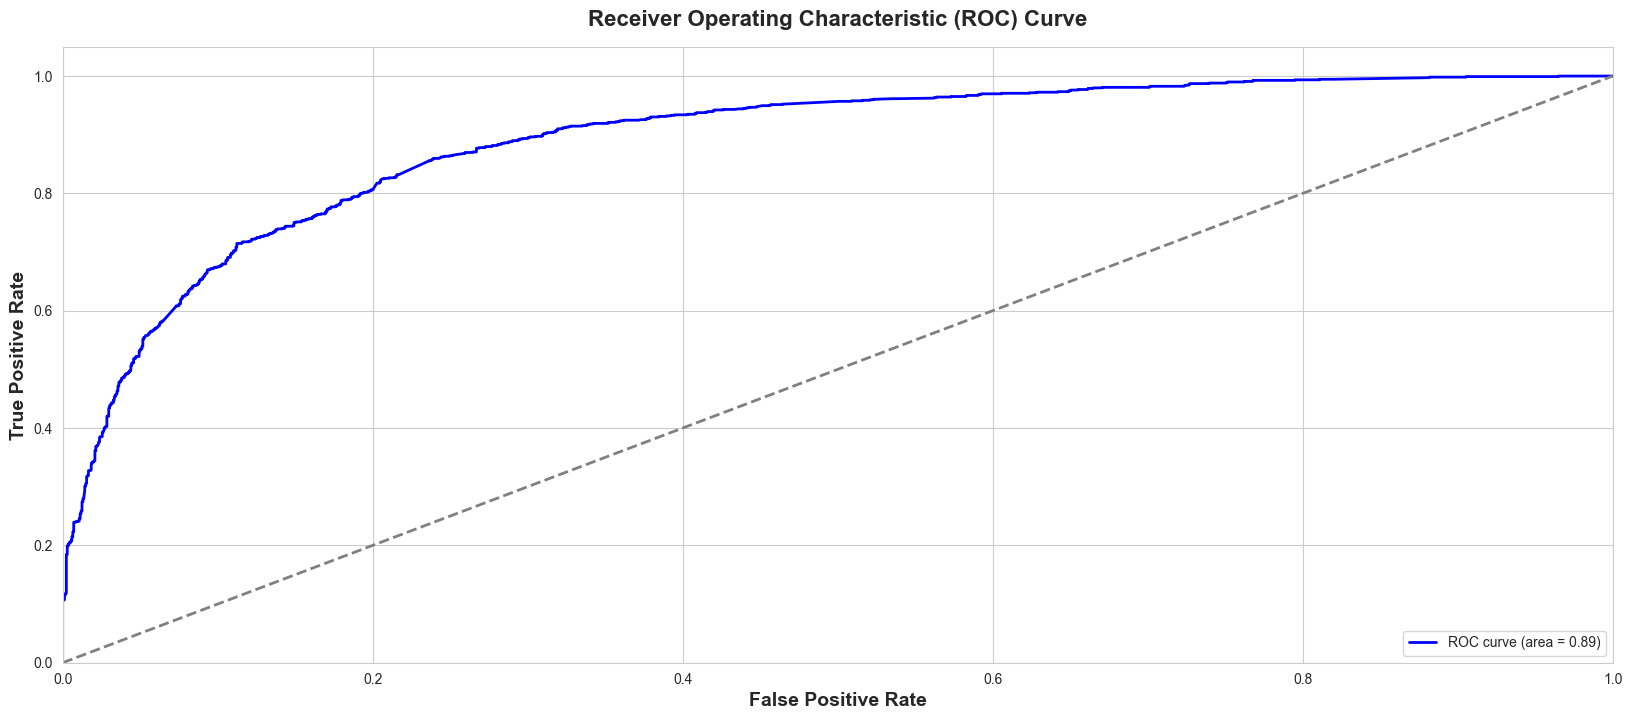

In [523]:
# Plot ROC curve
plot_roc_curve(model_2, X_test_scaled, y_test)

In [524]:
# Get model performance statistics
model_2_report = get_model_report(model_2, X_test_scaled, y_test)
model_2_report

Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  0.805195   0.738715  0.780734  0.759144  0.888733

**Note:** We will proceed with this model since it has 80% accuracy and acceptable recall of 78%.

### Calculate Lead Scores

In [525]:
# Make predictions on the test data using the trained logistic regression model and extract the predicted probabilities of the positive class
# Scale the predicted probabilities by multiplying them by 100 to obtain lead scores in percentage
lead_scores = model_2.predict_proba(X_test_scaled)[:,1] * 100
lead_scores

array([45.21485485, 95.44650162, 23.71040441, ..., 36.8547236 ,
       12.13729549, 99.87338894])

### Steps to increase recall
The default threshold for logistic regression is 0.5, meaning that any predicted probability above 0.5 is classified as a positive case. Lowering this threshold can increase recall.

In [526]:
# Predict probabilities
y_proba = model_2.predict_proba(X_test_scaled)[:, 1]

In [527]:
# Set a new threshold
threshold = 0.3
y_pred_threshold = (y_proba >= threshold).astype(int)

# Evaluate the model with the new threshold
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1682
           1       0.66      0.90      0.76      1090

    accuracy                           0.77      2772
   macro avg       0.78      0.80      0.77      2772
weighted avg       0.81      0.77      0.78      2772



## Key Insights
___

1. **Total Time Spent on Website** is the most influential feature with a high positive coefficient of 1.1755, indicating that the more time a user spends on the website, the more likely they are to convert.
2. **Occupation - Working Professional** has a significant positive impact (coefficient: 0.6201), suggesting that working professionals are more likely to convert compared to other occupations.
3. **Last Activity - SMS Sent** and **Last Activity - Email Opened** are important indicators of lead conversion with coefficients of 0.5771 and 0.4956, respectively. Engaging leads through SMS and email is crucial.
4. **Missing Occupation Information** (coefficient: 0.5637) and **Missing Specialization Information** (coefficient: 0.4798) surprisingly contribute positively to lead conversion, which might indicate that the absence of this data correlates with higher engagement or priority.
5. **Lead Origin - Lead Add Form** (coefficient: 0.4875) and **Lead Origin - Landing Page Submission** (coefficient: 0.4152) are significant, highlighting the importance of where leads originate from in predicting their likelihood to convert.
6. **Lead Source - Olark Chat** (coefficient: 0.4715) and **Lead Source - Welingak Website** (coefficient: 0.4709) are strong predictors, indicating that these sources provide high-quality leads.
7. **Do Not Email** (coefficient: 0.4086) suggests that leads who opted out of emails still show a positive likelihood to convert, possibly due to other engagement channels.
8. **Last Notable Activity - SMS Sent** (coefficient: 0.3976) and **Last Notable Activity - Others** (coefficient: 0.2480) are also significant, reinforcing the importance of recent interactions in lead conversion.
9. **Page Views Per Visit** (coefficient: 0.2179) and **Total Visits** (coefficient: 0.1336) both contribute positively, indicating that higher engagement on the website is a good predictor of conversion.
10. **Specific Specializations** such as Retail Management (coefficient: 0.1131) and Hospitality Management (coefficient: 0.1114) also play a role, highlighting that certain specializations have a higher likelihood of converting.
11. **Geographical Factors:** Leads from certain countries like Saudi Arabia (coefficient: 0.0970) and Bahrain (coefficient: 0.0956) are slightly more likely to convert compared to others.
12. **Other Engagement Channels** such as Newspaper (coefficient: 0.0832) and Organic Search (coefficient: 0.0813) have smaller but positive impacts on lead conversion.
13. **Least Impactful Features:** Some features such as Digital Advertisement (coefficient: 0.0079), and recommendations (coefficient: 0.0119), have very minimal impact on conversion rates.

## Recommendations
___

- **Focus on High-Engagement Channels:** Enhance and optimize channels like SMS, email, and live chat (Olark Chat) which have shown significant positive impact on lead conversion.
- **Leverage Time Spent on Website:** Develop strategies to increase the time users spend on the website, such as engaging content and interactive elements, as it is the strongest predictor of conversion.
- **Occupation-Based Targeting:** Target working professionals more aggressively since their likelihood to convert is higher.
- **Form Origin Optimization:** Prioritize leads generated from specific forms like Lead Add Form and Landing Page Submissions.
- **Handle Missing Data Strategically:** Consider that missing information in certain fields (Occupation and Specialization) might still lead to high conversion rates. This might suggest other underlying factors at play.
- **Utilize Geographical Insights:** Customize marketing strategies for leads from regions like Saudi Arabia and Bahrain to maximize conversion rates.

By focusing on these insights, X Education can more effectively allocate resources and tailor their marketing and engagement strategies to improve lead conversion rates significantly.